# Data Acquisiton

## Importing necessary libraries


Import essential Python libraries required for data manipulation, visualization, model building, evaluation, and explainability.

numpy and pandas: Handle numerical operations and data structures.

matplotlib.pyplot and seaborn: Create static, animated, and interactive visualizations.

sklearn.model_selection: Split data into training and testing sets.

sklearn.metrics: Evaluate model performance using metrics like accuracy and F1-score.

sklearn.preprocessing: Encode categorical labels into numerical values.

imblearn.combine.SMOTE-ENN: Address class imbalance by combining over-sampling (SMOTE) and under-sampling (ENN) techniques.

shap and lime.lime_tabular: Provide tools for model interpretability.

warnings: Suppress unnecessary warnings for cleaner output italicized text

In [ ]:
!pip install xgboost
!pip install lightgbm
!pip install tabpfn
!pip install catboost
!pip install shap
!pip install -q lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import pandas as pd
from matplotlib import rcParams
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import lime
import lime.lime_tabular
from sklearn.preprocessing import label_binarize
from matplotlib import rcParams
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
from google.colab import files
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
import torch
from torch.utils.data import TensorDataset, WeightedRandomSampler, DataLoader
import matplotlib.patches as patches
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scipy.stats import wilcoxon
# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from tabpfn import TabPFNClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, auc, precision_score, recall_score, precision_recall_fscore_support, roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize
from lightgbm import LGBMClassifier


## Importing data from google drive

Load the maternal health dataset and perform an initial examination.

Read the dataset into a DataFrame named df.

Display the first few rows to understand its structure and content.

## Encoding the categorical values to numerical values




Encode the RiskLevel labels into numerical format using LabelEncoder.

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Maternal Health Risk Data Set.csv")
df.head(10)

Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.00      98.0         86  high risk
1   35         140           90  13.00      98.0         70  high risk
2   29          90           70   8.00     100.0         80  high risk
3   30         140           85   7.00      98.0         70  high risk
4   35         120           60   6.10      98.0         76   low risk
5   23         140           80   7.01      98.0         70  high risk
6   23         130           70   7.01      98.0         78   mid risk
7   35          85           60  11.00     102.0         86  high risk
8   32         120           90   6.90      98.0         70   mid risk
9   42         130           80  18.00      98.0         70  high risk

In [ ]:
risk_mapping = {'high risk': 2, 'mid risk': 1, 'low risk': 0}
df['RiskLevel'] = df['RiskLevel'].map(risk_mapping)
df.head(10)


Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.00      98.0         86          2
1   35         140           90  13.00      98.0         70          2
2   29          90           70   8.00     100.0         80          2
3   30         140           85   7.00      98.0         70          2
4   35         120           60   6.10      98.0         76          0
5   23         140           80   7.01      98.0         70          2
6   23         130           70   7.01      98.0         78          1
7   35          85           60  11.00     102.0         86          2
8   32         120           90   6.90      98.0         70          1
9   42         130           80  18.00      98.0         70          2

In [ ]:
df.shape

(1014, 7)

# Statistical and Exploratoy data analysis EDA

Gain insights into the dataset's characteristics and identify potential patterns or issues.

Generate summary statistics to understand distributions, central tendencies, and variability.

Visualize the distribution of the target variable (RiskLevel) to assess class balance.

Create pair plots to observe relationships between features and identify any separability among classes

## Mathematical description of the data frame


In [ ]:
df.describe()

Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate    RiskLevel  
count  1014.000000  1014.000000  
mean     74.301775     0.867850  
std       8.088702     0.807353  
min       7.000000     0.000000  
25%      70.000000     0.000000  
50%      76.000000     1.000000  
75%      80.000000     2.000000  
max      90.000000     2.000000

## Perform analysis using ANOVA

One-way ANOVA was employed to assess whether individual features exhibited significant variation across the three maternal risk groups. The F-statistic quantified the extent of between-group separation, while the associated p-values identified statistically significant features (p < 0.05). These findings provided empirical support for feature selection, highlighting variables with meaningful discriminative capacity

In [ ]:
from scipy import stats
features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
anova_results = {}

for feature in features:
    groups = [df[df['RiskLevel'] == level][feature] for level in df['RiskLevel'].unique()]# Group data by RiskLevel
    f_stat, p_val = stats.f_oneway(*groups)# One-Way ANOVA test
    anova_results[feature] = {'F-statistic': f_stat, 'P-value': p_val}
anova_df = pd.DataFrame(anova_results).T
anova_df.sort_values(by='P-value', inplace=True)
print("ANOVA Results (sorted by significance):")
print(anova_df)

ANOVA Results (sorted by significance):
             F-statistic        P-value
BS            331.158072  2.415626e-111
SystolicBP     95.902952   7.292194e-39
DiastolicBP    84.960133   7.838050e-35
Age            46.114005   6.829838e-20
HeartRate      20.452685   1.961107e-09
BodyTemp       16.445847   9.362319e-08


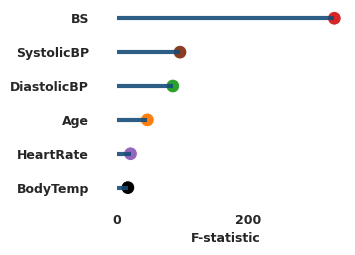

In [ ]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

rcParams['font.family'] = 'Arial'

anova_sorted = anova_df.sort_values(by='F-statistic', ascending=False).copy()
anova_sorted['highlight'] = ['Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5'] + ['Other'] * (len(anova_sorted) - 5)

highlight_colors = {
    'Top 1': '#d62728',
    'Top 2': '#873e23',
    'Top 3': '#2ca02c',
    'Top 4': '#ff7f0e',
    'Top 5': '#9467bd',
    'Other': 'black'
}

sns.set_theme(style="white", context="talk", font_scale=1.2)
plt.figure(figsize=(4, 3))

plt.hlines(y=anova_sorted.index, xmin=0, xmax=anova_sorted['F-statistic'],
           color='#154c79', alpha=0.9, linewidth=3)

sns.scatterplot(
    x='F-statistic',
    y=anova_sorted.index,
    hue='highlight',
    data=anova_sorted,
    palette=highlight_colors,
    s=100,
    edgecolor='white',
    legend=False
)

plt.xlabel('F-statistic', fontsize=9, fontweight='bold')
plt.ylabel('', fontsize=9)
plt.title('', fontsize=9, weight='bold', pad=15)

ax = plt.gca()

for label in ax.get_xticklabels():
    label.set_fontsize(9)
    label.set_fontweight('bold')

for label in ax.get_yticklabels():
    label.set_fontsize(9)
    label.set_weight('bold')

sns.despine(left=True, bottom=True)
plt.grid(False)
plt.tight_layout()
plt.savefig("anova_plot_f_static.tiff", dpi=300, bbox_inches='tight')
plt.show()


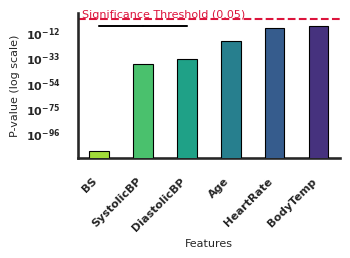

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

anova_df_sorted = anova_df.sort_values("P-value", ascending=True).reset_index()
features = anova_df_sorted["index"]
pvals = anova_df_sorted["P-value"]

cmap = sns.color_palette("viridis", n_colors=len(pvals))
colours = cmap[::-1]
bar_width = 0.45

sns.set_theme(style="white", context="talk", font_scale=1.2)
fig, ax = plt.subplots(figsize=(4, 3))

bars = ax.bar(
    x=np.arange(len(features)),
    height=pvals,
    width=bar_width,
    color=colours,
    edgecolor="black",
    linewidth=0.8,
    zorder=3,
)

if "StdErr" in anova_df_sorted.columns:
    yerr = anova_df_sorted["StdErr"]
    ax.errorbar(
        np.arange(len(features)),
        pvals,
        yerr=yerr,
        fmt="none",
        ecolor="black",
        capsize=4,
        linewidth=1.1,
        zorder=4,
    )

significance_threshold = 0.05
ax.axhline(significance_threshold, color="crimson", linestyle="--", linewidth=1.5)
ax.text(
    -0.4, significance_threshold * 1.1,
    "Significance Threshold (0.05)",
    color="crimson",
    fontsize=8,
    ha="left",
    va="bottom",
)

def stars(p):
    return "" if p <= 1e-4 else ("" if p <= 1e-3 else ("" if p <= 1e-2 else "" if p <= 0.05 else "ns"))

pairs = [(0, 1), (0, 2), (1, 2)]
comp_p_vals = [1e-5, 7e-4, 0.02]

log_pvals = np.log10(pvals)
log_max = np.max(log_pvals)
bracket_y_log = log_max + 0.1
bracket_step_log = 0.07

for (i, j), p in zip(pairs, comp_p_vals):
    y0 = 10**bracket_y_log
    y1 = 10**(bracket_y_log + 0.02)
    ax.plot([i, j], [y1, y1], lw=1.2, c="black")
    ax.text((i + j) / 2, y1 + (y1 * 0.02), stars(p),
            ha="center", va="bottom", fontsize=12)
    bracket_y_log += bracket_step_log

ax.set_yscale("log")
ax.set_xticks(np.arange(len(features)))
ax.set_xticklabels(features, rotation=45, ha="right", fontsize=12, fontweight='bold')
ax.tick_params(axis='x', labelsize=8)
ax.set_xlabel("Features", fontsize=8)
ax.set_ylabel("P-value (log scale)", fontsize=8)
ax.tick_params(axis='y', labelsize=8)
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

sns.despine()
ax.grid(False)
plt.tight_layout()
plt.show()

significant_results = anova_df_sorted[anova_df_sorted["P-value"] <= significance_threshold]

## Correlation plot

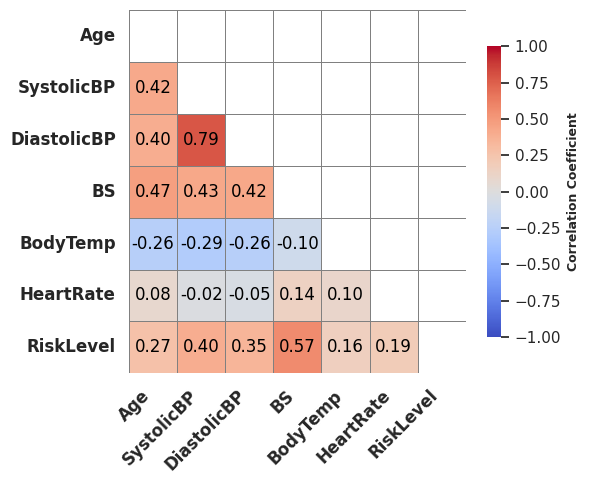

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set consistent font size
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# Apply clean style
sns.set_theme(style="white")

# Create figure
fig, ax = plt.subplots(figsize=(6, 5), facecolor='white')

# Plot the heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap='coolwarm',
    center=0,
    vmin=-1, vmax=1,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    annot_kws={"size": 12, "color": "black"},
    ax=ax
)

# Set tick font size and rotation
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(rotation=0, fontsize=12, fontweight='bold')

# Colorbar label font size and bold
colorbar = ax.collections[0].colorbar
colorbar.set_label('Correlation Coefficient', fontsize=9, fontweight='bold')

plt.tight_layout()

# Save high-quality image
filename = 'correlation_matrix_Nature.tif'
plt.savefig(filename, dpi=600, format='tiff', bbox_inches='tight')




## Univariate plot

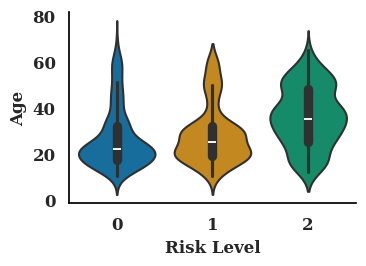

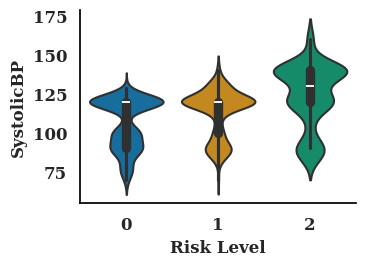

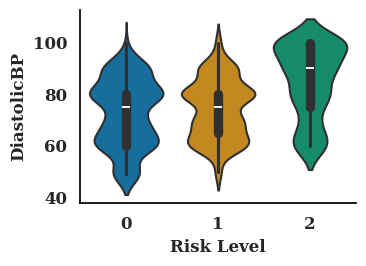

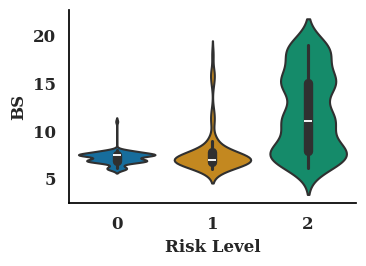

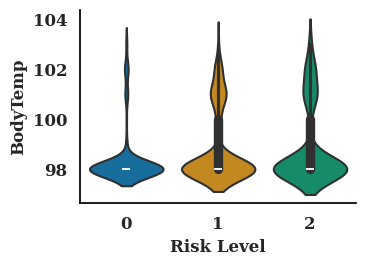

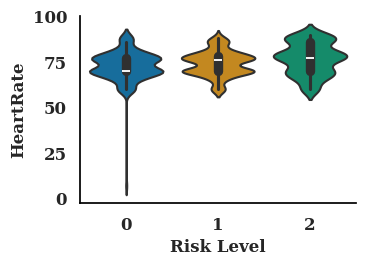

In [ ]:
# Nature-compliant style setup
sns.set_theme(style="white", font_scale=1.5, rc={
    'font.family': 'serif',
    'axes.edgecolor': 'black',
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'grid.alpha': 0.3
})

# Select only numerical columns except RiskLevel
numerical_cols = df.select_dtypes(include=np.number).columns.drop('RiskLevel')

# Loop through columns and plot
for col in numerical_cols:
    plt.figure(figsize=(4, 3))

    sns.violinplot(
        data=df,
        x='RiskLevel',
        y=col,
        inner='box',
        palette='colorblind',
        linewidth=1.5
    )

    plt.xlabel('Risk Level', fontsize=12, fontweight='bold')
    plt.ylabel(col, fontsize=12, fontweight='bold')

    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    sns.despine()
    plt.tight_layout()

    # 🔽 Save high-resolution TIFF
    filename = f'{col}_violin_Nature.tif'
    plt.savefig(filename, dpi=600, format='tiff', bbox_inches='tight')
    plt.show()

    # 📥 Download the plot
    #files.download(filename)

    # ⏱️ Optional delay to avoid overlapping downloads
    #time.sleep(1)


## Bivariate Analysis and Plotting

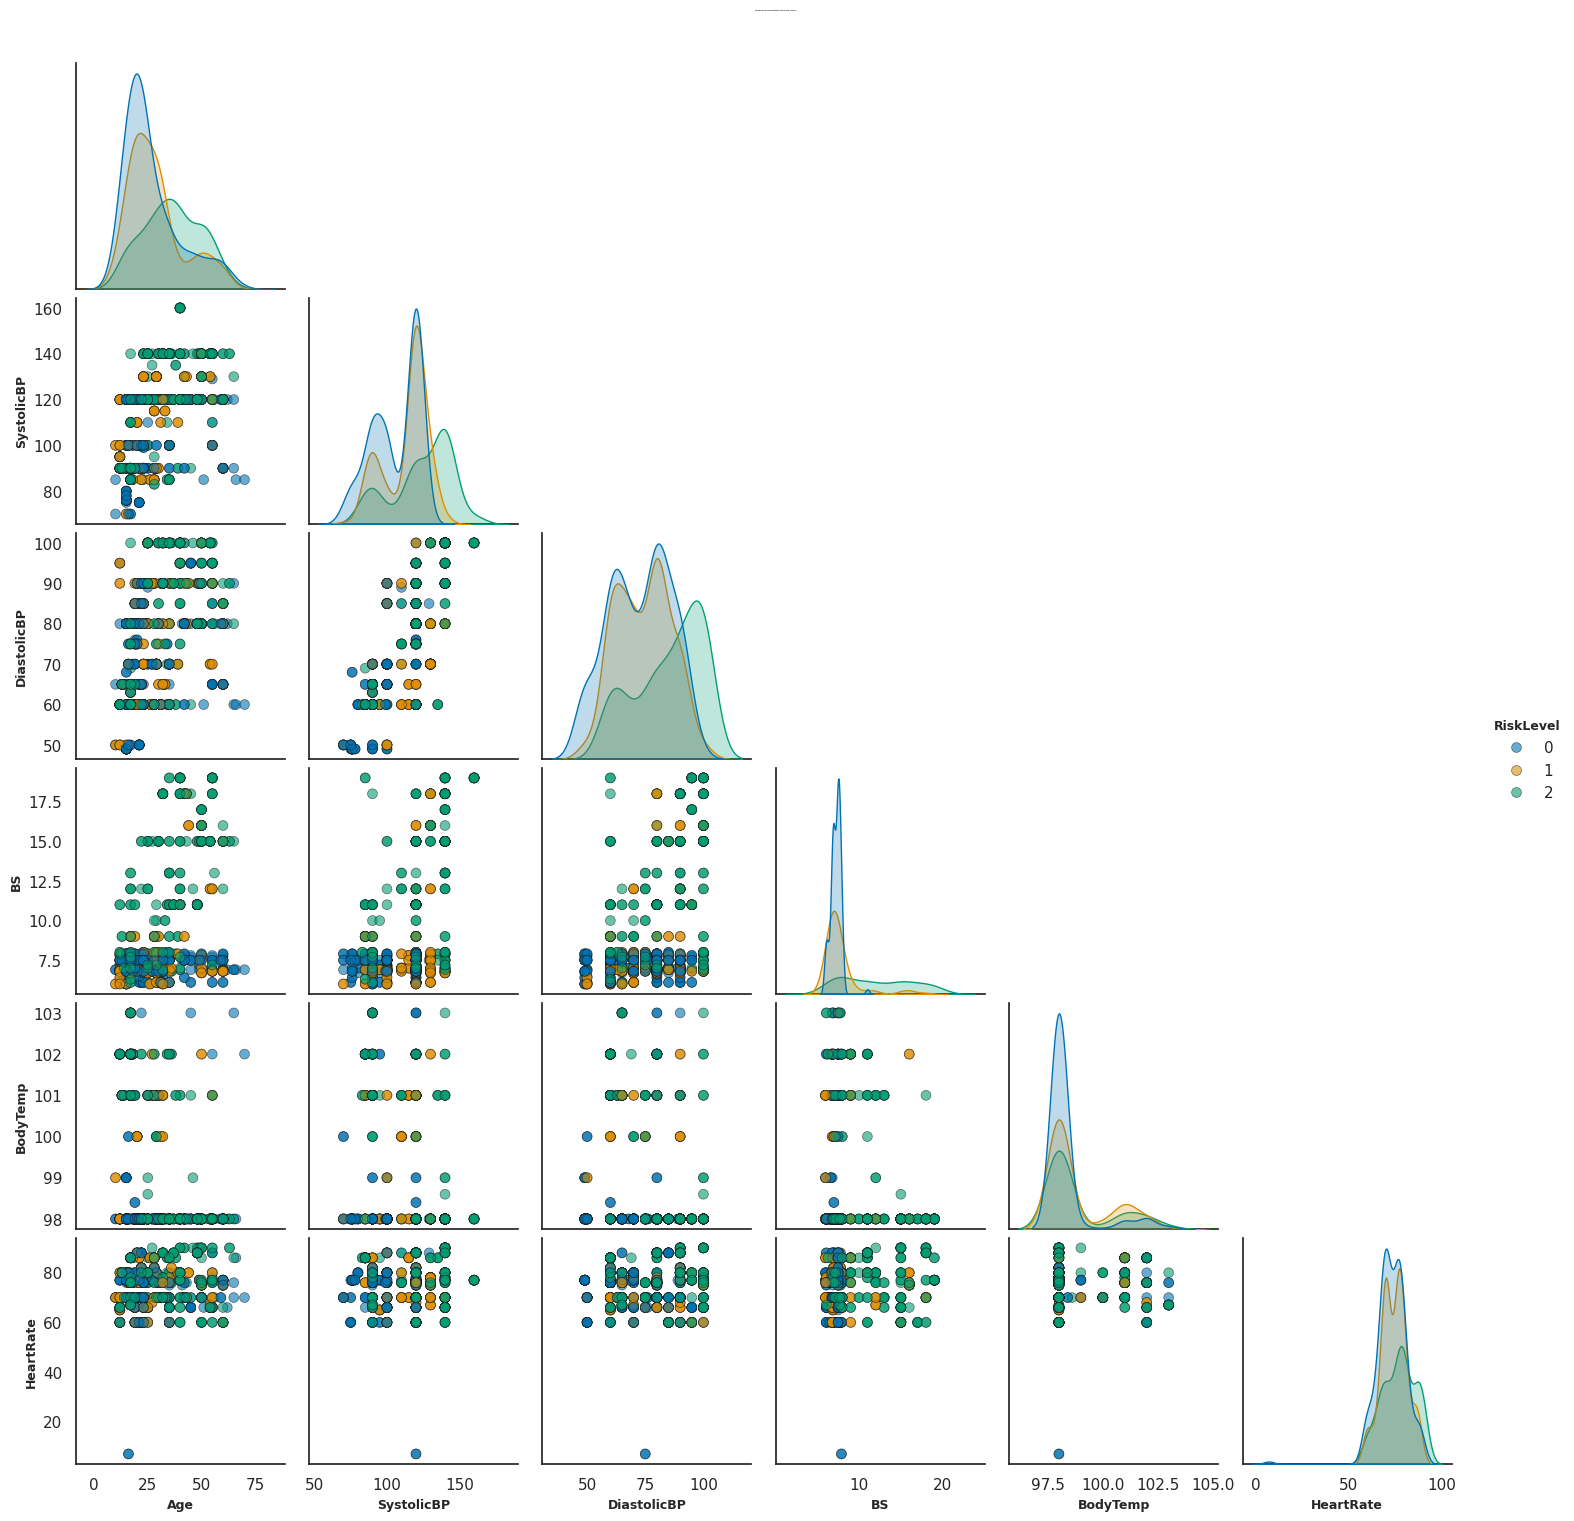

In [ ]:
# Universal Nature-compliant style
mpl.rcParams.update({
    "font.family": "Arial",
    "font.size": 9,
    "axes.labelsize": 9,
    "axes.titlesize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "axes.edgecolor": "black",
    "axes.linewidth": 1.0
})

sns.set_theme(style="white")

# Select numerical columns excluding RiskLevel
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols.drop('RiskLevel', errors='ignore')

# Use Nature-compliant colorblind-safe palette
palette = sns.color_palette("colorblind")

# Create pairplot
pairplot = sns.pairplot(
    df[numerical_cols.tolist() + ['RiskLevel']],
    hue='RiskLevel',
    diag_kind='kde',
    corner=True,
    palette=palette,
    plot_kws={
        'alpha': 0.6,
        's': 50,
        'edgecolor': 'k',
        'linewidth': 0.5
    },
    diag_kws={
        'shade': True,
        'bw_adjust': 1.2
    }
)

# Add title
pairplot.fig.suptitle(
    'Pairwise Relationships Between Top Clinical Features',
    fontsize=0, weight='bold', y=1.02
)

# Set axis labels
for i, var in enumerate(numerical_cols):
    # Bottom row x-axis labels
    ax = pairplot.axes[-1, i]
    ax.set_xlabel(var, fontsize=9, fontweight='bold')
    # Left column y-axis labels
    ax = pairplot.axes[i, 0]
    ax.set_ylabel(var, fontsize=9, fontweight='bold')

# Format legend
legend = pairplot._legend
if legend is not None:
    legend.set_title('RiskLevel')
    legend.get_title().set_fontsize(9)
    legend.get_title().set_fontweight('bold')

# Clean up spines
for ax in pairplot.axes.flatten():
    if ax is not None:
        sns.despine(ax=ax)

# Save high-quality TIFF
#filename = "pairwise_relationships_Nature.tif"
#pairplot.savefig(filename, dpi=600, format='tiff', bbox_inches='tight')

# Show plot
#plt.show()

# 📥 Download TIFF from Colab
#files.download(filename)


# Data Preprocessing

## Check for missing values in the DataFrame

In [ ]:
missing_data = df.isnull().sum()
print(missing_data)

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


Remove biologically implausible age values

In [ ]:
# Keep only rows where Age is between 15 and 45
df = df[(df['Age'] >= 15) & (df['Age'] <= 45)]


In [ ]:
df.shape


(786, 7)

##Splitting the dataset before applying preprocessing steps

In [ ]:
target = 'RiskLevel'
X = df.drop(columns=[target])
y = df[target]

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Target vector shape:  {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,          # 80/20 split
    stratify=y,             # maintains class ratio
    random_state=42         # reproducibility
)

print(f"\n🔹 Training set: {X_train.shape[0]} samples")
print(f"🔹 Testing set:  {X_test.shape[0]} samples")

✅ Feature matrix shape: (786, 6)
✅ Target vector shape:  (786,)

🔹 Training set: 628 samples
🔹 Testing set:  158 samples


## Handling class imbalance

Class Weights: {0: 0.7696078431372549, 1: 0.9874213836477987, 2: 1.4537037037037037}


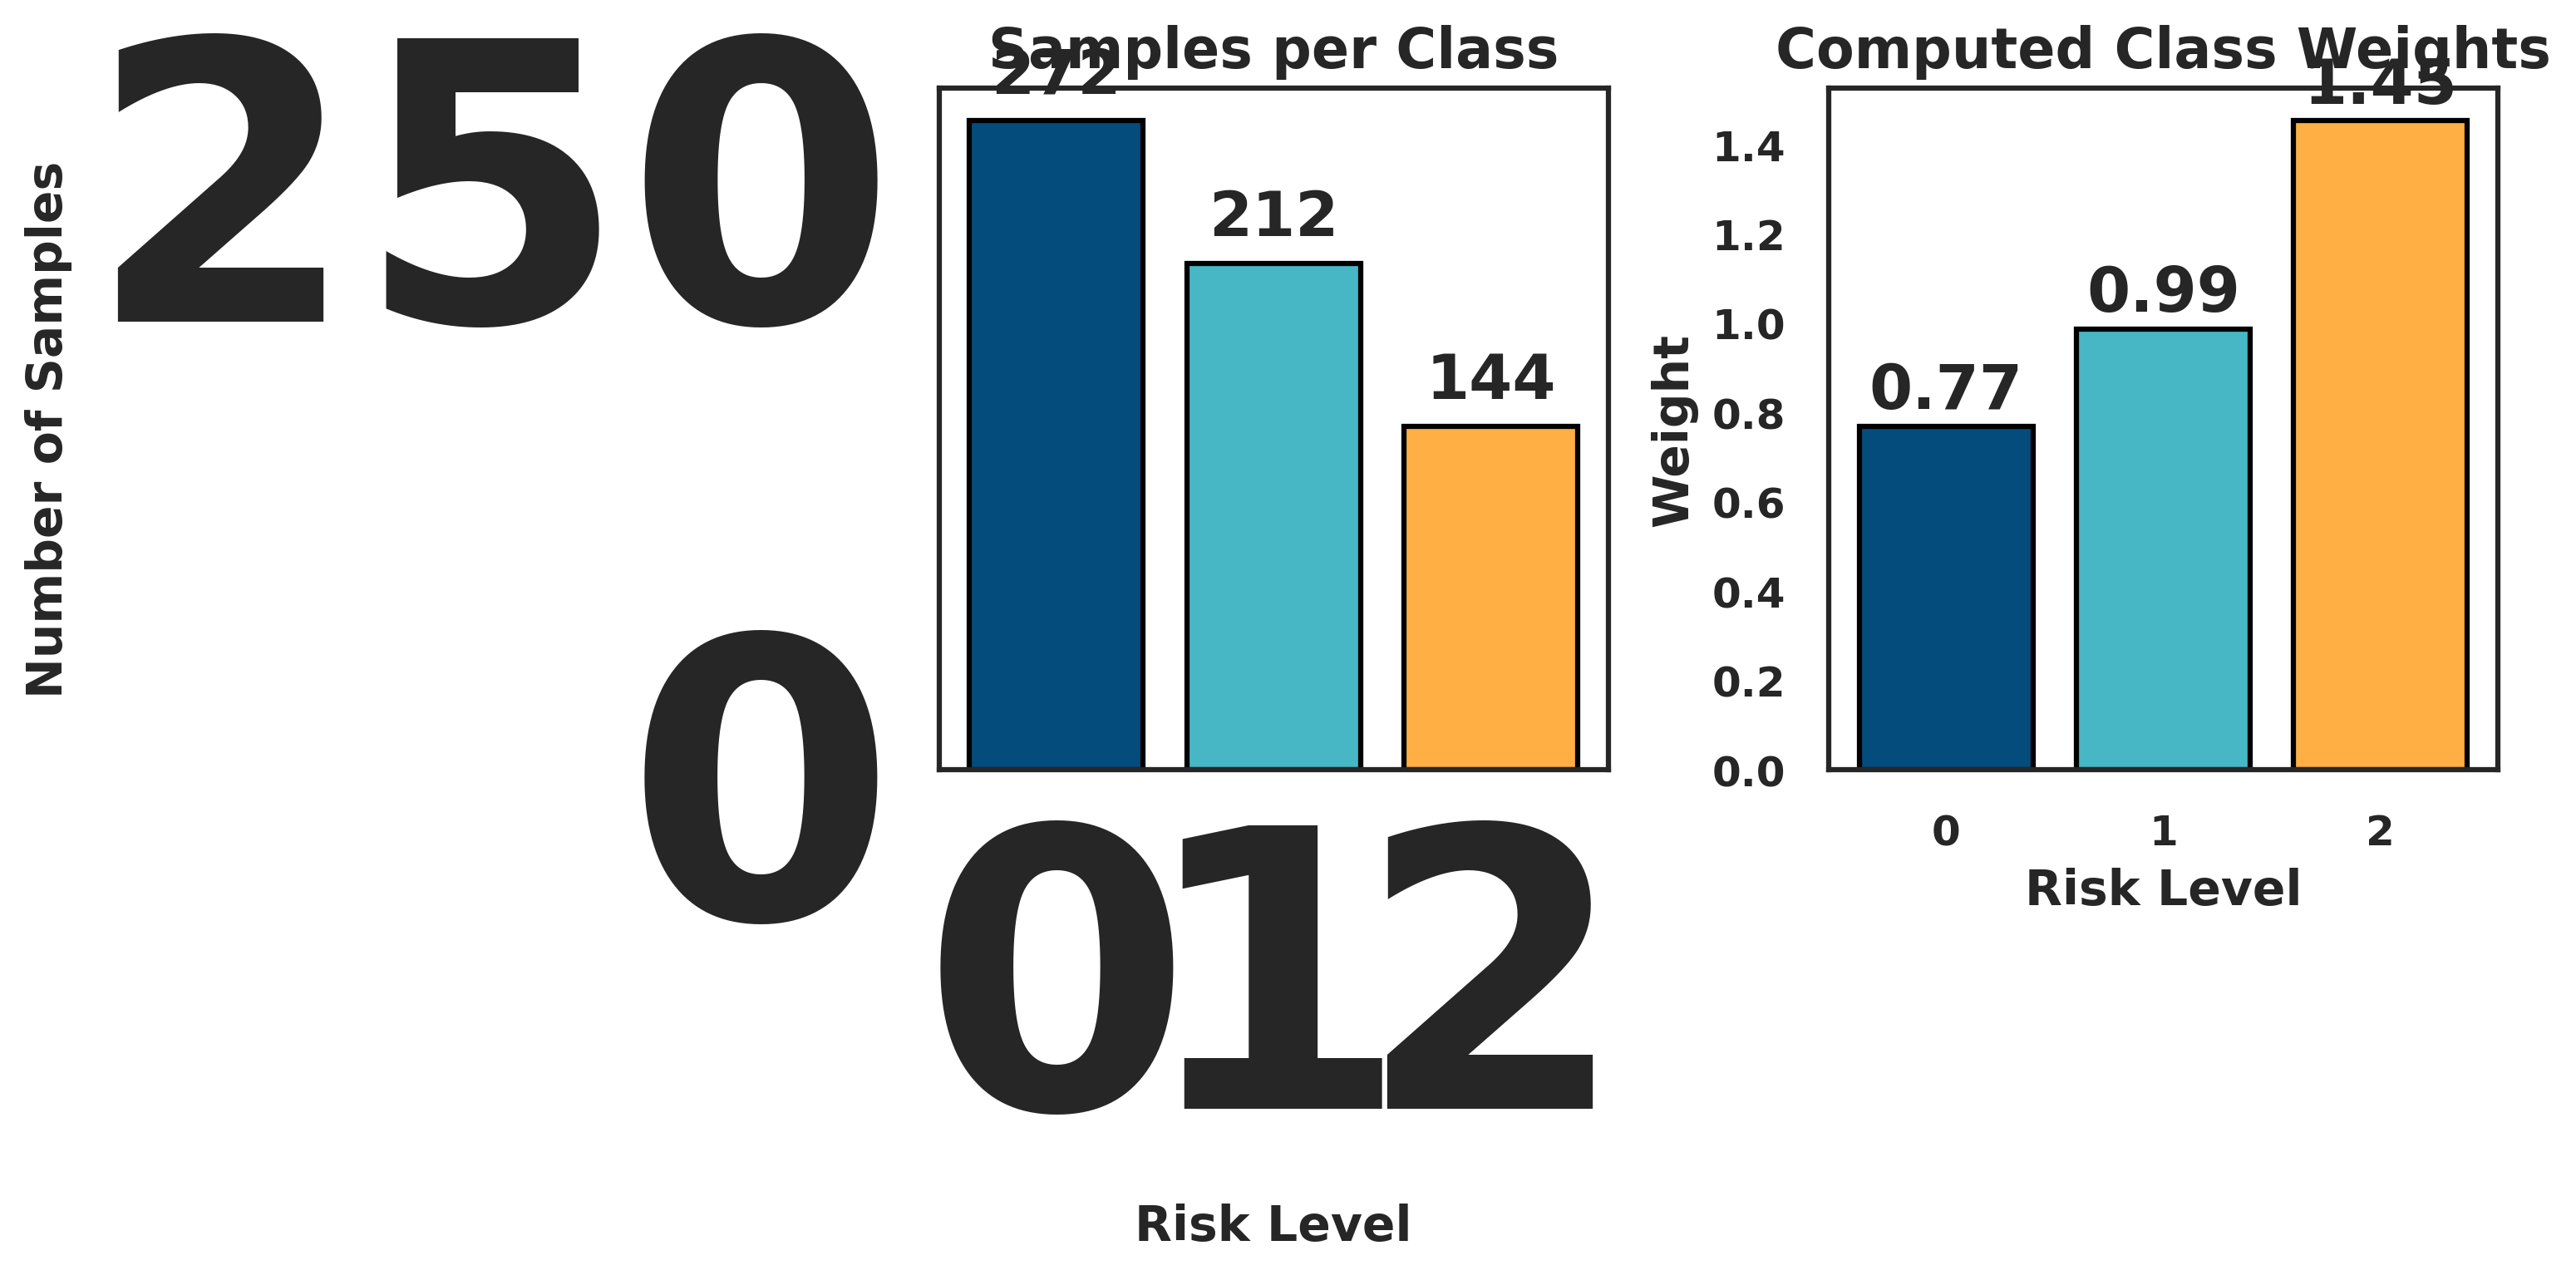

In [ ]:
# Ensure Series
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train)

# ============================================================
# ⚙☑ 3. Compute Class Weights + Sample Weights
# ============================================================
class_counts = y_train.value_counts().sort_index()
total_samples = len(y_train)

class_weights = {
    cls: total_samples / (len(class_counts) * count)
    for cls, count in class_counts.items()
}

sample_weights = y_train.map(class_weights)
print("Class Weights:", class_weights)

# ============================================================
# ☑☑ 4. Visualization of Class Distribution & Weights
# ============================================================

# Seaborn style
sns.set(style='white', context='talk')
plt.rcParams.update({
    'font.family': 'Arial',
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 1.5
})

colors = ['#044c7c', '#47b7c5', '#ffaf43']  # Bold class colors

fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True, facecolor='white')

# (a) Class distribution
axes[0].bar(class_counts.index.astype(str), class_counts.values,
            color=colors[:len(class_counts)], edgecolor='black', linewidth=1.5)
axes[0].set_title("Samples per Class", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Risk Level", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Number of Samples", fontsize=14, fontweight='bold')
axes[0].tick_params(axis='both', which='major', labelsize=112) # Removed labelweight

# Add rectangular border
for spine in axes[0].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Add data labels on top of bars
for i, val in enumerate(class_counts.values):
    axes[0].text(i, val + total_samples*0.01, str(val), ha='center', va='bottom', fontweight='bold')

# (b) Class weights
axes[1].bar(class_counts.index.astype(str),
            [class_weights[c] for c in class_counts.index],
            color=colors[:len(class_counts)], edgecolor='black', linewidth=1.5)
axes[1].set_title("Computed Class Weights", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Risk Level", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Weight", fontsize=14, fontweight='bold')
axes[1].tick_params(axis='both', which='major', labelsize=12) # Removed labelweight

# Add rectangular border
for spine in axes[1].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Add data labels on top of bars
for i, val in enumerate([class_weights[c] for c in class_counts.index]):
    axes[1].text(i, val + 0.01, f"{val:.2f}", ha='center', va='bottom', fontweight='bold')

# Set fontweight for all tick labels after creation
for ax_obj in axes:
    for label in ax_obj.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax_obj.get_yticklabels():
        label.set_fontweight('bold')

plt.savefig("risklevel_distribution_and_weights_NatureStyle.tif", dpi=600, format='tiff')
plt.show()

# ============================================================
# ⚓☑ 5. Class-Balanced Model Dictionary
# ============================================================
pos_weight = (
    class_weights[1] / class_weights[0]
    if len(class_weights) == 2 else None
)


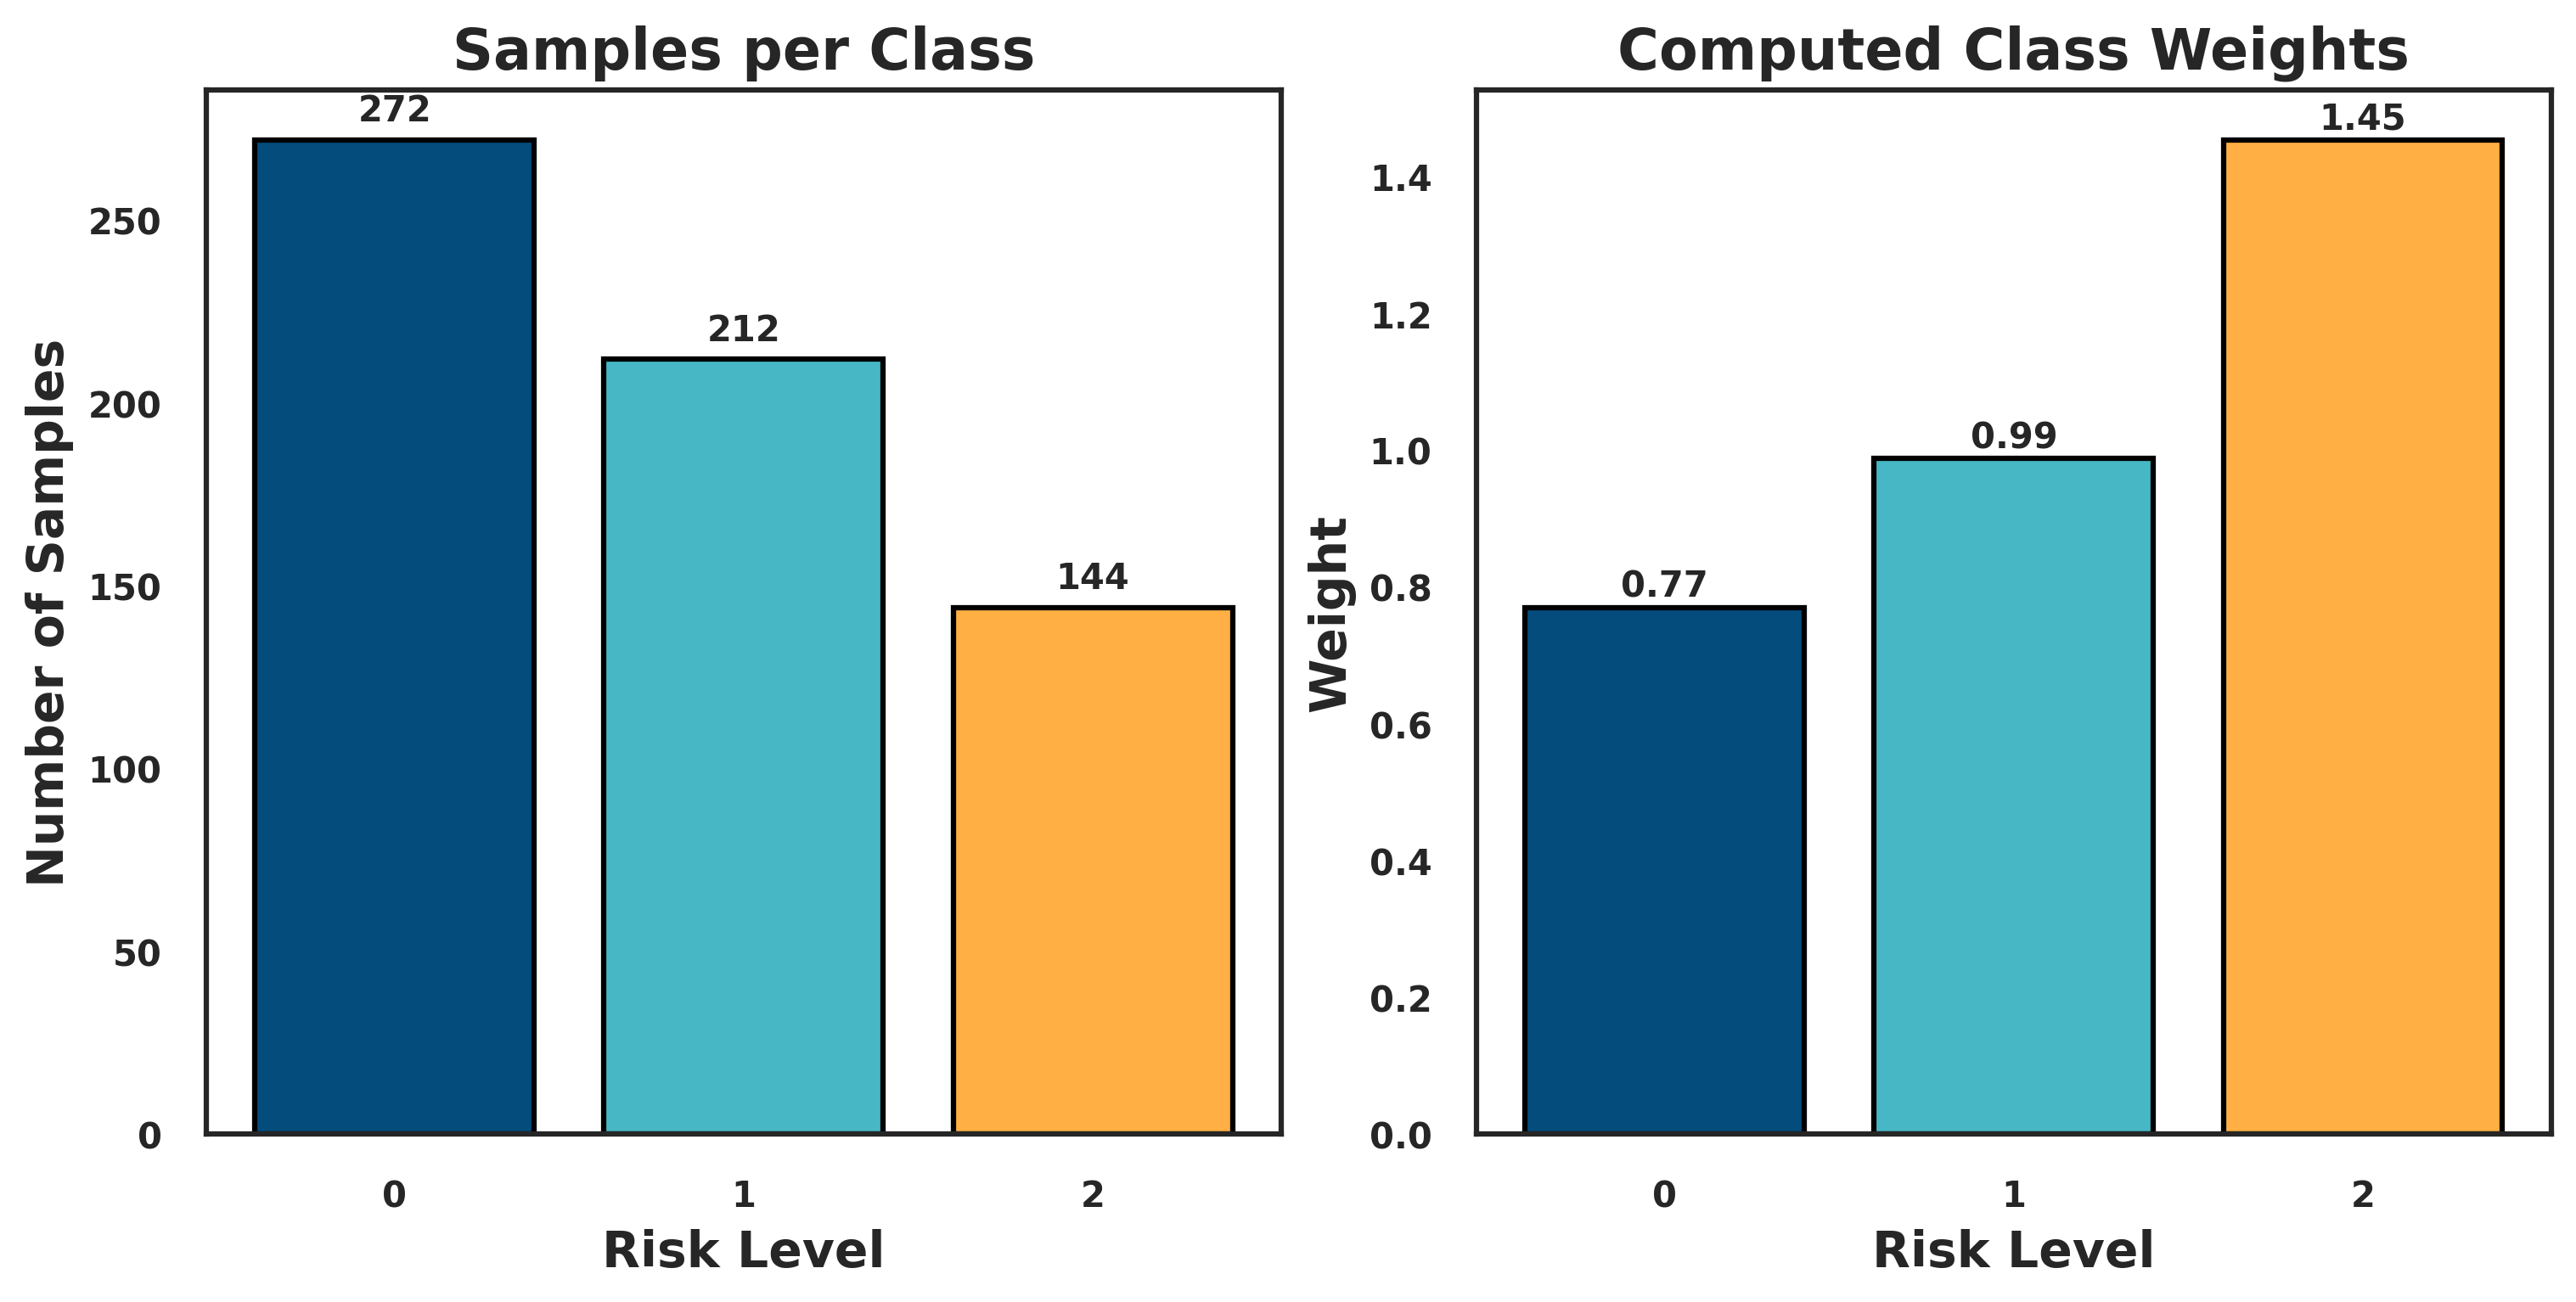

In [ ]:
# ============================================================
# ⚑ Nature-style Class Distribution & Class Weights Plot
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure y_train is a Series
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train)

# Seaborn style
sns.set(style='white', context='talk')
plt.rcParams.update({
    'font.family': 'Arial',
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 1.5
})

colors = ['#044c7c', '#47b7c5', '#ffaf43']  # Bold class colors

fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True, facecolor='white')

# -------------------------------
# (a) Class Distribution
# -------------------------------
axes[0].bar(class_counts.index.astype(str), class_counts.values,
            color=colors[:len(class_counts)], edgecolor='black', linewidth=1.5)
axes[0].set_title("Samples per Class", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Risk Level", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Number of Samples", fontsize=14, fontweight='bold')
axes[0].tick_params(axis='both', which='major', labelsize=10)  # smaller tick labels

# Add rectangular border
for spine in axes[0].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Add data labels on top of bars
for i, val in enumerate(class_counts.values):
    axes[0].text(i, val + total_samples*0.005, str(val),  # smaller offset
                 ha='center', va='bottom', fontweight='bold', fontsize=10)

# -------------------------------
# (b) Class Weights
# -------------------------------
axes[1].bar(class_counts.index.astype(str),
            [class_weights[c] for c in class_counts.index],
            color=colors[:len(class_counts)], edgecolor='black', linewidth=1.5)
axes[1].set_title("Computed Class Weights", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Risk Level", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Weight", fontsize=14, fontweight='bold')
axes[1].tick_params(axis='both', which='major', labelsize=10)  # smaller tick labels

# Add rectangular border
for spine in axes[1].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Add data labels on top of bars
for i, val in enumerate([class_weights[c] for c in class_counts.index]):
    axes[1].text(i, val + 0.005, f"{val:.2f}",  # smaller offset
                 ha='center', va='bottom', fontweight='bold', fontsize=10)

# Ensure bold tick labels
for ax_obj in axes:
    for label in ax_obj.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax_obj.get_yticklabels():
        label.set_fontweight('bold')

# Save figure
plt.savefig("risklevel_distribution_and_weights_NatureStyle.tif", dpi=600, format='tiff')
plt.show()


## Applying data transformation to reduce outliers effect and skewness

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

## Data Standardization for Numeric Columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Model Development

## Model Training

Train various ensemble machine learning models to classify maternal health risk levels.

Define a dictionary models containing instances of RandomForestClassifier, ExtraTreesClassifier, XGBClassifier, CatBoostClassifier, MLPClassifier, TabPFNClassifier and LGBMClassifier.


In [ ]:
from huggingface_hub import login

# Paste your Hugging Face token when prompted
login()

In [ ]:

from sklearn.model_selection import cross_val_predict, StratifiedKFold


# ============================================================
# 📌 1. Define 10-fold CV
# ============================================================
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


# ============================================================
# 📌 2. DEFINE ALL MODELS INCLUDING TABPFN
# ============================================================
models = {
    "DECISION TREE": DecisionTreeClassifier(class_weight=class_weights),
    "RANDOM FOREST": RandomForestClassifier(class_weight=class_weights),
    "MLP CLASSIFIER": MLPClassifier(),
    "XG BOOST": XGBClassifier(
        scale_pos_weight=pos_weight
    ),
    "EXTRA TREES": ExtraTreesClassifier(class_weight=class_weights),
    "SVC": SVC(kernel="linear", gamma="auto", probability=True, class_weight=class_weights),
    "ADA BOOST": AdaBoostClassifier(),
    "GRADIENT BOOSTER": GradientBoostingClassifier(),
    "CATBOOST": CatBoostClassifier(
        verbose=False,
        class_weights=[class_weights[c] for c in sorted(class_weights.keys())]
    ),
    "LIGHTGBM": LGBMClassifier(
        verbosity=-1,
        class_weight=class_weights
    ),

    "TABPFN": TabPFNClassifier()
}


# ============================================================
# 🧪 3. CV Training Loop (10-fold) FOR *ALL* MODELS
# ============================================================
predictions = {}

for name, model in models.items():
    print(f"▶ Running 10-fold CV for {name}...")

    try:
        preds = cross_val_predict(
            model,
            X_train,
            y_train,
            cv=cv,
            fit_params={"sample_weight": sample_weights}
        )
    except TypeError:
        # TabPFN + some others don't accept sample_weight
        preds = cross_val_predict(
            model,
            X_train,
            y_train,
            cv=cv
        )

    predictions[name] = preds
    print(f"✅ Finished 10-fold CV for {name}")


# ============================================================
# 🎉 DONE
# ============================================================
print("\n🎉 All models (including TabPFN) trained with 10-fold CV!")


▶ Running 10-fold CV for DECISION TREE...
✅ Finished 10-fold CV for DECISION TREE
▶ Running 10-fold CV for RANDOM FOREST...
✅ Finished 10-fold CV for RANDOM FOREST
▶ Running 10-fold CV for MLP CLASSIFIER...
✅ Finished 10-fold CV for MLP CLASSIFIER
▶ Running 10-fold CV for XG BOOST...
✅ Finished 10-fold CV for XG BOOST
▶ Running 10-fold CV for EXTRA TREES...
✅ Finished 10-fold CV for EXTRA TREES
▶ Running 10-fold CV for SVC...
✅ Finished 10-fold CV for SVC
▶ Running 10-fold CV for ADA BOOST...
✅ Finished 10-fold CV for ADA BOOST
▶ Running 10-fold CV for GRADIENT BOOSTER...
✅ Finished 10-fold CV for GRADIENT BOOSTER
▶ Running 10-fold CV for CATBOOST...
✅ Finished 10-fold CV for CATBOOST
▶ Running 10-fold CV for LIGHTGBM...
✅ Finished 10-fold CV for LIGHTGBM
▶ Running 10-fold CV for TABPFN...


tabpfn-v2.5-classifier-v2.5_default.ckpt:   0%|          | 0.00/42.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

✅ Finished 10-fold CV for TABPFN

🎉 All models (including TabPFN) trained with 10-fold CV!


##Model Performance Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

results = {}

for name, preds in predictions.items():
    # preds are out-of-fold predictions from 10-fold CV
    y_pred = preds

    accuracy = accuracy_score(y_train, y_pred)

    cm = confusion_matrix(y_train, y_pred)
    report = classification_report(y_train, y_pred, output_dict=True)

    sensitivity = report['1']['recall']          # True Positive Rate
    specificity = report['0']['recall']          # True Negative Rate
    precision = report['1']['precision']
    f1 = report['1']['f1-score']

    results[name] = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision,
        'f1_score': f1
    }


# 📌 PRINT RESULTS
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"  Specificity: {metrics['specificity']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print("-" * 30)


Model: DECISION TREE
  Accuracy: 0.8408
  Sensitivity: 0.8726
  Specificity: 0.7794
  Precision: 0.7430
  F1 Score: 0.8026
------------------------------
Model: RANDOM FOREST
  Accuracy: 0.8487
  Sensitivity: 0.8443
  Specificity: 0.8309
  Precision: 0.7650
  F1 Score: 0.8027
------------------------------
Model: MLP CLASSIFIER
  Accuracy: 0.7404
  Sensitivity: 0.5566
  Specificity: 0.8456
  Precision: 0.6743
  F1 Score: 0.6098
------------------------------
Model: XG BOOST
  Accuracy: 0.8471
  Sensitivity: 0.8349
  Specificity: 0.8346
  Precision: 0.7797
  F1 Score: 0.8064
------------------------------
Model: EXTRA TREES
  Accuracy: 0.8487
  Sensitivity: 0.8679
  Specificity: 0.8088
  Precision: 0.7667
  F1 Score: 0.8142
------------------------------
Model: SVC
  Accuracy: 0.6417
  Sensitivity: 0.3821
  Specificity: 0.7941
  Precision: 0.5329
  F1 Score: 0.4451
------------------------------
Model: ADA BOOST
  Accuracy: 0.6990
  Sensitivity: 0.4811
  Specificity: 0.8272
  Precision:

Calibration plot TabPFN

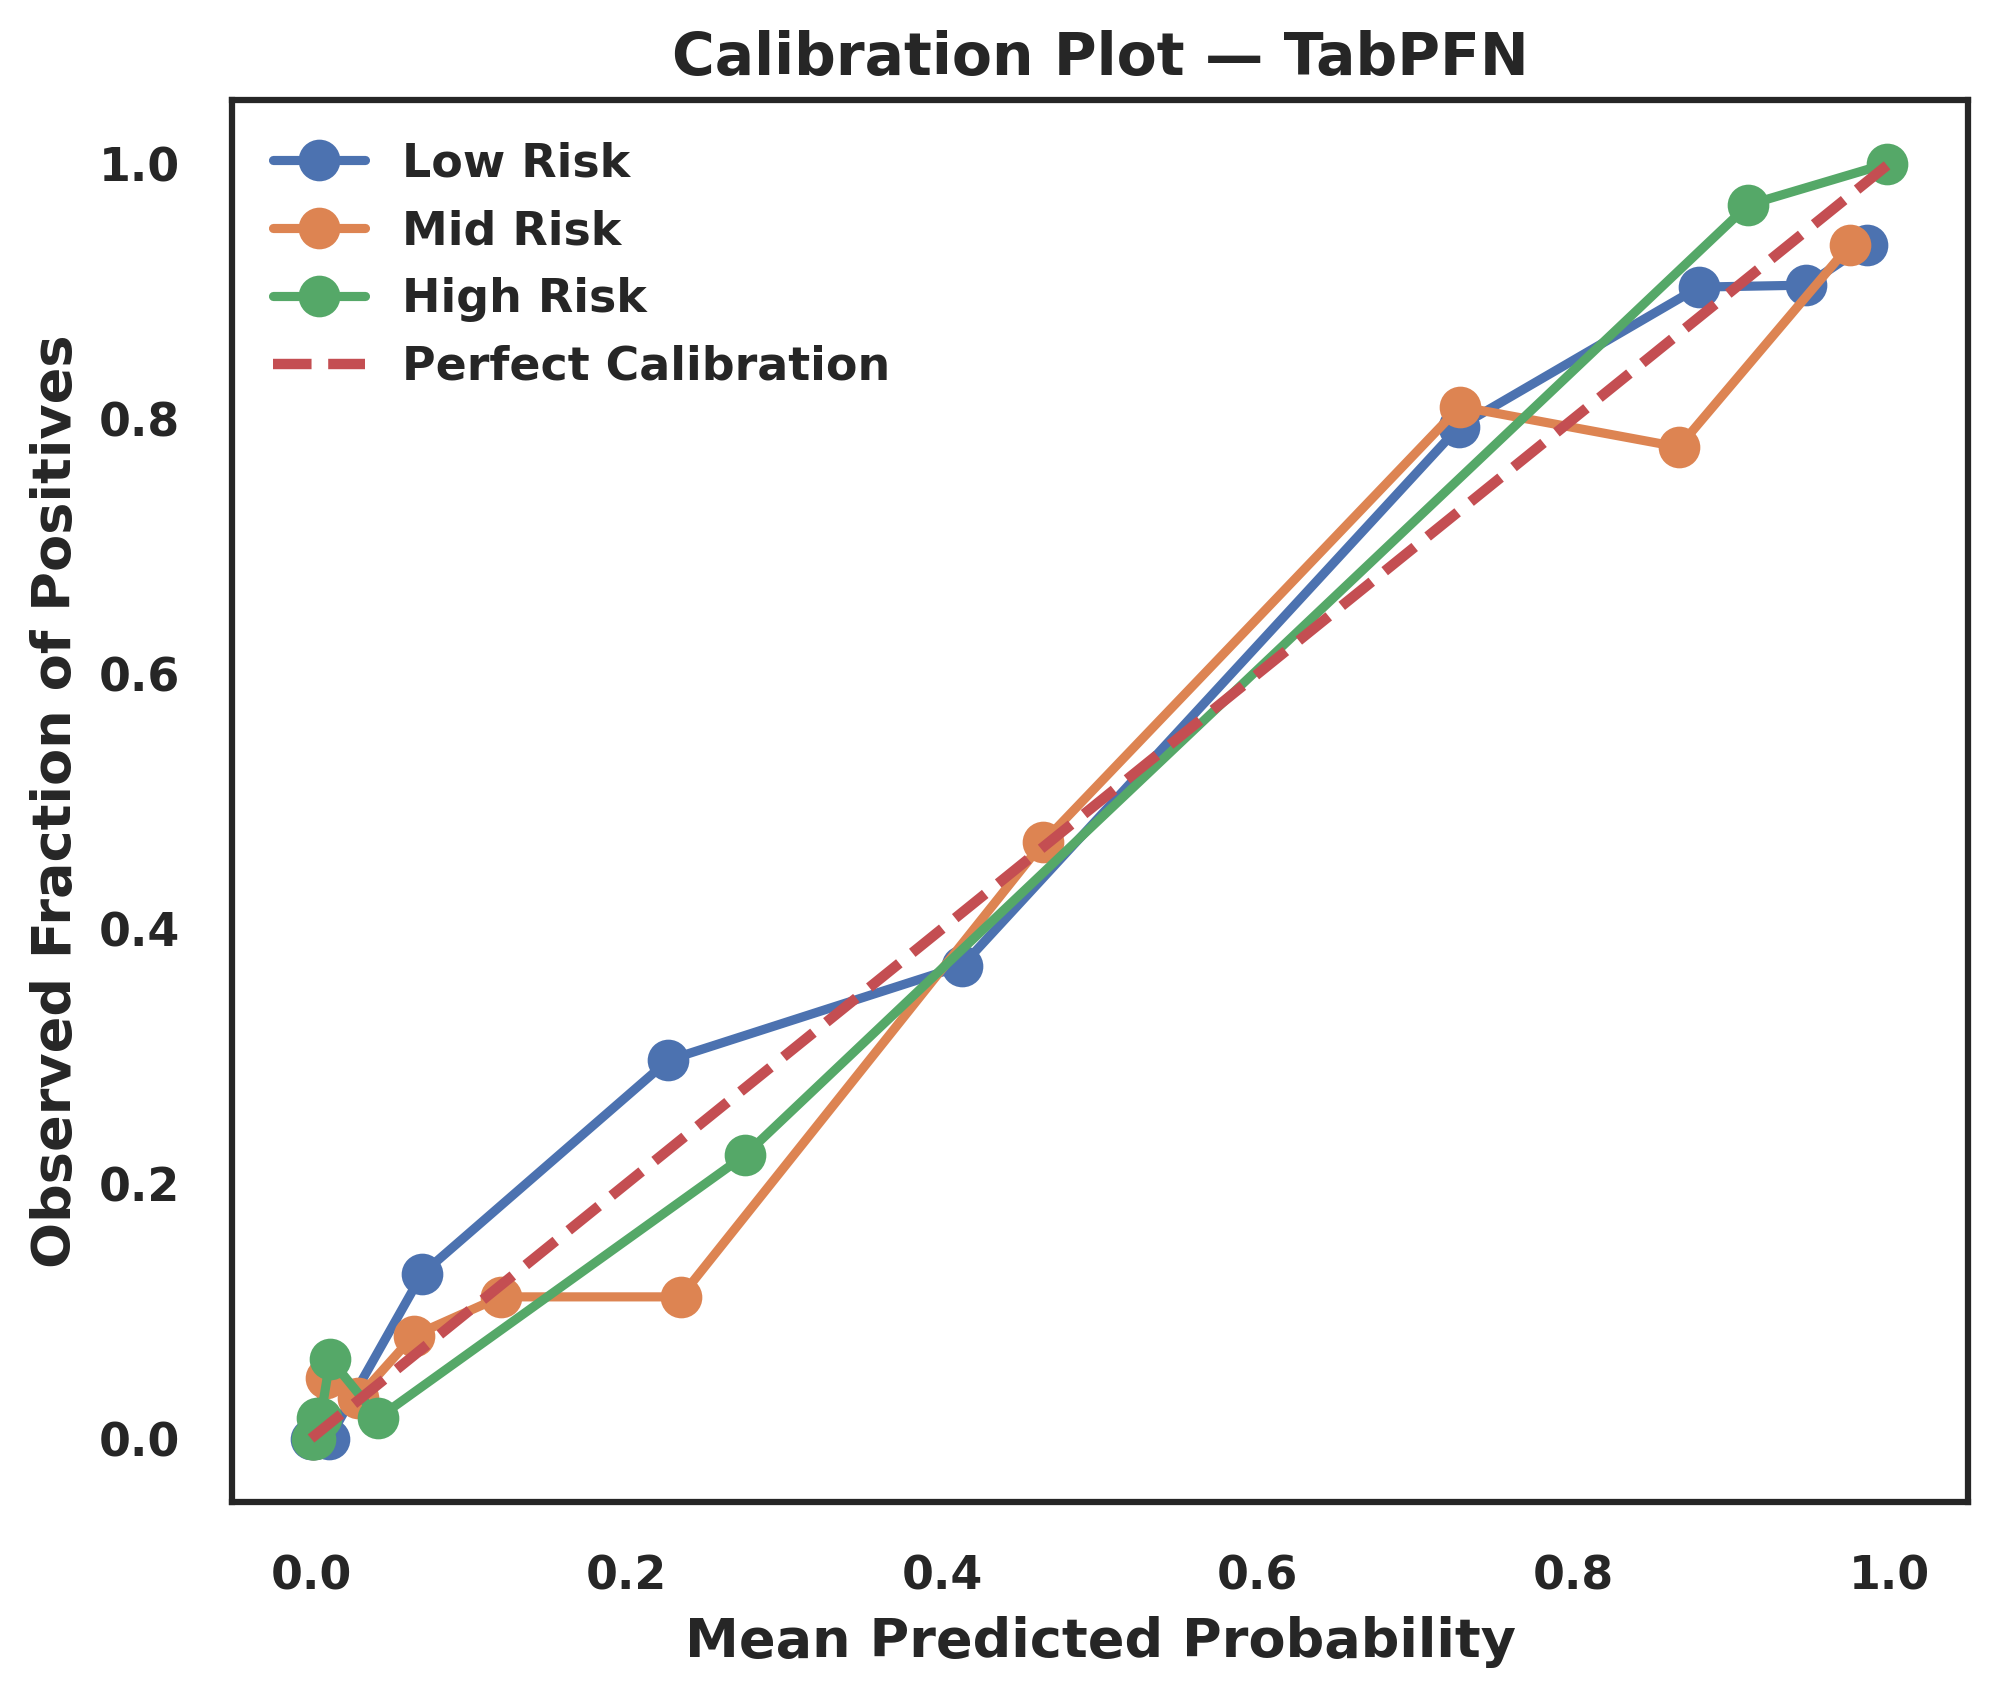

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
tabpfn = TabPFNClassifier()

probs = cross_val_predict(
    tabpfn,
    X_train,
    y_train,
    cv=cv,
    method="predict_proba"
)

classes = np.unique(y_train)
y_bin = label_binarize(y_train, classes=classes)

risk_names = {0: "Low Risk", 1: "Mid Risk", 2: "High Risk"}

plt.figure(figsize=(7, 6))

for i, cls in enumerate(classes):
    frac_pos, mean_pred = calibration_curve(
        y_bin[:, i],
        probs[:, i],
        n_bins=10,
        strategy="quantile"
    )
    plt.plot(mean_pred, frac_pos, marker="o", linewidth=2.2, label=risk_names[cls])

plt.plot([0, 1], [0, 1], linestyle="--", linewidth=2.5, label="Perfect Calibration")

plt.xlabel("Mean Predicted Probability", fontsize=13, fontweight="bold")
plt.ylabel("Observed Fraction of Positives", fontsize=13, fontweight="bold")
plt.title("Calibration Plot — TabPFN", fontsize=14, fontweight="bold")

plt.legend(prop={"weight": "bold", "size": 11}, frameon=False)
plt.xticks(fontsize=11, fontweight="bold")
plt.yticks(fontsize=11, fontweight="bold")
plt.gca().set_facecolor("white")
plt.grid(False)

plt.tight_layout()
plt.show()


Decision curve for TabPFN

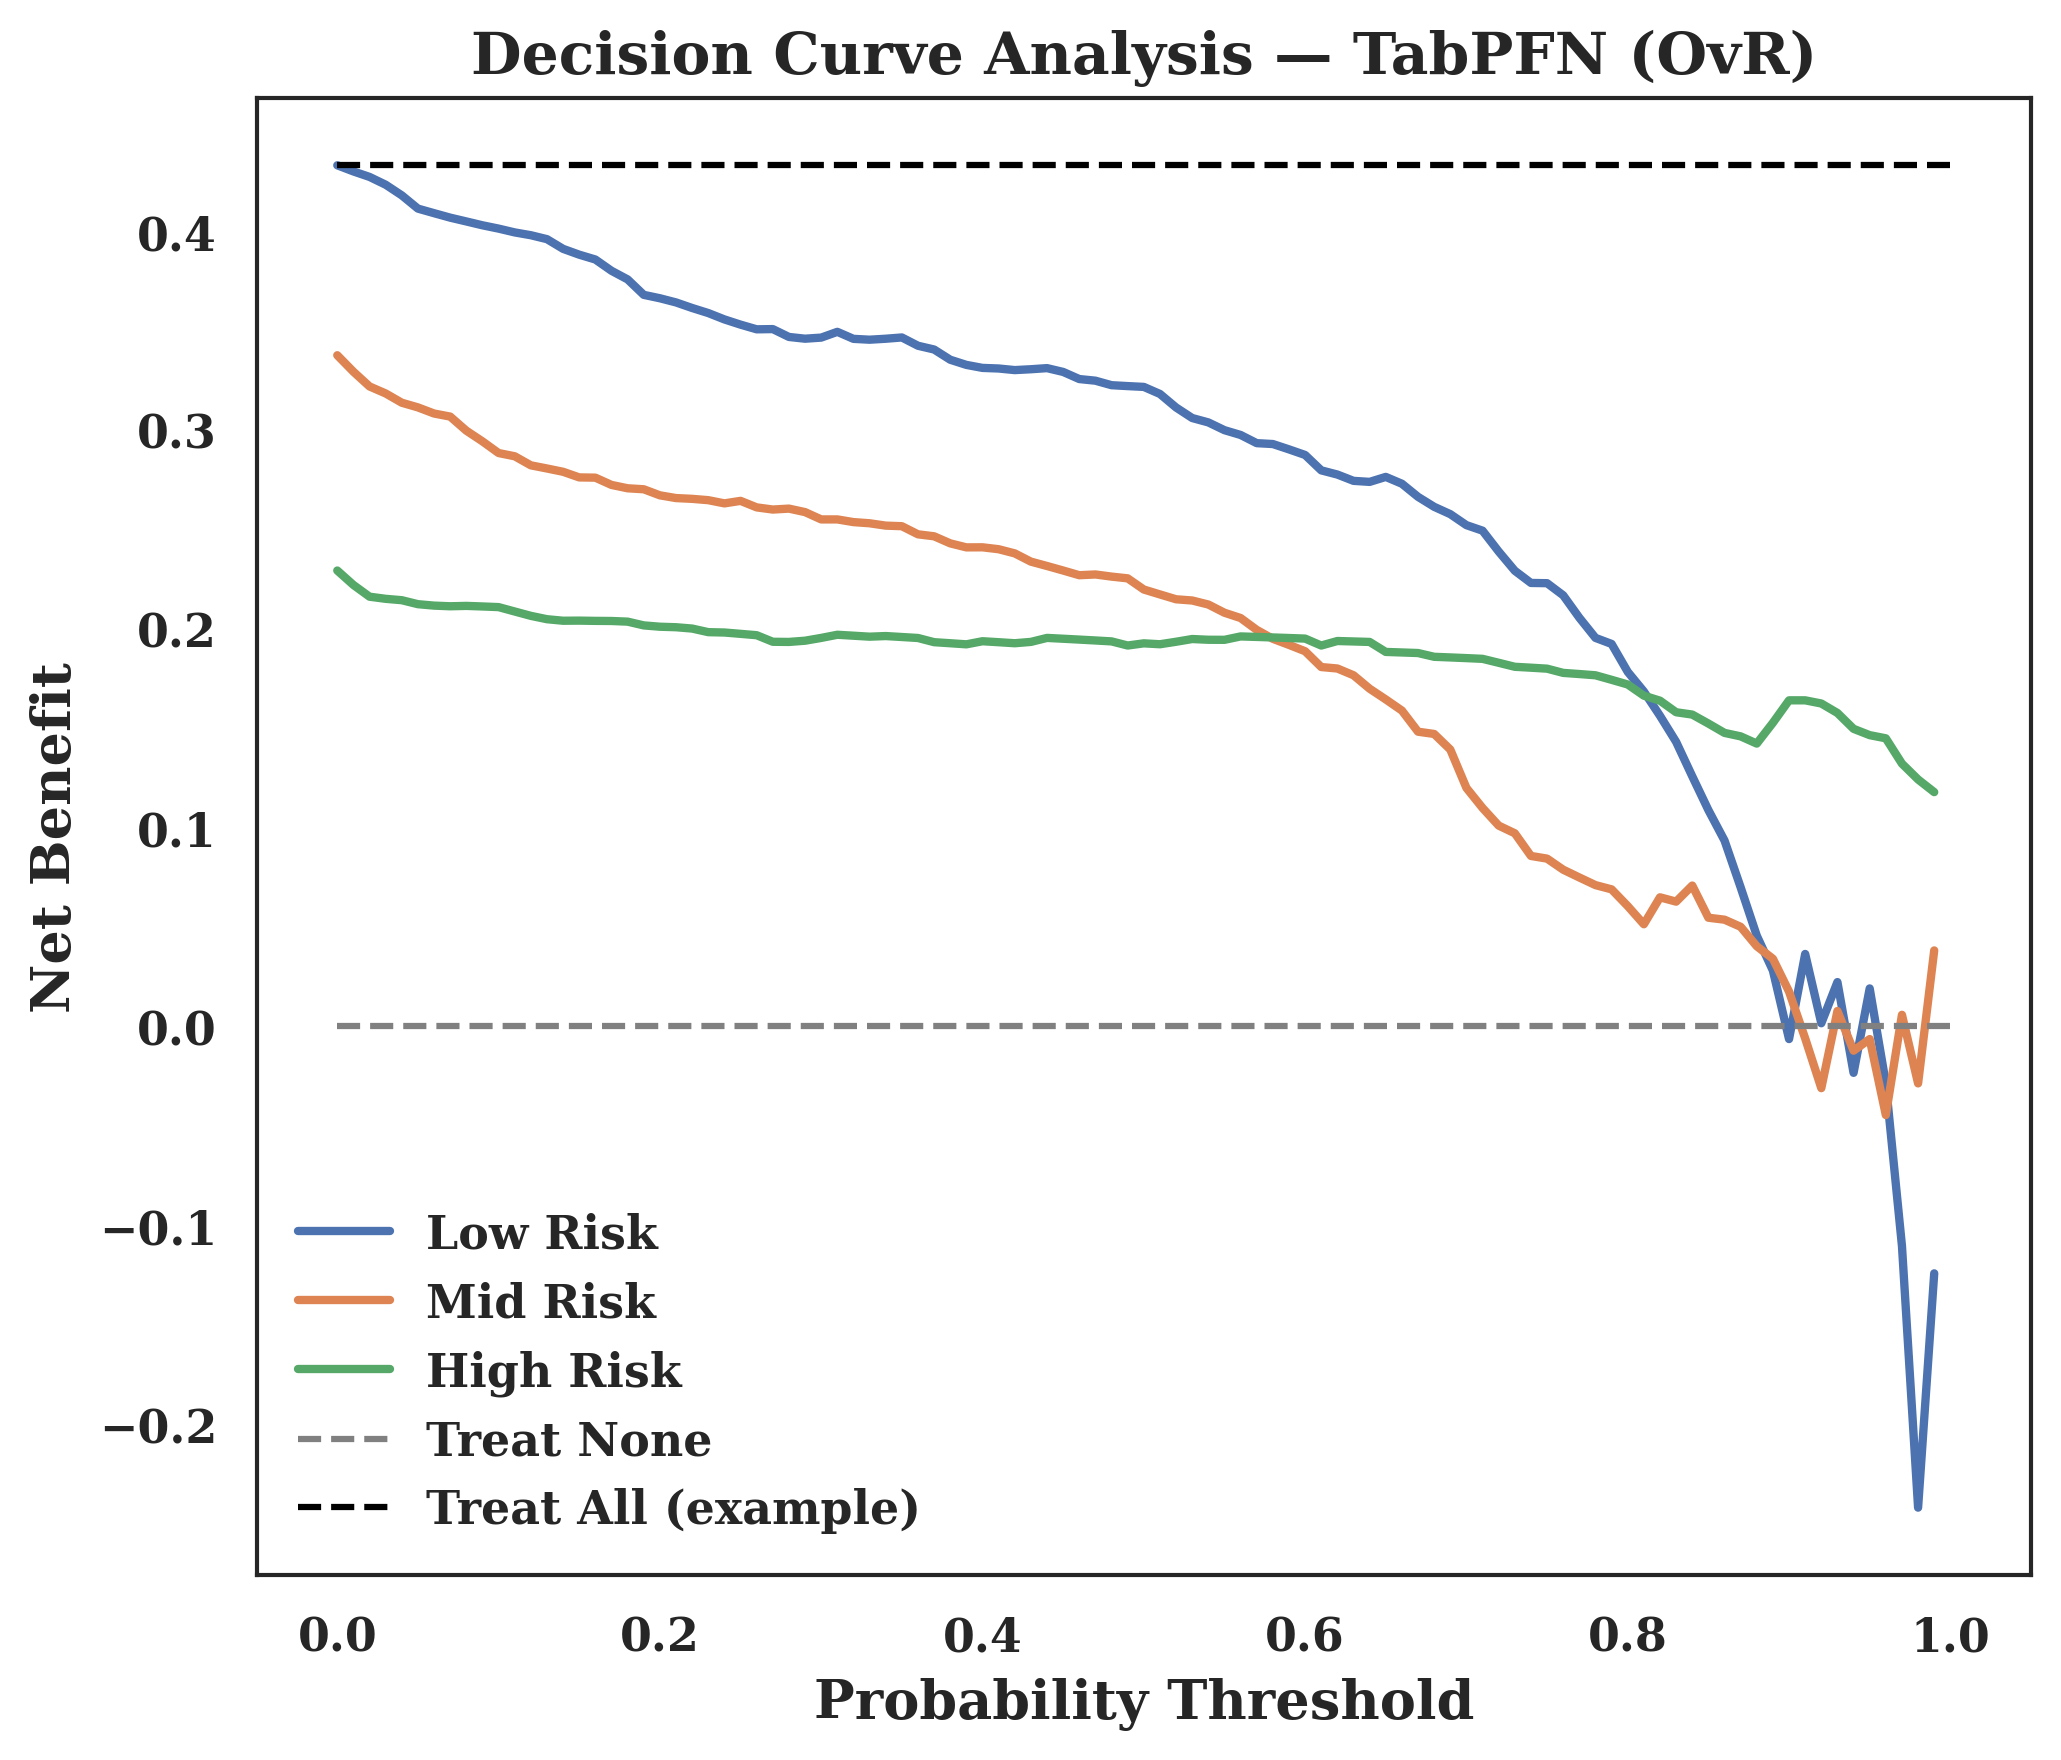

In [ ]:
def decision_curve(y_true_bin, y_prob, thresholds=np.linspace(0, 1, 101)):
    N = len(y_true_bin)
    net_benefit = []

    for t in thresholds:
        pred_pos = (y_prob >= t).astype(int)
        TP = np.sum(pred_pos * y_true_bin)
        FP = np.sum(pred_pos * (1 - y_true_bin))
        nb = (TP / N) - (FP / N) * (t / (1 - t))
        net_benefit.append(nb)

    return thresholds, np.array(net_benefit)


plt.figure(figsize=(7, 6))
risk_names = {0: "Low Risk", 1: "Mid Risk", 2: "High Risk"}

for i, cls in enumerate(classes):
    thresh, nb = decision_curve(y_bin[:, i], probs[:, i])
    plt.plot(thresh, nb, linewidth=2, label=risk_names[cls])

plt.plot([0, 1], [0, 0], linestyle="--", color="gray", label="Treat None")
plt.plot([0, 1], [np.mean(y_bin[:, 0])] * 2, linestyle="--", color="black", label="Treat All (example)")

plt.xlabel("Probability Threshold", fontsize=13, fontweight="bold")
plt.ylabel("Net Benefit", fontsize=13, fontweight="bold")
plt.title("Decision Curve Analysis — TabPFN (OvR)", fontsize=14, fontweight="bold")

plt.legend(prop={"weight": "bold", "size": 11}, frameon=False)
plt.xticks(fontsize=11, fontweight="bold")
plt.yticks(fontsize=11, fontweight="bold")
plt.gca().set_facecolor("white")
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
import os
import joblib
import warnings
from copy import deepcopy
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def calculate_macro_specificity(cm):
    K = cm.shape[0]
    total = cm.sum()
    spec_sum = 0.0
    for i in range(K):
        tn = total - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
        fp = cm[:, i].sum() - cm[i, i]
        denom = tn + fp
        spec_sum += (tn / denom) if denom > 0 else 0.0
    return spec_sum / K

if 'tuned_models' in globals() and isinstance(models, dict) and len(models) > 0:
    models_to_train = models
    print("Using tuned_models for final training/evaluation.")
elif 'models' in globals() and isinstance(models, dict) and len(models) > 0:
    models_to_train = models
    print("Using models dict for final training/evaluation (will fit defaults).")
else:
    raise RuntimeError("No models found. Define `tuned_models` or `models` dict in the workspace.")

if 'X_train' not in globals() or 'y_train' not in globals():
    raise RuntimeError("X_train and y_train must be defined in the workspace.")
if 'X_test' not in globals() or 'y_test' not in globals():
    raise RuntimeError("X_test and y_test must be defined in the workspace.")

save_dir = "trained_models"
os.makedirs(save_dir, exist_ok=True)

use_sample_weight = 'sample_weights' in globals() and sample_weights is not None

fitted_models = {}
fit_errors = {}

for name, model in models_to_train.items():
    print(f"\n--- Training: {name} ---")
    try:
        estimator = deepcopy(model)
        if name.upper().startswith("CATBOOST"):
            if use_sample_weight:
                estimator.fit(X_train, y_train, sample_weight=sample_weights)
            else:
                estimator.fit(X_train, y_train)
        elif name.upper().startswith("XG") or 'XGB' in name.upper():
            if use_sample_weight:
                estimator.fit(X_train, y_train, sample_weight=sample_weights, eval_metric="logloss")
            else:
                estimator.fit(X_train, y_train, eval_metric="logloss")
        elif "TABPFN" in name.upper():
            try:
                estimator.fit(X_train, y_train)
            except TypeError:
                estimator.fit(X_train.values if hasattr(X_train, "values") else X_train,
                              y_train.values if hasattr(y_train, "values") else y_train)
        else:
            if use_sample_weight:
                try:
                    estimator.fit(X_train, y_train, sample_weight=sample_weights)
                except TypeError:
                    estimator.fit(X_train, y_train)
            else:
                estimator.fit(X_train, y_train)

        fname = os.path.join(save_dir, f"{name.replace(' ', '_')}_fitted.joblib")
        joblib.dump(estimator, fname)
        print(f"Saved fitted model to {fname}")

        fitted_models[name] = estimator

    except Exception as e:
        warnings.warn(f"[Warning] Failed to fit model '{name}': {e}")
        fit_errors[name] = str(e)
        continue

test_results = {}
eval_errors = {}

for name, model in fitted_models.items():
    print(f"\n--- Evaluating on test set: {name} ---")
    try:
        y_pred = model.predict(X_test)
    except Exception as e:
        warnings.warn(f"[Warning] Model '{name}' failed to predict on X_test: {e}")
        eval_errors[name] = str(e)
        continue

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average="macro")
    recall_macro = recall_score(y_test, y_pred, average="macro")
    f1_macro = f1_score(y_test, y_pred, average="macro")
    specificity_macro = calculate_macro_specificity(cm)

    test_results[name] = {
        "accuracy": accuracy,
        "precision_macro": precision_macro,
        "recall_macro": recall_macro,
        "f1_macro": f1_macro,
        "specificity_macro": specificity_macro,
        "confusion_matrix": cm
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (macro): {precision_macro:.4f}")
    print(f"Recall (macro):    {recall_macro:.4f}")
    print(f"F1 (macro):        {f1_macro:.4f}")
    print(f"Specificity(m):    {specificity_macro:.4f}")
    print(f"Confusion matrix:\n{cm}")

if fit_errors:
    print("\nModels that failed to fit:")
    for k, v in fit_errors.items():
        print(f" - {k}: {v}")

if eval_errors:
    print("\nModels that failed at prediction/evaluation on test set:")
    for k, v in eval_errors.items():
        print(f" - {k}: {v}")

print("\nDone. Test performance computed for fitted models.")


Using models dict for final training/evaluation (will fit defaults).

--- Training: DECISION TREE ---
Saved fitted model to trained_models/DECISION_TREE_fitted.joblib

--- Training: RANDOM FOREST ---
Saved fitted model to trained_models/RANDOM_FOREST_fitted.joblib

--- Training: MLP CLASSIFIER ---
Saved fitted model to trained_models/MLP_CLASSIFIER_fitted.joblib

--- Training: XG BOOST ---

--- Training: EXTRA TREES ---
Saved fitted model to trained_models/EXTRA_TREES_fitted.joblib

--- Training: SVC ---
Saved fitted model to trained_models/SVC_fitted.joblib

--- Training: ADA BOOST ---
Saved fitted model to trained_models/ADA_BOOST_fitted.joblib

--- Training: GRADIENT BOOSTER ---
Saved fitted model to trained_models/GRADIENT_BOOSTER_fitted.joblib

--- Training: CATBOOST ---
Saved fitted model to trained_models/CATBOOST_fitted.joblib

--- Training: LIGHTGBM ---
Saved fitted model to trained_models/LIGHTGBM_fitted.joblib

--- Training: TABPFN ---
Saved fitted model to trained_models/TA

Model Performance Metrics in Tabular Form

In [ ]:
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

accuracy  sensitivity  specificity  precision  f1_score
DECISION TREE     0.840764     0.872642     0.779412   0.742972  0.802603
RANDOM FOREST     0.848726     0.844340     0.830882   0.764957  0.802691
MLP CLASSIFIER    0.740446     0.556604     0.845588   0.674286  0.609819
XG BOOST          0.847134     0.834906     0.834559   0.779736  0.806378
EXTRA TREES       0.848726     0.867925     0.808824   0.766667  0.814159
SVC               0.641720     0.382075     0.794118   0.532895  0.445055
ADA BOOST         0.699045     0.481132     0.827206   0.629630  0.545455
GRADIENT BOOSTER  0.821656     0.787736     0.819853   0.748879  0.767816
CATBOOST          0.840764     0.858491     0.808824   0.752066  0.801762
LIGHTGBM          0.845541     0.839623     0.819853   0.777293  0.807256
TABPFN            0.861465     0.844340     0.856618   0.809955  0.826790

bootstrapping

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

def bootstrap_ci(y_true, y_pred, y_prob=None, n_boot=1000, random_state=42):
    rng = np.random.RandomState(random_state)
    metrics = {'accuracy': [], 'sensitivity': [], 'specificity': [],
               'precision': [], 'f1': [], 'auc_macro': []}

    n = len(y_true)
    classes = np.unique(y_true)
    binary_case = len(classes) == 2

    for _ in range(n_boot):
        if n == 0:
            continue
        idx = rng.randint(0, n, n)
        y_s = np.array(y_true)[idx]
        y_p = np.array(y_pred)[idx]
        if y_prob is not None:
            y_proba = np.array(y_prob)[idx]

        unique_ys = np.unique(y_s)
        if len(unique_ys) < len(classes):
            try:
                report = classification_report(y_s, y_p, output_dict=True, zero_division=0)
            except:
                continue
        else:
            report = classification_report(y_s, y_p, output_dict=True, zero_division=0)

        if binary_case:
            sens = report.get('1', {}).get('recall', np.nan)
            spec = report.get('0', {}).get('recall', np.nan)
            prec = report.get('1', {}).get('precision', np.nan)
            f1v = report.get('1', {}).get('f1-score', np.nan)
        else:
            sens_list = [v['recall'] for k, v in report.items() if k.isdigit() and not np.isnan(v['recall'])]
            sens = np.mean(sens_list) if sens_list else np.nan

            spec_list = []
            cm_s = confusion_matrix(y_s, y_p, labels=classes)
            for i in range(len(classes)):
                tn_i = np.sum(cm_s) - np.sum(cm_s[i, :]) - np.sum(cm_s[:, i]) + cm_s[i, i]
                fp_i = np.sum(cm_s[:, i]) - cm_s[i, i]
                spec_list.append(tn_i / (tn_i + fp_i) if (tn_i + fp_i) != 0 else np.nan)
            spec = np.mean(spec_list) if spec_list else np.nan

            prec_list = [v['precision'] for k, v in report.items() if k.isdigit() and not np.isnan(v['precision'])]
            prec = np.mean(prec_list) if prec_list else np.nan

            f1_list = [v['f1-score'] for k, v in report.items() if k.isdigit() and not np.isnan(v['f1-score'])]
            f1v = np.mean(f1_list) if f1_list else np.nan

        metrics['accuracy'].append(accuracy_score(y_s, y_p))
        metrics['sensitivity'].append(sens)
        metrics['specificity'].append(spec)
        metrics['precision'].append(prec)
        metrics['f1'].append(f1v)

        if y_prob is not None:
            try:
                if len(np.unique(y_s)) >= 2:
                    auc = roc_auc_score(y_s, y_proba, multi_class='ovr', average='macro', labels=classes)
                    metrics['auc_macro'].append(auc)
                else:
                    metrics['auc_macro'].append(np.nan)
            except:
                metrics['auc_macro'].append(np.nan)

    def ci(vals):
        vals = np.array([v for v in vals if not np.isnan(v)])
        if len(vals) == 0:
            return np.nan, np.nan, np.nan
        return np.mean(vals), np.percentile(vals, 2.5), np.percentile(vals, 97.5)

    out = {k: ci(v) for k, v in metrics.items() if len([val for val in v if not np.isnan(val)]) > 0}
    return out

results = {}

if isinstance(X_train, np.ndarray):
    if 'feature_names' in globals():
        X_train_df = pd.DataFrame(X_train, columns=feature_names)
        X_test_df = pd.DataFrame(X_test, columns=feature_names)
    else:
        X_train_df = pd.DataFrame(X_train)
        X_test_df = pd.DataFrame(X_test)
        print("Warning: Feature names not available. Using generic column names for DataFrames.")
else:
    X_train_df = X_train
    X_test_df = X_test

for name, model in models.items():
    print(f"Processing model: {name}")
    try:
        model.fit(X_train_df, y_train)
        y_prob = model.predict_proba(X_test_df) if hasattr(model, "predict_proba") else None

        y_test_array = y_test.values if isinstance(y_test, pd.Series) else np.array(y_test)
        y_pred_array = model.predict(X_test_df)
        y_pred_array = y_pred_array.values if isinstance(y_pred_array, pd.Series) else np.array(y_pred_array)

        ci_res = bootstrap_ci(y_test_array, y_pred_array, y_prob, n_boot=1000)
        results[name] = ci_res
        print(f"Completed processing for {name}")
    except Exception as e:
        print(f"Error processing model {name}: {e}")
        results[name] = {"Error": str(e)}

df_results = []
for name, metrics in results.items():
    row = {'Model': name}
    if 'Error' in metrics:
        row['Error'] = metrics['Error']
        df_results.append(row)
        continue

    for k, (mean, lo, hi) in metrics.items():
        mean_str = f"{mean:.4f}" if not np.isnan(mean) else "NaN"
        lo_str = f"{lo:.4f}" if not np.isnan(lo) else "NaN"
        hi_str = f"{hi:.4f}" if not np.isnan(hi) else "NaN"
        row[f"{k}_mean"] = mean_str
        row[f"{k}_95%CI"] = f"[{lo_str}, {hi_str}]"
    df_results.append(row)

df_results = pd.DataFrame(df_results)
print("\n=== MODEL PERFORMANCE BEFORE TUNING (with 95% CI) ===")
display(df_results)


Processing model: DECISION TREE
Completed processing for DECISION TREE
Processing model: RANDOM FOREST
Completed processing for RANDOM FOREST
Processing model: MLP CLASSIFIER
Completed processing for MLP CLASSIFIER
Processing model: XG BOOST
Completed processing for XG BOOST
Processing model: EXTRA TREES
Completed processing for EXTRA TREES
Processing model: SVC
Completed processing for SVC
Processing model: ADA BOOST
Completed processing for ADA BOOST
Processing model: GRADIENT BOOSTER
Completed processing for GRADIENT BOOSTER
Processing model: CATBOOST
Completed processing for CATBOOST
Processing model: LIGHTGBM
Completed processing for LIGHTGBM
Processing model: TABPFN
Completed processing for TABPFN

=== MODEL PERFORMANCE BEFORE TUNING (with 95% CI) ===


Model accuracy_mean    accuracy_95%CI sensitivity_mean  \
0      DECISION TREE        0.8685  [0.8101, 0.9177]           0.8855   
1      RANDOM FOREST        0.8549  [0.7975, 0.9051]           0.8736   
2     MLP CLASSIFIER        0.7222  [0.6519, 0.7911]           0.7298   
3           XG BOOST        0.8804  [0.8228, 0.9241]           0.8934   
4        EXTRA TREES        0.8740  [0.8228, 0.9241]           0.8897   
5                SVC        0.5813  [0.5063, 0.6582]           0.5888   
6          ADA BOOST        0.6835  [0.6074, 0.7532]           0.6941   
7   GRADIENT BOOSTER        0.8743  [0.8228, 0.9241]           0.8778   
8           CATBOOST        0.8610  [0.8038, 0.9114]           0.8783   
9           LIGHTGBM        0.8552  [0.7975, 0.9051]           0.8738   
10            TABPFN        0.8864  [0.8354, 0.9305]           0.8980   

   sensitivity_95%CI specificity_mean specificity_95%CI precision_mean  \
0   [0.8393, 0.9276]           0.9335  [0.9068, 0.9580]         0.8748   
1   [0.8230, 0.9194]           0.9254  [0.8972, 0.9518]         0.8706   
2   [0.6566, 0.7944]           0.8522  [0.8137, 0.8890]         0.7359   
3   [0.8444, 0.9357]           0.9382  [0.9104, 0.9622]         0.8892   
4   [0.8417, 0.9305]           0.9363  [0.9091, 0.9597]         0.8786   
5   [0.5120, 0.6628]           0.7831  [0.7444, 0.8247]         0.5710   
6   [0.6147, 0.7617]           0.8324  [0.7884, 0.8719]         0.7178   
7   [0.8237, 0.9251]           0.9338  [0.9061, 0.9588]         0.8930   
8   [0.8274, 0.9230]           0.9284  [0.9002, 0.9550]         0.8748   
9   [0.8236, 0.9192]           0.9255  [0.8953, 0.9522]         0.8708   
10  [0.8519, 0.9408]           0.9408  [0.9144, 0.9654]         0.8980   

     precision_95%CI f1_mean          f1_95%CI auc_macro_mean  \
0   [0.8192, 0.9225]  0.8743  [0.8195, 0.9205]         0.9528   
1   [0.8192, 0.9172]  0.8657  [0.8110, 0.9142]         0.9759   
2   [0.6626, 0.8005]  0.7305  [0.6569, 0.7945]         0.8718   
3   [0.8394, 0.9352]  0.8880  [0.8363, 0.9326]         0.9800   
4   [0.8271, 0.9251]  0.8790  [0.8288, 0.9253]         0.9657   
5   [0.4951, 0.6502]  0.5748  [0.5024, 0.6497]         0.7907   
6   [0.6505, 0.7829]  0.7016  [0.6272, 0.7683]         0.8230   
7   [0.8493, 0.9326]  0.8818  [0.8305, 0.9254]         0.9532   
8   [0.8233, 0.9219]  0.8710  [0.8166, 0.9182]         0.9759   
9   [0.8212, 0.9180]  0.8659  [0.8132, 0.9151]         0.9744   
10  [0.8529, 0.9411]  0.8949  [0.8497, 0.9388]         0.9699   

     auc_macro_95%CI  
0   [0.9251, 0.9768]  
1   [0.9591, 0.9886]  
2   [0.8269, 0.9117]  
3   [0.9666, 0.9906]  
4   [0.9406, 0.9857]  
5   [0.7361, 0.8428]  
6   [0.7826, 0.8624]  
7   [0.9270, 0.9754]  
8   [0.9614, 0.9882]  
9   [0.9585, 0.9884]  
10  [0.9520, 0.9853]

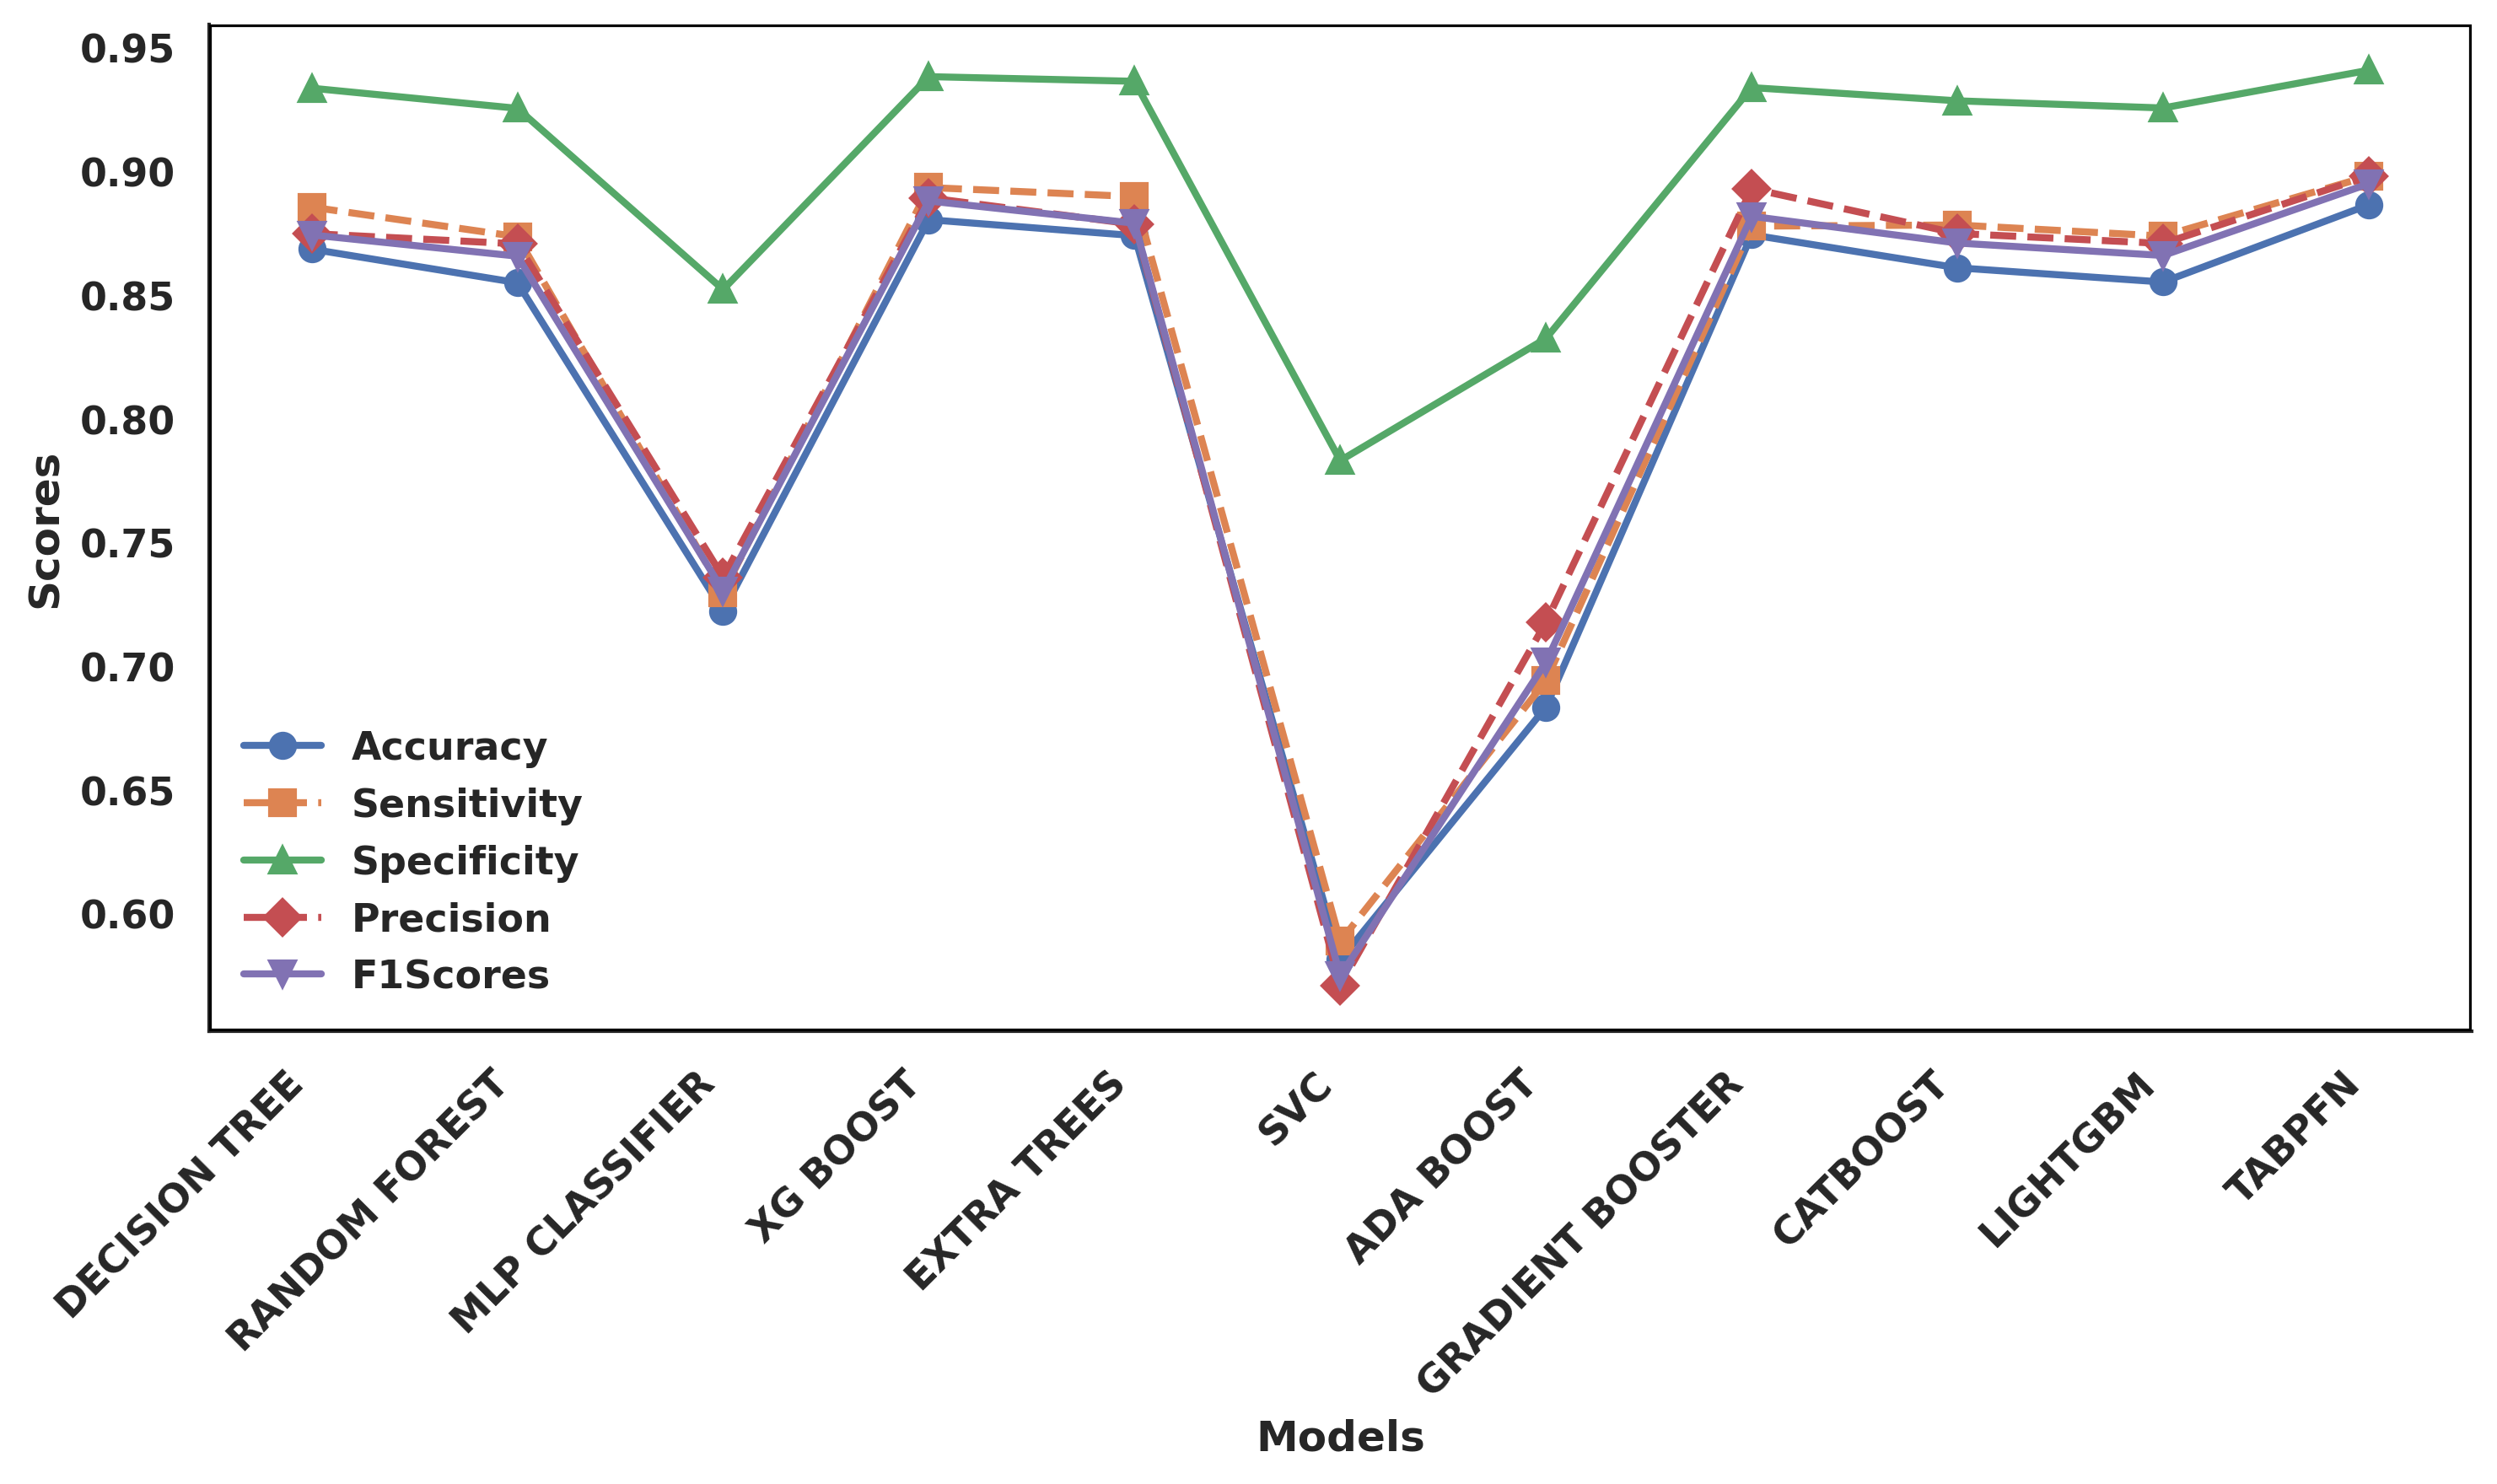

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

from sklearn.metrics import f1_score

sns.set_theme(style="white")
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 11,
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'axes.linewidth': 1.0
})

models = list(results.keys())

accuracy = [r['accuracy'][0] if isinstance(r['accuracy'], tuple) else r['accuracy'] for r in results.values()]
sensitivity = [r['sensitivity'][0] if isinstance(r['sensitivity'], tuple) else r['sensitivity'] for r in results.values()]
specificity = [r['specificity'][0] if isinstance(r['specificity'], tuple) else r['specificity'] for r in results.values()]
precision = [r['precision'][0] if isinstance(r['precision'], tuple) else r['precision'] for r in results.values()]
f1_scores_list = [r['f1'][0] if isinstance(r['f1'], tuple) else r['f1'] for r in results.values()]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(models, accuracy, label='Accuracy', marker='o', markersize=7, linewidth=2)
ax.plot(models, sensitivity, linestyle='--', label='Sensitivity', marker='s', markersize=7, linewidth=2)
ax.plot(models, specificity, label='Specificity', marker='^', markersize=7, linewidth=2)
ax.plot(models, precision, linestyle='--', label='Precision', marker='D', markersize=7, linewidth=2)
ax.plot(models, f1_scores_list, label='F1Scores', marker='v', markersize=7, linewidth=2)

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Scores', fontsize=12, fontweight='bold')

ax.set_xticklabels(models, rotation=45, ha="right", fontsize=11, fontweight='bold')
ax.tick_params(axis='y', labelsize=11, width=1.0)
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

ax.legend(frameon=False, prop={'weight': 'bold'})
sns.despine(ax=ax)

x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
rect = patches.Rectangle(
    (x0, y0),
    x1 - x0,
    y1 - y0,
    fill=False,
    color='black',
    linewidth=1.5,
    transform=ax.transData,
    zorder=10
)
ax.add_patch(rect)

plt.tight_layout()
plt.show()


ROC Curve

In [ ]:
print(np.unique(y_test))

[0 1 2]


Processing DECISION TREE...
Processing RANDOM FOREST...
Processing MLP CLASSIFIER...
Processing XG BOOST...
Processing EXTRA TREES...
Processing SVC...
Processing ADA BOOST...
Processing GRADIENT BOOSTER...
Processing CATBOOST...
Processing LIGHTGBM...
Processing TABPFN...


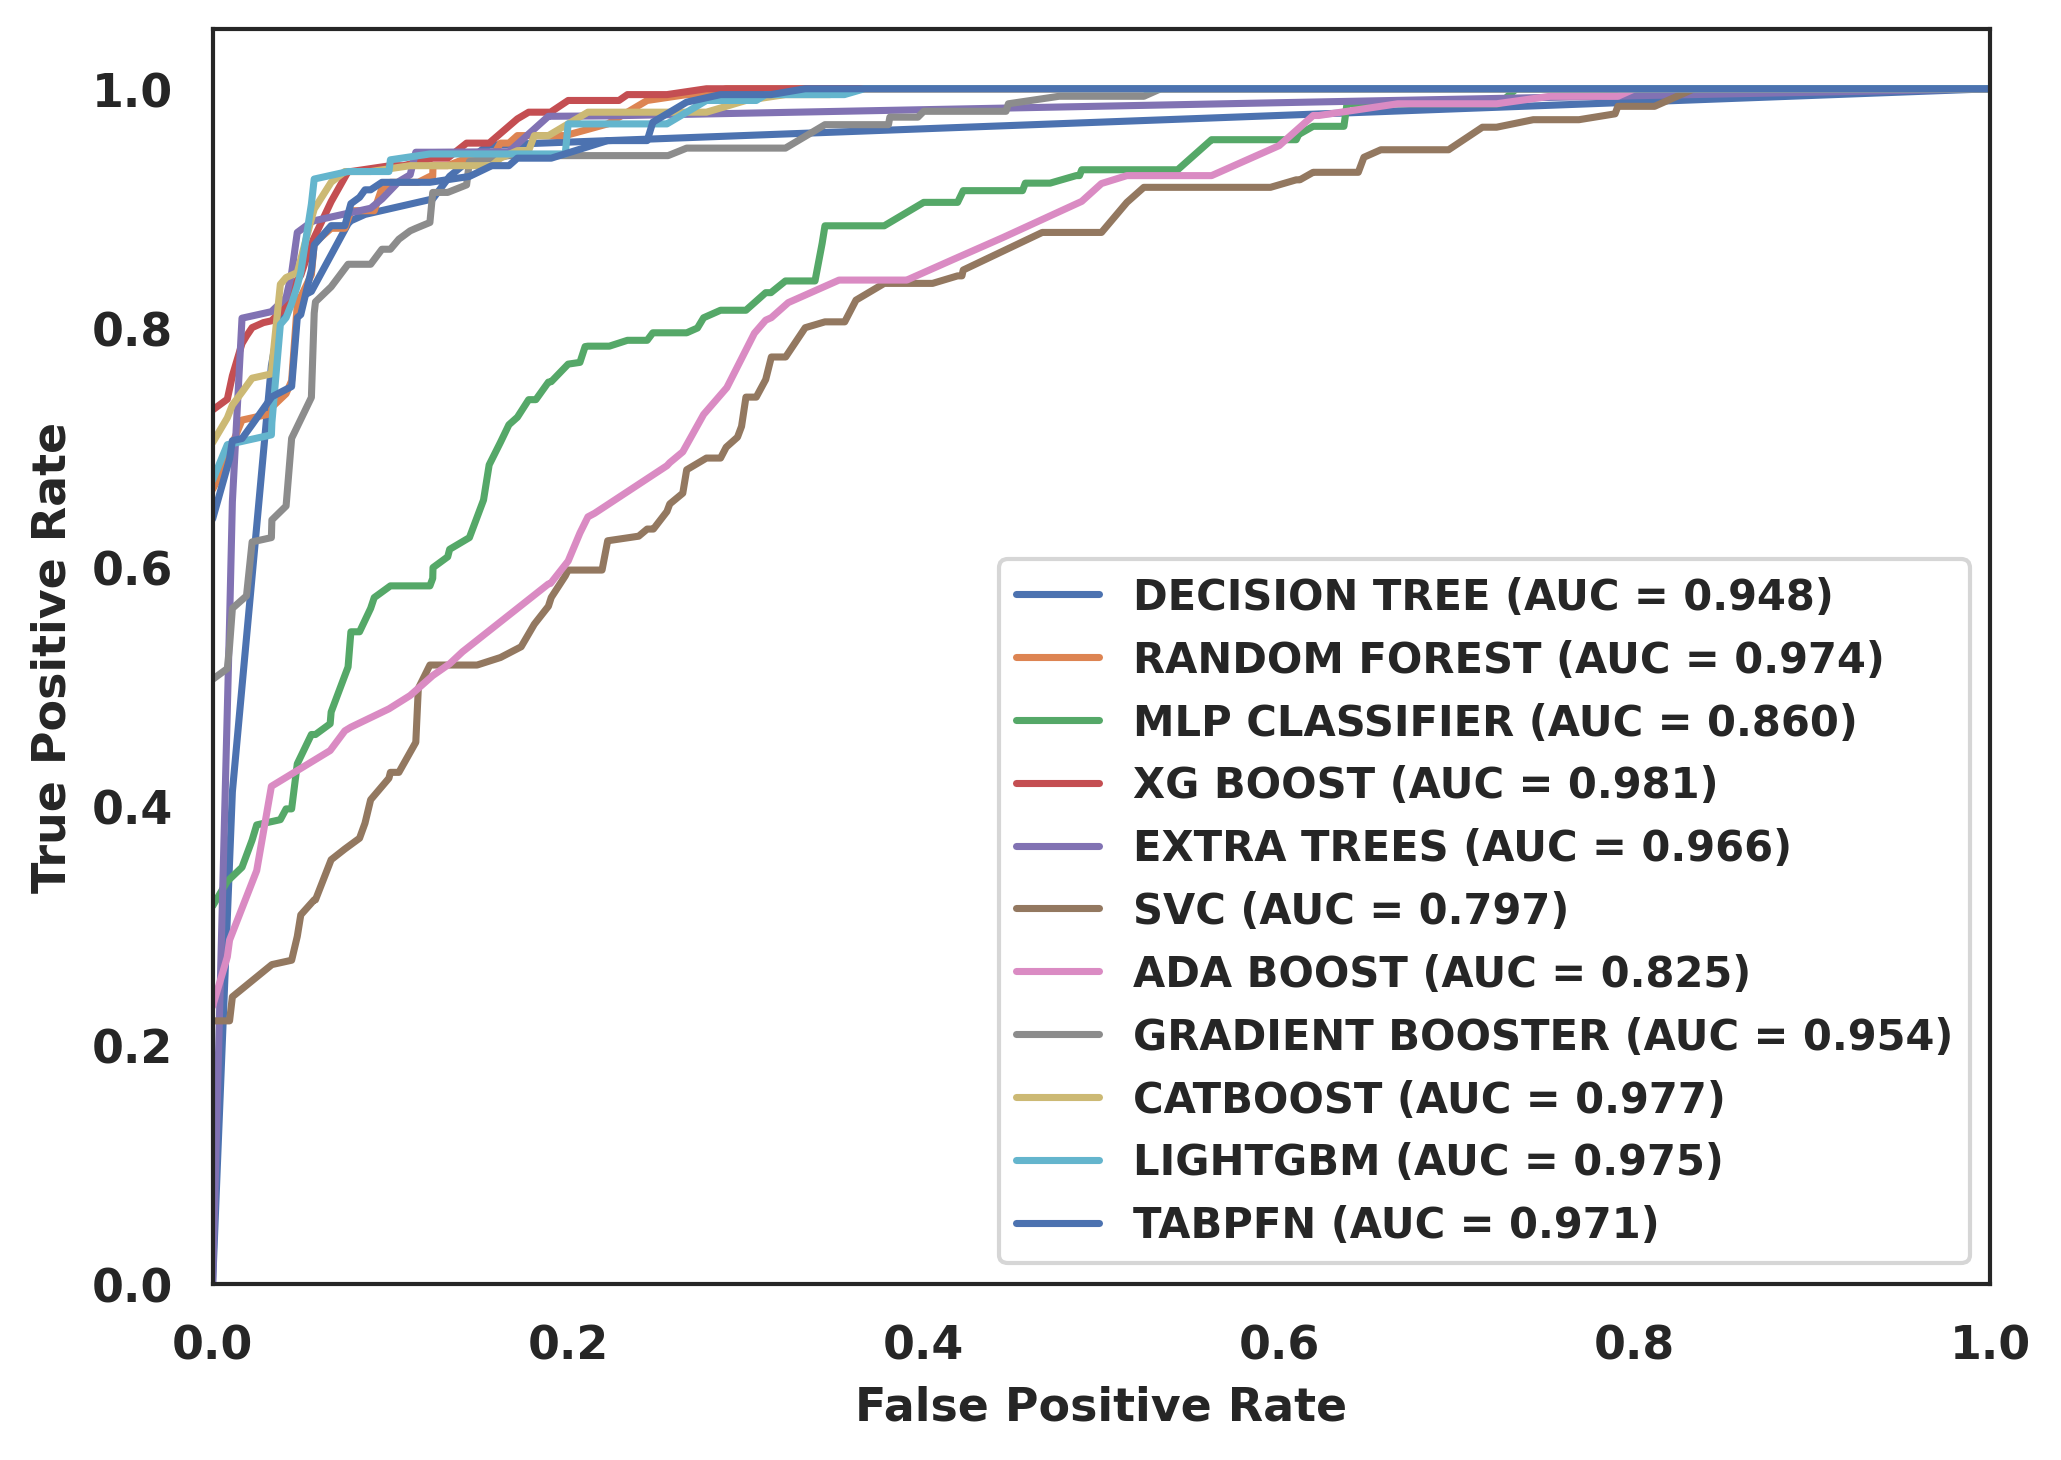

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from tabpfn import TabPFNClassifier

plt.rcParams.update({
    'font.size': 11,
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'font.weight': 'bold',
    'axes.labelweight': 'bold'
})

models = {
    "DECISION TREE": DecisionTreeClassifier(class_weight=class_weights),
    "RANDOM FOREST": RandomForestClassifier(class_weight=class_weights),
    "MLP CLASSIFIER": MLPClassifier(),
    "XG BOOST": XGBClassifier(scale_pos_weight=pos_weight, eval_metric="logloss", use_label_encoder=False),
    "EXTRA TREES": ExtraTreesClassifier(class_weight=class_weights),
    "SVC": SVC(kernel="linear", gamma="auto", probability=True, class_weight=class_weights),
    "ADA BOOST": AdaBoostClassifier(),
    "GRADIENT BOOSTER": GradientBoostingClassifier(),
    "CATBOOST": CatBoostClassifier(verbose=False, class_weights=[class_weights[c] for c in sorted(class_weights.keys())]),
    "LIGHTGBM": LGBMClassifier(verbosity=-1, class_weight=class_weights),
    "TABPFN": TabPFNClassifier()
}

y_train_enc = np.array(y_train)
y_test_enc = np.array(y_test)

classes = [0, 1, 2]
y_test_bin = label_binarize(y_test_enc, classes=classes)
n_classes = len(classes)

plt.figure(figsize=(7, 5))

for name, model in models.items():
    try:
        print(f"Processing {name}...")
        model.fit(X_train, y_train_enc)
        if not hasattr(model, "predict_proba"):
            print(f"  Skipped {name}: no predict_proba()")
            continue

        y_prob = np.array(model.predict_proba(X_test))
        if y_prob.ndim != 2 or y_prob.shape[1] != n_classes:
            print(f"  Skipped {name}: wrong proba shape {y_prob.shape}")
            continue

        fpr, tpr, roc_auc = dict(), dict(), dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes
        macro_auc = auc(all_fpr, mean_tpr)

        plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {macro_auc:.3f})", linewidth=1.7)

    except Exception as e:
        print(f"  ERROR in {name}: {e}")

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate", fontsize=11, fontweight="bold")
plt.ylabel("True Positive Rate", fontsize=11, fontweight="bold")
plt.legend(loc="lower right", fontsize=10)
plt.grid(False)
plt.gca().set_facecolor("white")
plt.tight_layout()
plt.show()


## Hyper parameter tuning

To improve the predictive performance and generalization ability of each model by finding the optimal combination of hyperparameters using GridSearchCV with Stratified K-Fold cross-validation.

In [ ]:
# ---------------------------
# Custom metric
# ---------------------------
def calculate_macro_specificity(cm):
    num_classes = cm.shape[0]
    specificity = 0
    for i in range(num_classes):
        tn = 0
        fp = 0
        for j in range(num_classes):
            if i != j:
                tn += cm[j, j]
                fp += cm[j, i]
        if tn + fp != 0:
            specificity += tn / (tn + fp)
    specificity /= num_classes
    return specificity

# ---------------------------
# Models & Param grids
# ---------------------------
models = {
    "DECISION TREE": DecisionTreeClassifier(class_weight=class_weights),
    "RANDOM FOREST": RandomForestClassifier(class_weight=class_weights),
    "MLP CLASSIFIER": MLPClassifier(),  # will use sample_weight during training
    "XG BOOST": XGBClassifier(
        scale_pos_weight=pos_weight,
        eval_metric="logloss",
        use_label_encoder=False
    ),
    "EXTRA TREES": ExtraTreesClassifier(class_weight=class_weights),
    "SVC": SVC(kernel="linear", gamma="auto", probability=True, class_weight=class_weights),
    "ADA BOOST": AdaBoostClassifier(),  # sample_weight
    "GRADIENT BOOSTER": GradientBoostingClassifier(),  # sample_weight
    "CATBOOST": CatBoostClassifier(
        verbose=False,
        class_weights=[class_weights[c] for c in sorted(class_weights.keys())]
    ),
    "LIGHTGBM": LGBMClassifier(
        verbosity=-1,
        class_weight=class_weights
    ),
    "TABPFN": TabPFNClassifier()  # handled separately
}

param_grids = {
    'TABPFN': {
        'random_state': [42]
    },
    'DECISION TREE': {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [3, 5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RANDOM FOREST': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 20, None],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True]
    },
    'MLP CLASSIFIER': {
        'hidden_layer_sizes': [(32,), (64,), (128,)],
        'activation': ['relu'],
        'solver': ['adam'],
        'alpha': [0.01, 0.1],
        'learning_rate': ['adaptive']
    },
    'XG BOOST': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 10],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 1.0],
        'gamma': [0, 1, 2],
        'reg_alpha': [0, 0.5],
        'reg_lambda': [0.1, 5]
    },
    'EXTRA TREES CLASSIFIER': {
          'n_estimators': [100, 200, 300],
          'max_depth': [5, 15, None],
          'min_samples_split': [2, 10],
          'min_samples_leaf': [1,  4],
          'max_features': ['sqrt', 'log2', None],
          'bootstrap': [False]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly'],
        'gamma': ['scale']
    },
    'ADA BOOST': {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5, 1.0]
    },
    'GRADIENT BOOSTER': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.001, 0.01],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    },
    'CATBOOST': {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1],
        'depth': [4, 7, 10],
        'l2_leaf_reg': [1, 3, 5],
        'border_count': [32, 64, 128]
    },
    'LIGHTGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [-1, 5],
        'num_leaves': [15, 23],
        'boosting_type': ['gbdt'],
        'min_child_samples': [5, 10]
    }

}

# ---------------------------
# RandomizedSearchCV
# ---------------------------
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
tuned_models = {}

for name, model in models.items():
    print(f"\nTuning {name}...")
    if name in param_grids:
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[name],
            n_iter=10 if name != 'TABPFN' else 8,
            scoring='accuracy',
            cv=cv,
            n_jobs=-1,
            verbose=2,
            random_state=42
        )
        y_input = y_train.values if name == 'TABPFN' else y_train
        search.fit(X_train, y_input)
        tuned_models[name] = search.best_estimator_
        print(f"Best params for {name}: {search.best_params_}")
    else:
        tuned_models[name] = model

# ---------------------------
# Evaluate models
# ---------------------------
tuned_results = {}

# Re-import f1_score to ensure it's the function, not the list
from sklearn.metrics import f1_score

for name, model in tuned_models.items():
    model.fit(X_train, y_train.values if name=='TABPFN' else y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = report['macro avg']['recall']
    specificity = calculate_macro_specificity(cm)

    tuned_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'f1_score': f1,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'confusion_matrix': cm
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")



Tuning DECISION TREE...
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best params for DECISION TREE: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'log_loss'}

Tuning RANDOM FOREST...
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best params for RANDOM FOREST: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'bootstrap': True}

Tuning MLP CLASSIFIER...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best params for MLP CLASSIFIER: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (128,), 'alpha': 0.1, 'activation': 'relu'}

Tuning XG BOOST...
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best params for XG BOOST: {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}

Tuning EXTRA TREES...

Tuning SVC...
Fitting 10 f


=== TABPFN — Classification report ===
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        68
           1       0.86      0.91      0.88        53
           2       0.88      0.95      0.91        37

    accuracy                           0.88       158
   macro avg       0.88      0.89      0.88       158
weighted avg       0.88      0.88      0.88       158

Accuracy: 0.8797
Precision (macro): 0.8785
Sensitivity/Recall (macro): 0.8917
F1 (macro): 0.8838
Specificity (custom macro): 0.9353
Saved figure: tabpfn_results/TABPFN_confusion_matrix_pub.png
Saved figure: tabpfn_results/TABPFN_confusion_matrix_pub.pdf


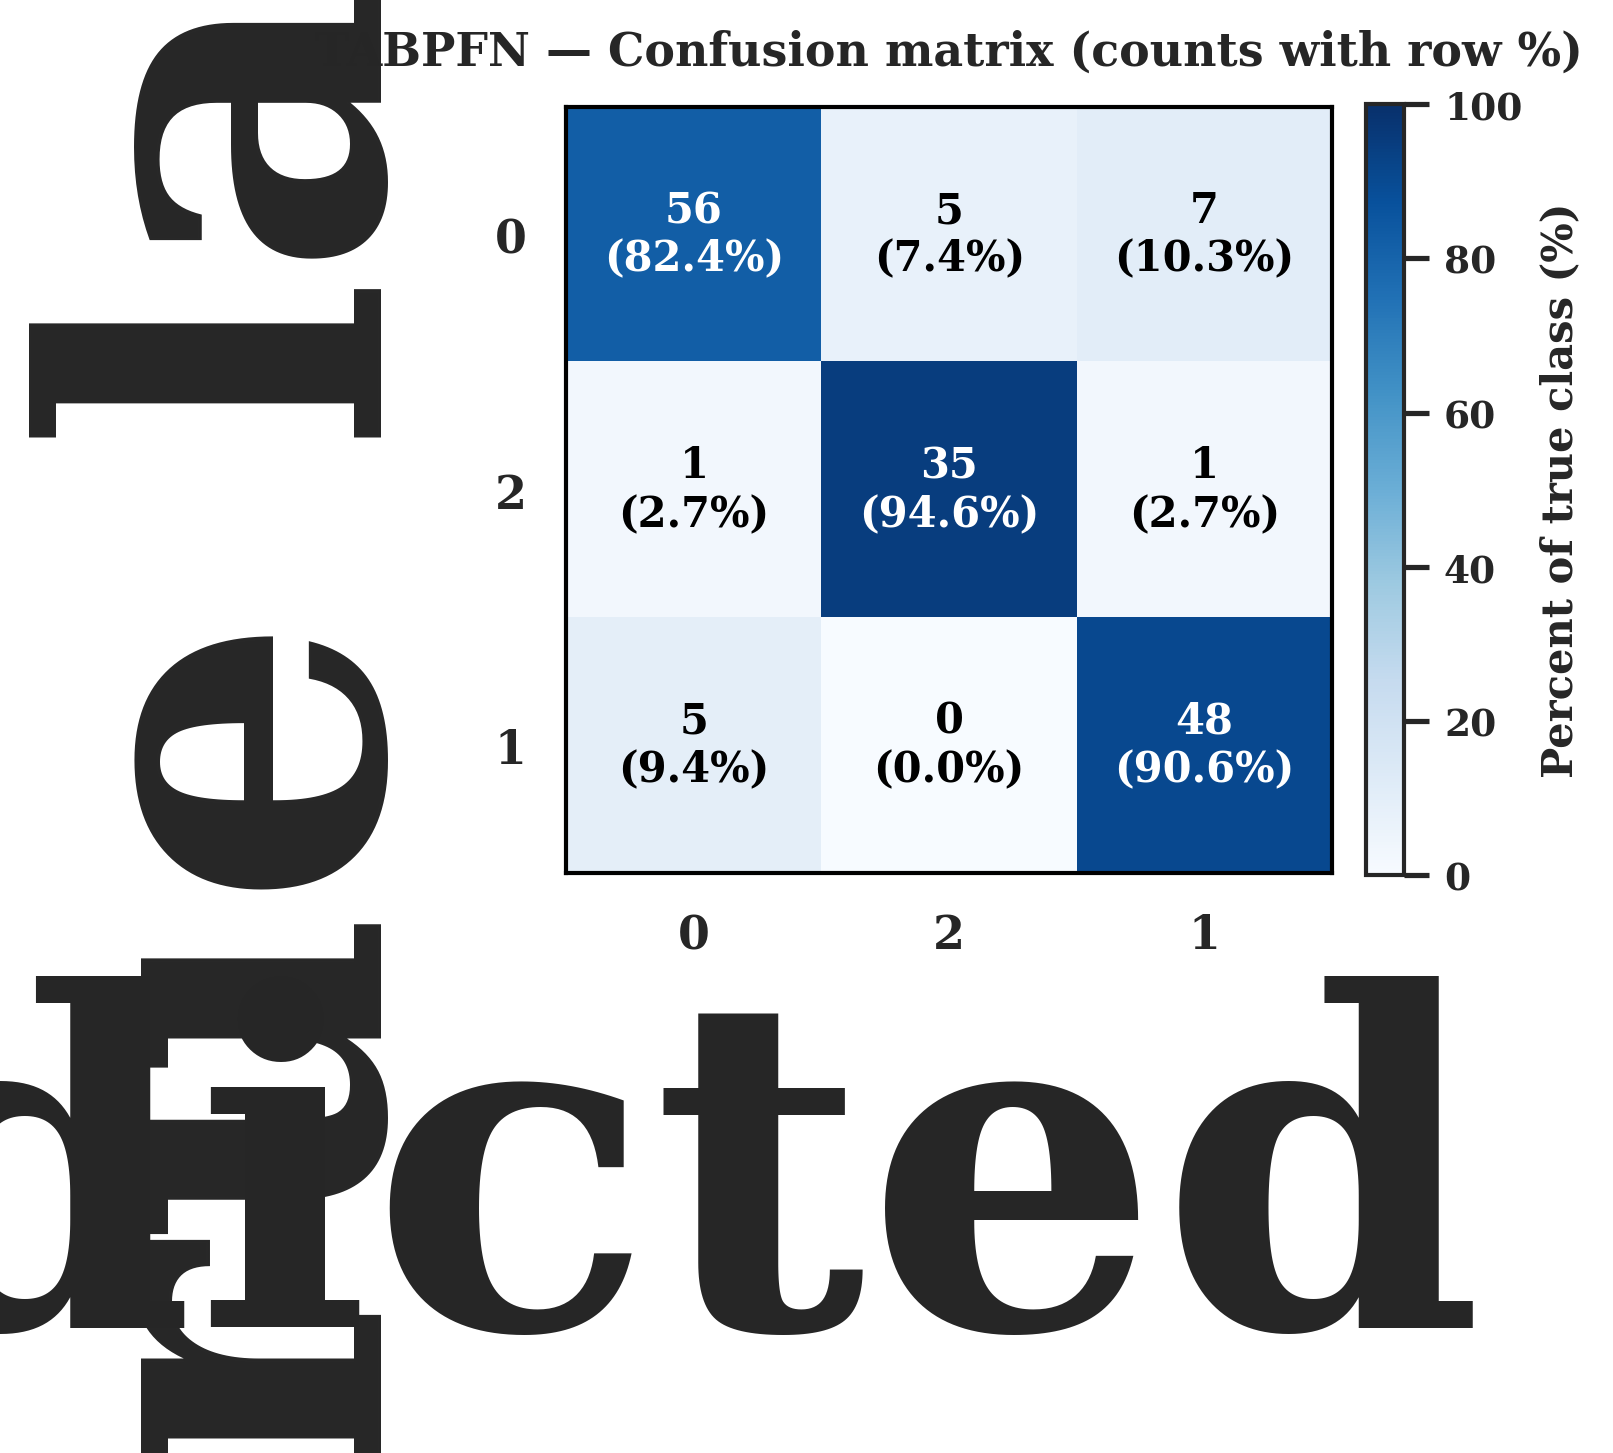

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.validation import check_is_fitted

def plot_tabpfn_pub(
    tuned_models,
    models,
    X_train,
    y_train,
    X_test,
    y_test,
    model_name="TABPFN",
    out_dir="results",
    fig_size=(5.5, 5.5),
    dpi=600
):
    os.makedirs(out_dir, exist_ok=True)

    model = tuned_models.get(model_name, models.get(model_name))
    if model is None:
        raise ValueError(f"Model '{model_name}' not found in tuned_models or models.")

    y_train_for_tabpfn = y_train.values if model_name.upper() == 'TABPFN' else np.asarray(y_train)
    y_test_arr = np.asarray(y_test)

    need_fit = False
    try:
        check_is_fitted(model)
    except Exception:
        try:
            _ = model.predict(X_train[:1])
        except Exception:
            need_fit = True

    if need_fit:
        print(f"Fitting {model_name}...")
        model.fit(X_train, y_train_for_tabpfn)
    else:
        try:
            _ = model.predict(X_train[:1])
        except Exception:
            print(f"Existing fitted model predict failed — re-fitting {model_name}.")
            model.fit(X_train, y_train_for_tabpfn)

    y_pred = np.asarray(model.predict(X_test))

    _, idx = np.unique(y_test_arr, return_index=True)
    label_order = np.array(y_test_arr)[np.sort(idx)]
    for lbl in np.unique(y_pred):
        if lbl not in label_order:
            label_order = np.append(label_order, lbl)

    cm = confusion_matrix(y_test_arr, y_pred, labels=label_order)
    row_sums = cm.sum(axis=1, keepdims=True)
    cm_pct = np.divide(cm, row_sums, where=(row_sums != 0)) * 100.0
    cm_pct = np.nan_to_num(cm_pct)

    annotations = np.empty(cm.shape, dtype=object)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annotations[i, j] = f"{cm[i, j]}\n({cm_pct[i, j]:.1f}%)"

    accuracy = accuracy_score(y_test_arr, y_pred)
    precision = precision_score(y_test_arr, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test_arr, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test_arr, y_pred, average='macro', zero_division=0)
    report_str = classification_report(y_test_arr, y_pred, zero_division=0)
    try:
        specificity = calculate_macro_specificity(cm)
    except Exception:
        specificity = None

    print(f"\n=== {model_name} — Classification report ===")
    print(report_str)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Sensitivity/Recall (macro): {recall:.4f}")
    print(f"F1 (macro): {f1:.4f}")
    if specificity is not None:
        print(f"Specificity (custom macro): {specificity:.4f}")

    sns.set_style("white")
    plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times New Roman", "DejaVu Serif", "serif"],
        "font.size": 11,
    })

    fig, ax = plt.subplots(figsize=fig_size)
    cmap = sns.color_palette("Blues", as_cmap=True)
    im = ax.imshow(cm_pct, interpolation='nearest', cmap=cmap, vmin=0.0, vmax=100.0, aspect='equal')

    ax.set_xticks(np.arange(len(label_order)))
    ax.set_yticks(np.arange(len(label_order)))
    ax.set_xticklabels(label_order, fontsize=11, fontweight='bold')
    ax.set_yticklabels(label_order, fontsize=11, fontweight='bold')
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.0)
        spine.set_color("black")

    threshold = 50.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            txt_color = "white" if cm_pct[i, j] >= threshold else "black"
            ax.text(j, i, annotations[i, j], ha="center", va="center", fontsize=10, fontweight='bold', color=txt_color)

    ax.set_xlabel("Predicted label", fontweight='bold')
    ax.set_ylabel("True label", fontweight='bold')
    ax.set_title(f"{model_name} — Confusion matrix (counts with row %)", fontweight='bold', pad=10)

    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Percent of true class (%)", fontweight='bold', fontsize=10)
    cbar.ax.tick_params(labelsize=9)

    plt.tight_layout()
    png_path = os.path.join(out_dir, f"{model_name}_confusion_matrix_pub.png")
    pdf_path = os.path.join(out_dir, f"{model_name}_confusion_matrix_pub.pdf")
    fig.savefig(png_path, dpi=dpi, bbox_inches='tight')
    fig.savefig(pdf_path, bbox_inches='tight')
    print(f"Saved figure: {png_path}")
    print(f"Saved figure: {pdf_path}")
    plt.show()

    return {
        "model": model,
        "y_test": y_test_arr,
        "y_pred": y_pred,
        "label_order": label_order,
        "confusion_matrix_counts": cm,
        "confusion_matrix_pct": cm_pct,
        "png_path": png_path,
        "pdf_path": pdf_path,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "specificity": specificity
    }

outputs = plot_tabpfn_pub(
    tuned_models=tuned_models,
    models=models,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    model_name="TABPFN",
    out_dir="tabpfn_results",
    fig_size=(5.5, 5.5),
    dpi=600
)


##Ensemble Models

Stacked ensemble

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from lightgbm import LGBMClassifier

base_estimators = [
    ('decision_tree', tuned_models['DECISION TREE']),
    ('random_forest', tuned_models['RANDOM FOREST']),
    ('mlp', tuned_models['MLP CLASSIFIER']),
    ('xgboost', tuned_models['XG BOOST']),
    ('extra_trees', tuned_models['EXTRA TREES']),
    ('svc', tuned_models['SVC']),
    ('ada_boost', tuned_models['ADA BOOST']),
    ('gradient_boost', tuned_models['GRADIENT BOOSTER']),
    ('catboost', tuned_models['CATBOOST']),
    ('lightgbm', tuned_models['LIGHTGBM']),
    ('tabpfn', tuned_models['TABPFN'])
]

meta_learner = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=10,
    num_leaves=64,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1.0,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

stacked_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_learner,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    passthrough=True,
    verbose=2
)

stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)
y_proba = stacked_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

cm = confusion_matrix(y_test, y_pred)
num_classes = cm.shape[0]

sensitivity_list = []
specificity_list = []

for i in range(num_classes):
    tp = cm[i, i]
    fn = cm[i, :].sum() - tp
    fp = cm[:, i].sum() - tp
    tn = cm.sum() - (tp + fp + fn)
    sensitivity_list.append(tp / (tp + fn) if (tp + fn) != 0 else 0)
    specificity_list.append(tn / (tn + fp) if (tn + fp) != 0 else 0)

macro_sensitivity = np.mean(sensitivity_list)
macro_specificity = np.mean(specificity_list)

classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
macro_auc = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
micro_auc = roc_auc_score(y_test_bin, y_proba, average='micro', multi_class='ovr')

def compute_metrics(y_true, y_pred, y_proba, classes):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)
    num_classes = cm.shape[0]
    sens_list = []
    spec_list = []
    for i in range(num_classes):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        tn = cm.sum() - (tp + fp + fn)
        sens_list.append(tp / (tp + fn) if (tp + fn) != 0 else 0)
        spec_list.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
    macro_sens = np.mean(sens_list)
    macro_spec = np.mean(spec_list)
    y_true_bin = label_binarize(y_true, classes=classes)
    macro_auc = roc_auc_score(y_true_bin, y_proba, average='macro', multi_class='ovr')
    micro_auc = roc_auc_score(y_true_bin, y_proba, average='micro', multi_class='ovr')
    return acc, f1, macro_sens, macro_spec, macro_auc, micro_auc

def mean_ci(values, alpha=0.95):
    lower = np.percentile(values, (1 - alpha) / 2 * 100)
    upper = np.percentile(values, (1 + alpha) / 2 * 100)
    return np.mean(values), lower, upper

n_bootstraps = 1000
rng = np.random.RandomState(42)
boot_metrics = {
    "Accuracy": [],
    "Macro F1": [],
    "Macro Sensitivity": [],
    "Macro Specificity": [],
    "Macro AUC": [],
    "Micro AUC": []
}

for _ in range(n_bootstraps):
    idx = rng.choice(len(y_test), size=len(y_test), replace=True)
    y_true_bs = y_test.iloc[idx].values
    y_pred_bs = y_pred[idx]
    y_proba_bs = y_proba[idx]
    acc, f1_bs, sens, spec, macro_auc_bs, micro_auc_bs = compute_metrics(y_true_bs, y_pred_bs, y_proba_bs, classes)
    boot_metrics["Accuracy"].append(acc)
    boot_metrics["Macro F1"].append(f1_bs)
    boot_metrics["Macro Sensitivity"].append(sens)
    boot_metrics["Macro Specificity"].append(spec)
    boot_metrics["Macro AUC"].append(macro_auc_bs)
    boot_metrics["Micro AUC"].append(micro_auc_bs)

print("\n===== Stacked Ensemble Performance (Bootstrap 95% CI) =====")
for metric, values in boot_metrics.items():
    mean, low, high = mean_ci(values)
    print(f"{metric:<20}: {mean:.4f} (95% CI: {low:.4f} – {high:.4f})")

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



===== Stacked Ensemble Performance (Bootstrap 95% CI) =====
Accuracy            : 0.8804 (95% CI: 0.8291 – 0.9241)
Macro F1            : 0.8879 (95% CI: 0.8386 – 0.9322)
Macro Sensitivity   : 0.8932 (95% CI: 0.8447 – 0.9349)
Macro Specificity   : 0.9382 (95% CI: 0.9112 – 0.9620)
Macro AUC           : 0.9700 (95% CI: 0.9421 – 0.9889)
Micro AUC           : 0.9740 (95% CI: 0.9525 – 0.9892)

Confusion Matrix:
 [[55 11  2]
 [ 4 49  0]
 [ 1  1 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86        68
           1       0.80      0.92      0.86        53
           2       0.95      0.95      0.95        37

    accuracy                           0.88       158
   macro avg       0.89      0.89      0.89       158
weighted avg       0.89      0.88      0.88       158



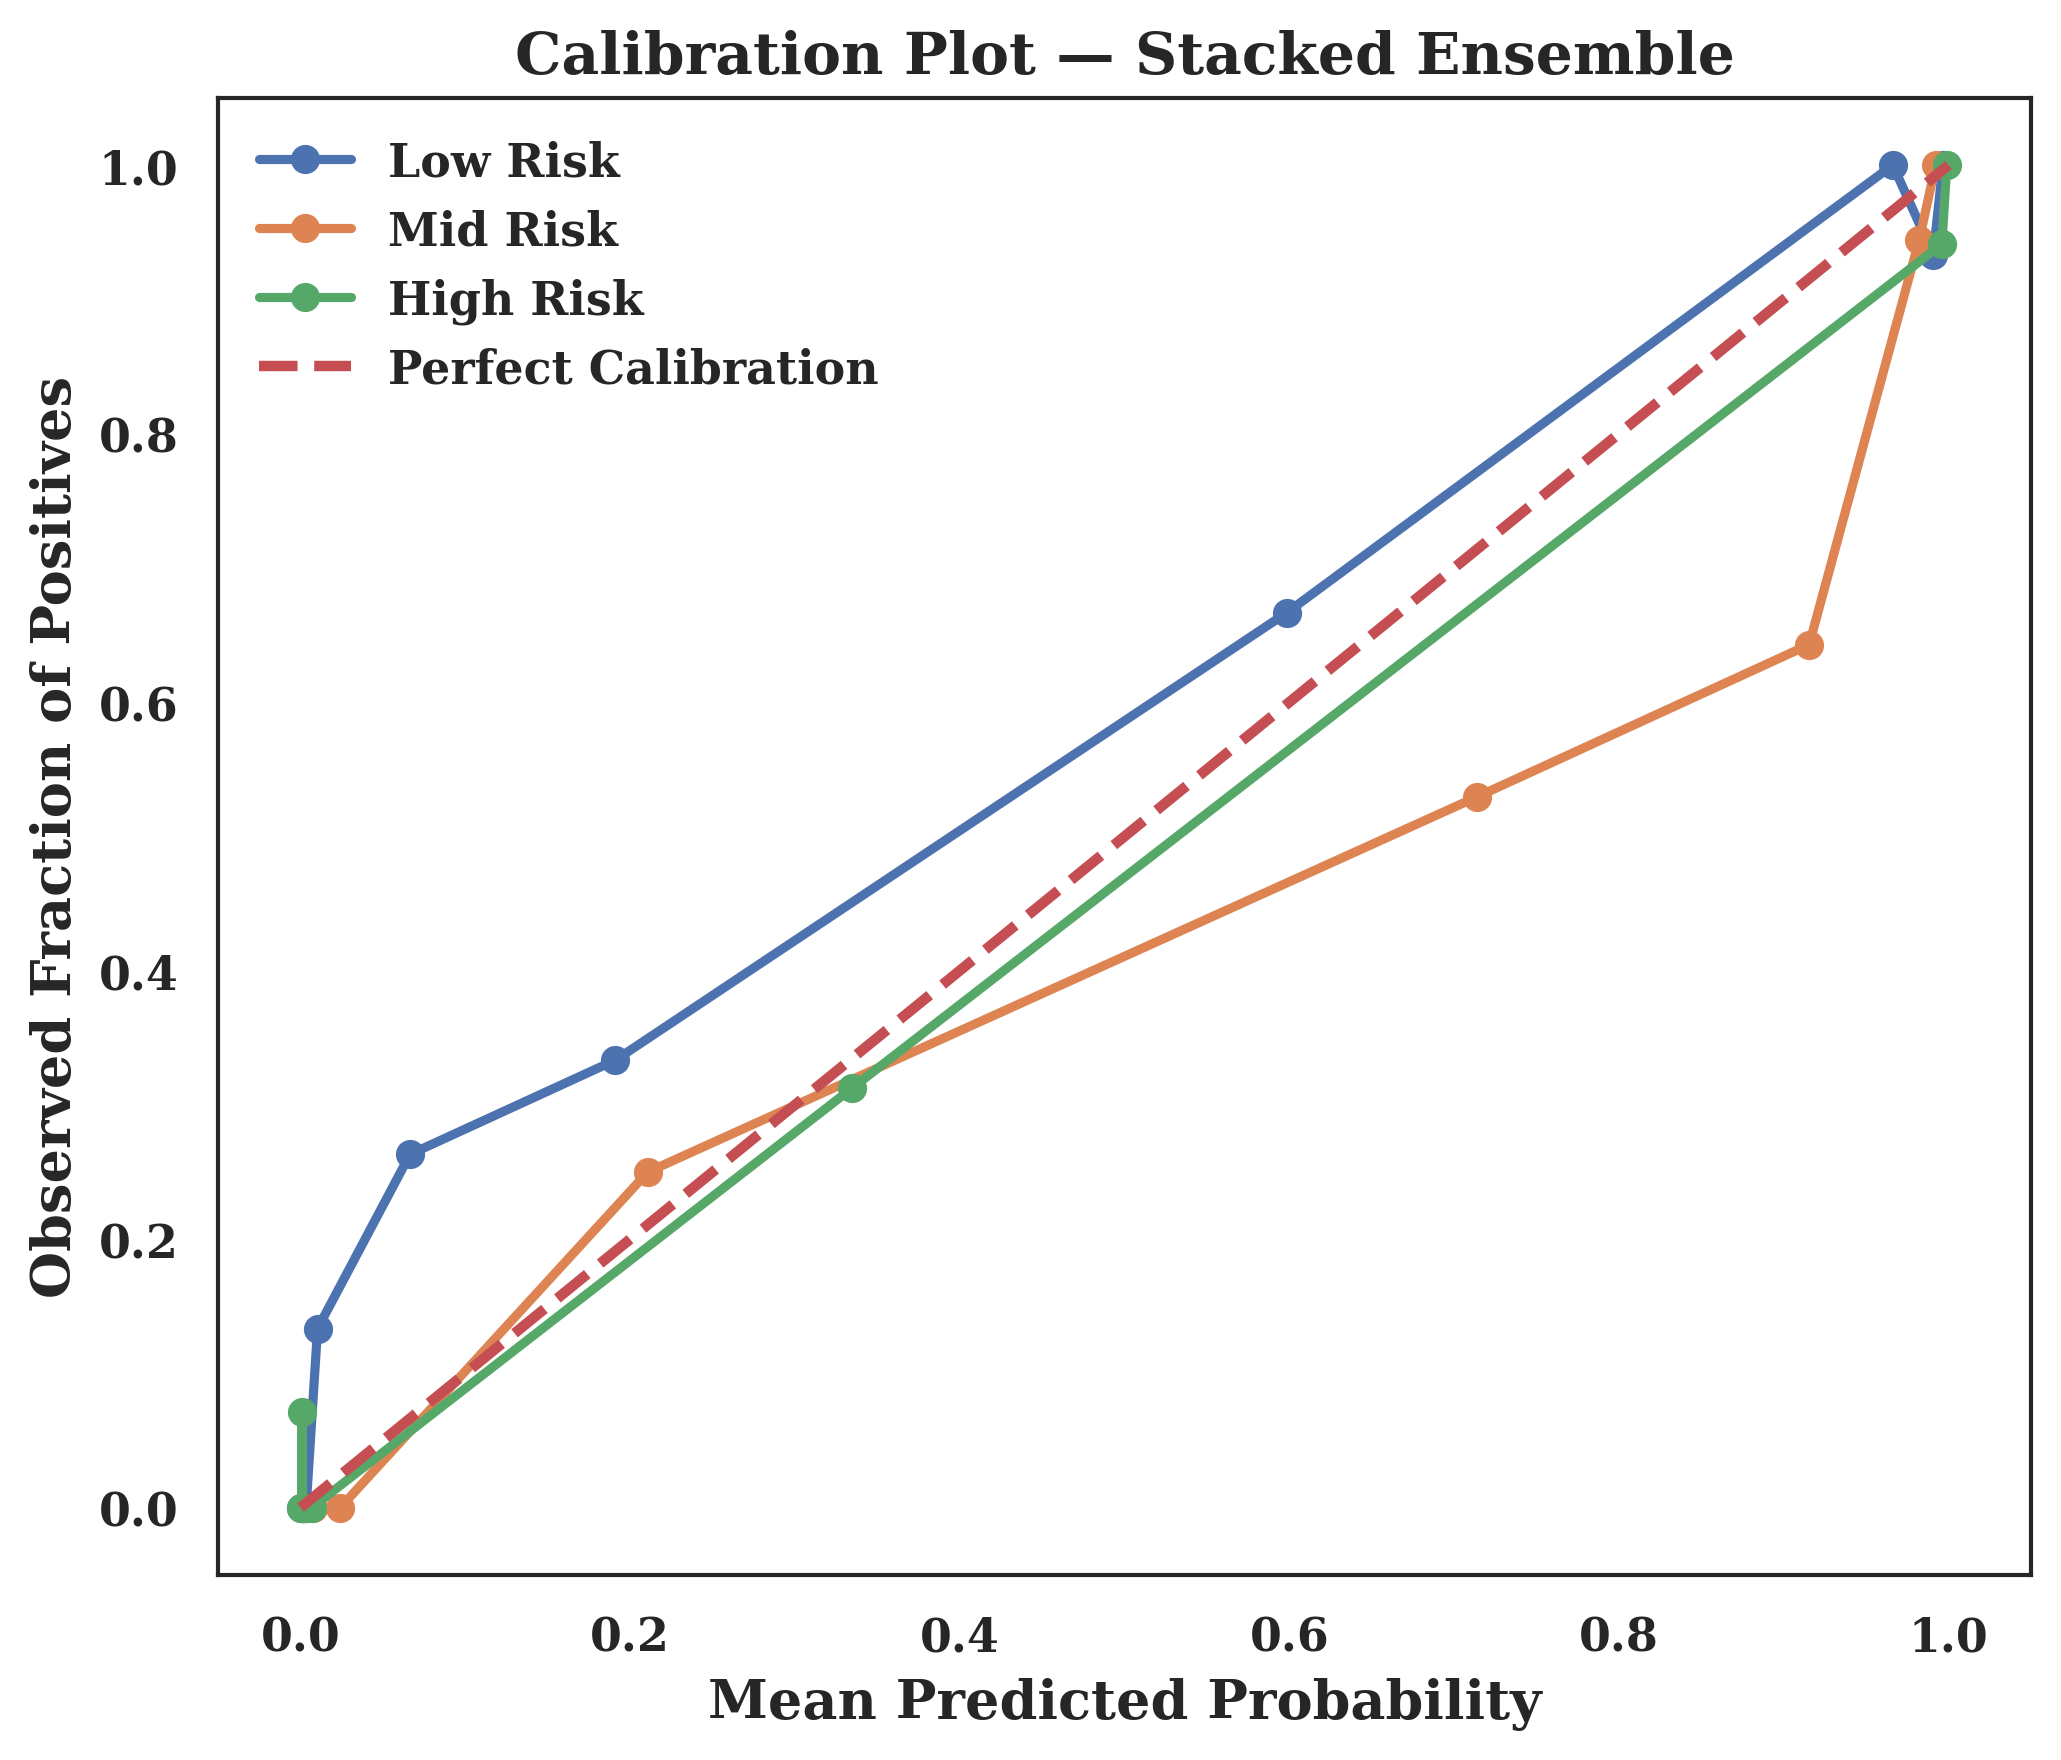

In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

risk_names = {0: "Low Risk", 1: "Mid Risk", 2: "High Risk"}

plt.figure(figsize=(7, 6))

for i, cls in enumerate(classes):
    frac_pos, mean_pred = calibration_curve(
        y_test_bin[:, i],
        y_proba[:, i],
        n_bins=10,
        strategy="quantile"
    )
    plt.plot(mean_pred, frac_pos, marker="o", linewidth=2.2, label=risk_names[cls])

plt.plot([0, 1], [0, 1], linestyle="--", linewidth=2.5, label="Perfect Calibration")

plt.xlabel("Mean Predicted Probability", fontsize=13, fontweight="bold")
plt.ylabel("Observed Fraction of Positives", fontsize=13, fontweight="bold")
plt.title("Calibration Plot — Stacked Ensemble", fontsize=14, fontweight="bold")
plt.legend(prop={"weight": "bold", "size": 11}, frameon=False)
plt.xticks(fontsize=11, fontweight="bold")
plt.yticks(fontsize=11, fontweight="bold")
plt.gca().set_facecolor("white")
plt.grid(False)
plt.tight_layout()
plt.show()


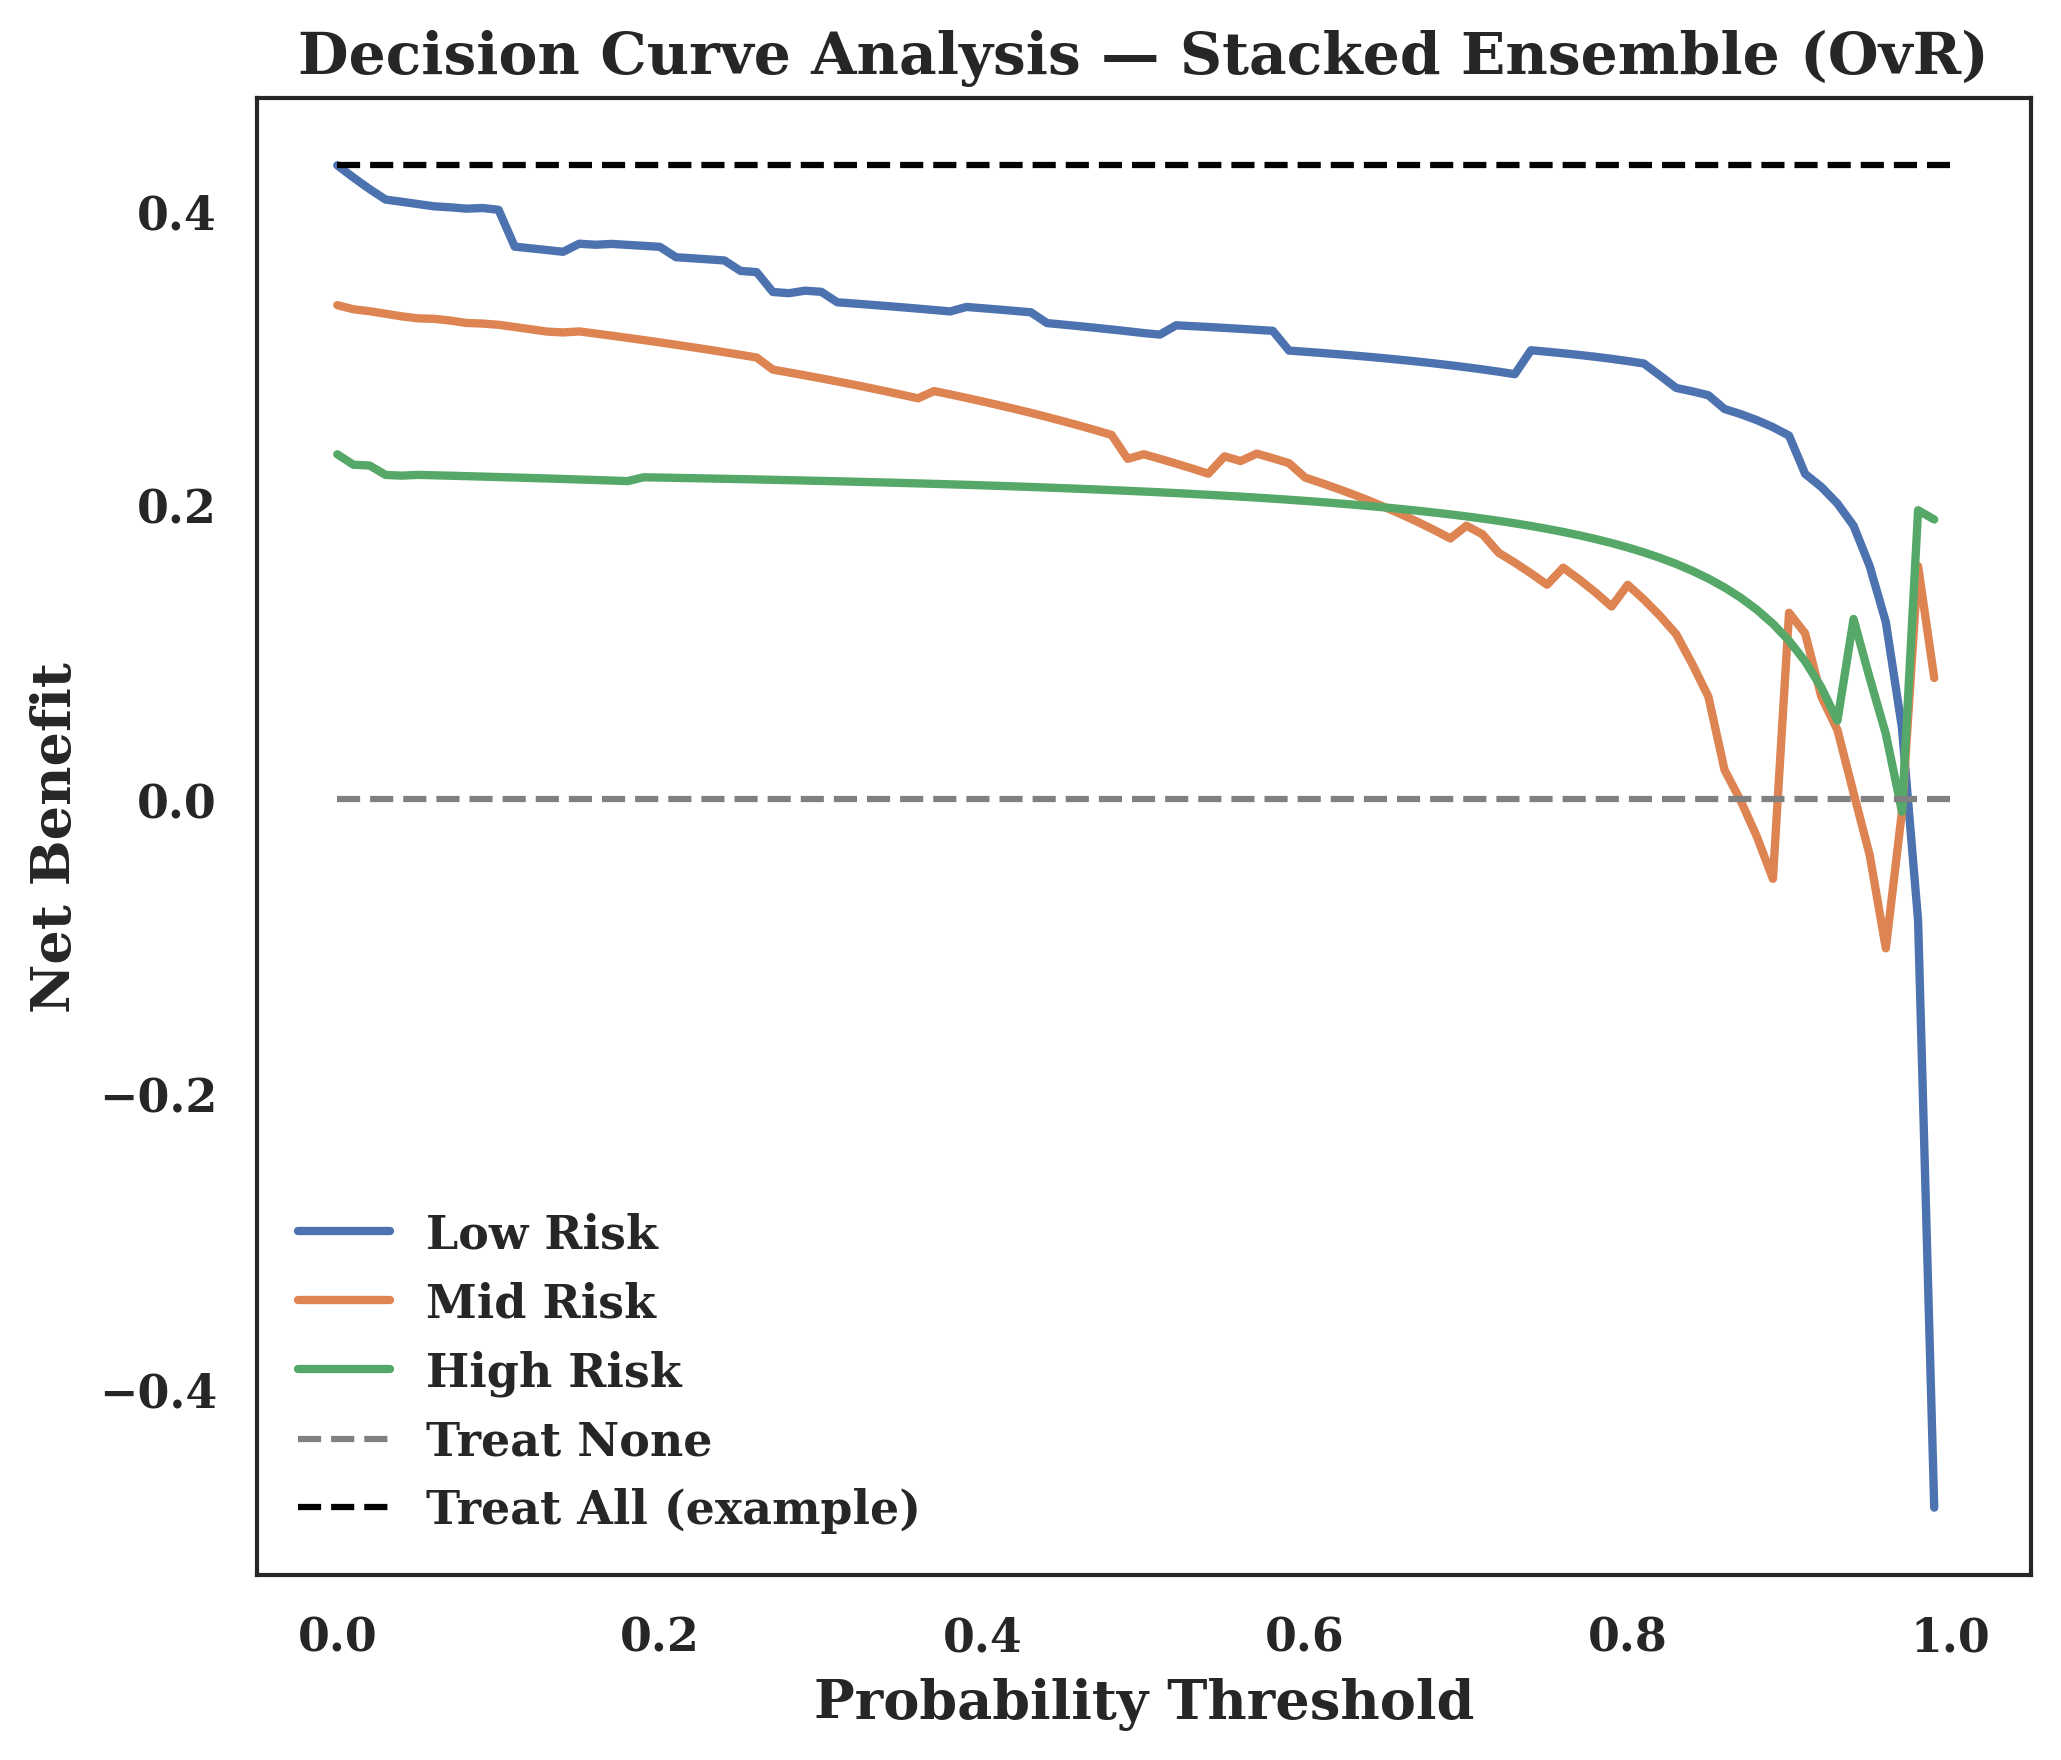

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

def decision_curve(y_true_bin, y_prob, class_name, thresholds=np.linspace(0, 1, 101)):
    N = len(y_true_bin)
    net_benefit = []

    for t in thresholds:
        pred_pos = (y_prob >= t).astype(int)
        TP = np.sum(pred_pos * y_true_bin)
        FP = np.sum(pred_pos * (1 - y_true_bin))
        nb = (TP / N) - (FP / N) * (t / (1 - t))
        net_benefit.append(nb)

    return thresholds, np.array(net_benefit)

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
risk_names = {0: "Low Risk", 1: "Mid Risk", 2: "High Risk"}

plt.figure(figsize=(7, 6))

for i, cls in enumerate(classes):
    thresh, nb = decision_curve(y_test_bin[:, i], y_proba[:, i], risk_names[cls])
    plt.plot(thresh, nb, linewidth=2, label=risk_names[cls])

plt.plot([0, 1], [0, 0], linestyle="--", color="gray", label="Treat None")
plt.plot([0, 1], [np.mean(y_test_bin[:, 0])]*2, linestyle="--", color="black", label="Treat All (example)")

plt.xlabel("Probability Threshold", fontsize=13, fontweight="bold")
plt.ylabel("Net Benefit", fontsize=13, fontweight="bold")
plt.title("Decision Curve Analysis — Stacked Ensemble (OvR)", fontsize=14, fontweight="bold")
plt.legend(prop={"weight": "bold", "size": 11}, frameon=False)
plt.xticks(fontsize=11, fontweight="bold")
plt.yticks(fontsize=11, fontweight="bold")
plt.gca().set_facecolor("white")
plt.grid(False)
plt.tight_layout()
plt.show()


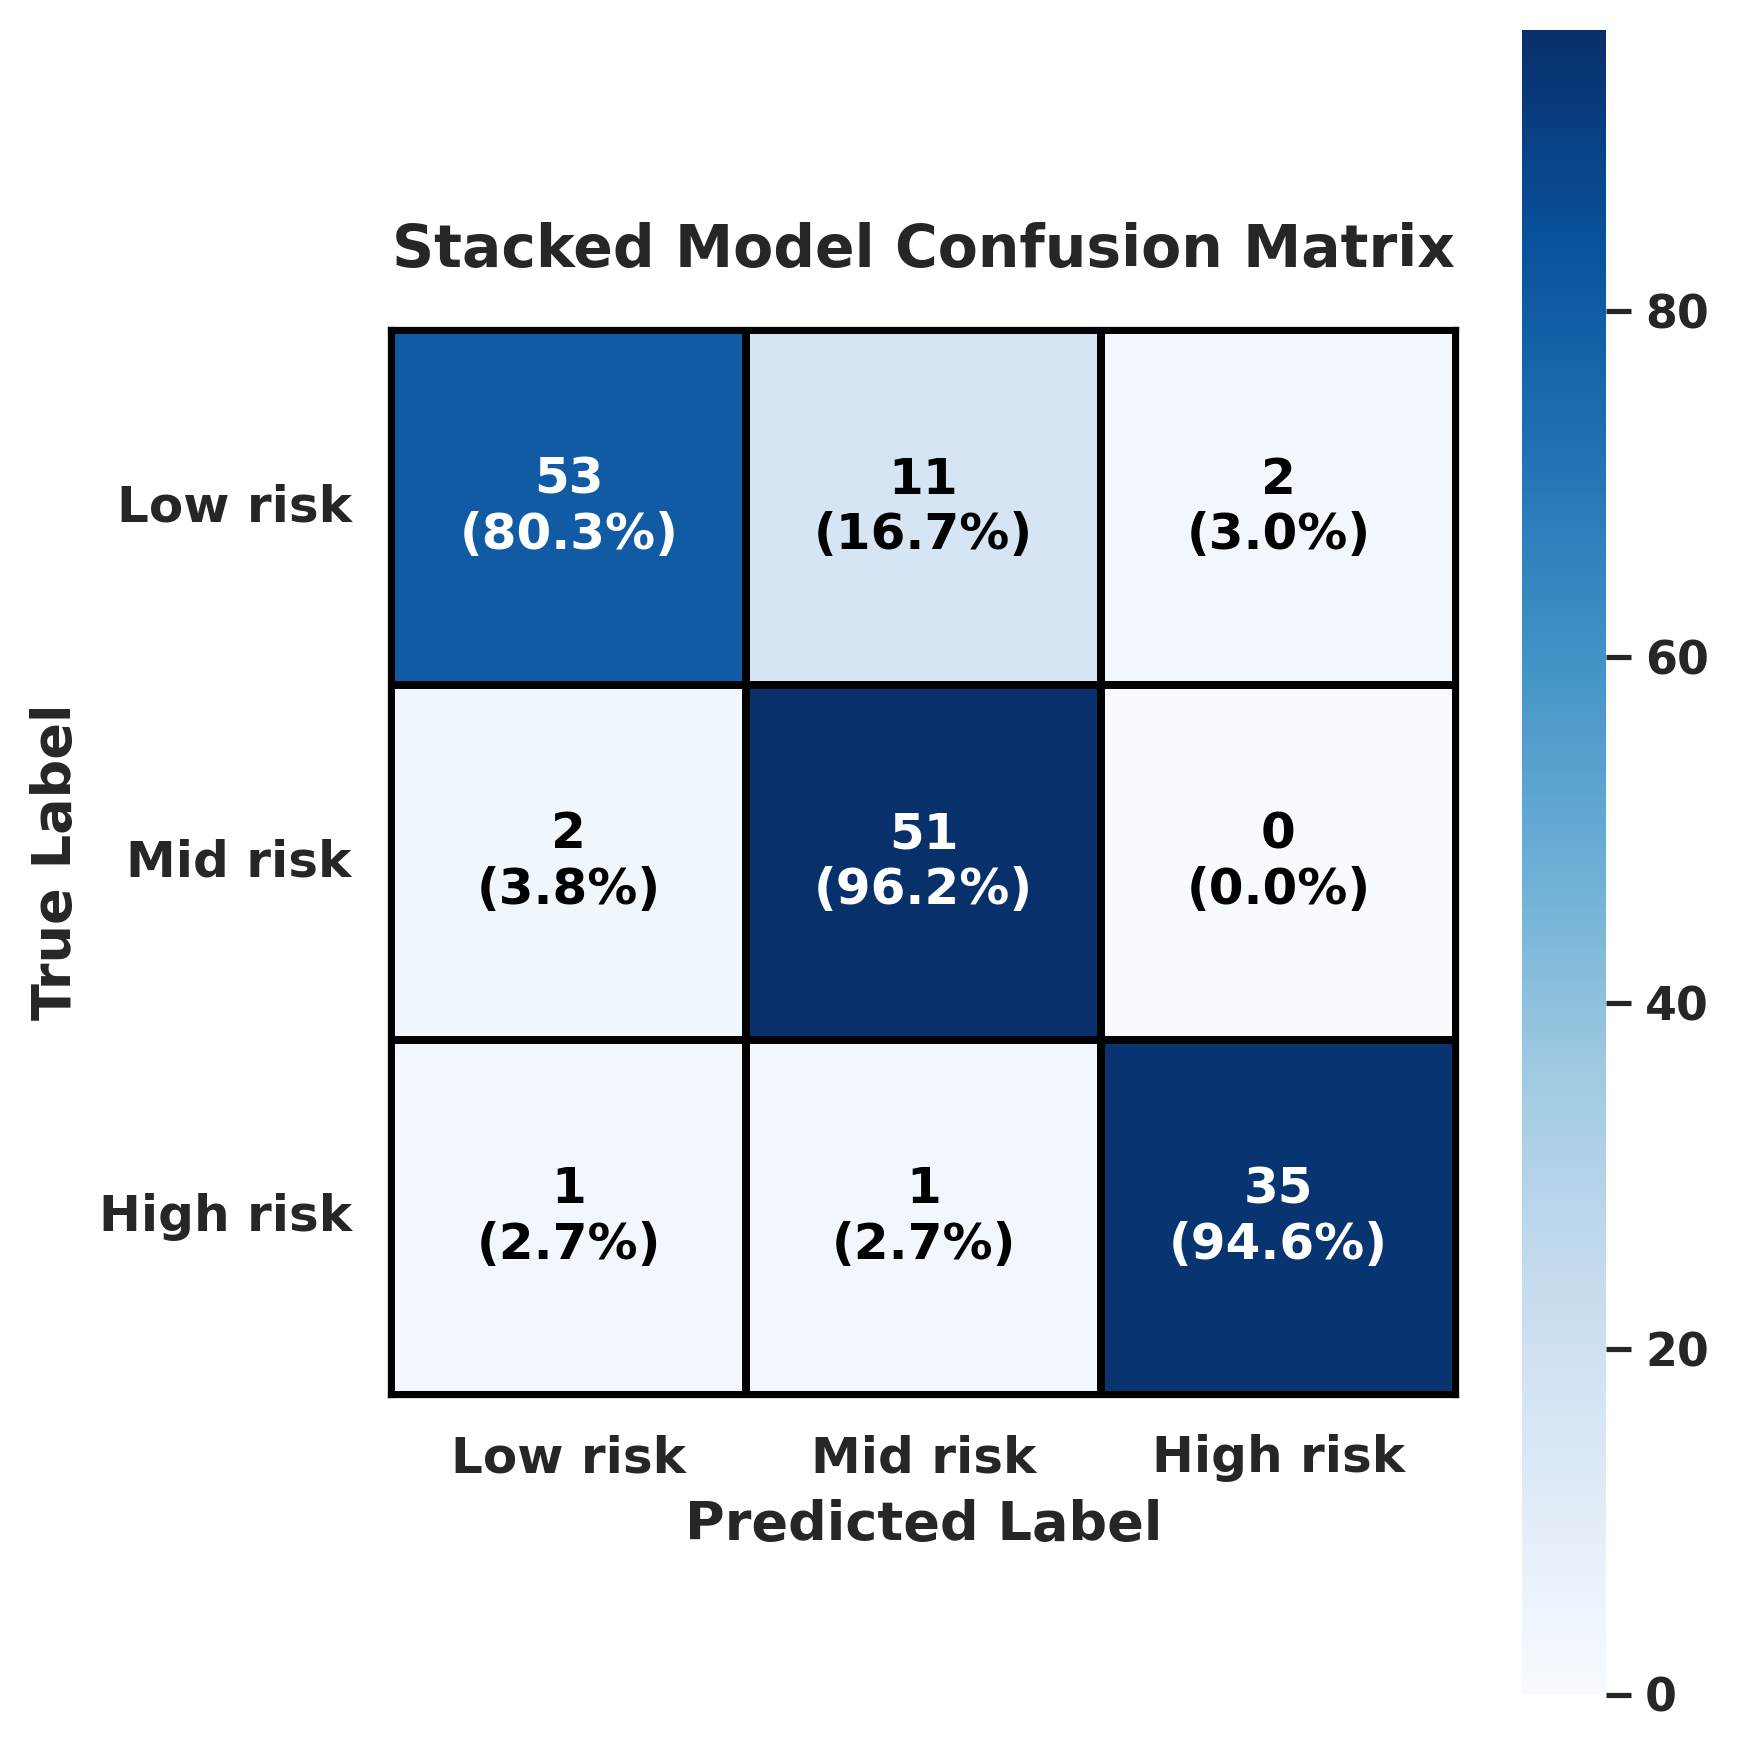

In [ ]:

cm = np.array([[53, 11, 2],
               [2, 51, 0],
               [1, 1, 35]])

class_names = ['Low risk', 'Mid risk', 'High risk']
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

annotations = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annotations[i, j] = f"{cm[i,j]}\n({cm_percentage[i,j]:.1f}%)"

plt.figure(figsize=(6,6))
sns.set_theme(style='white')
ax = sns.heatmap(
    cm_percentage,
    annot=annotations,
    fmt='',
    cmap='Blues',
    cbar=True,
    xticklabels=class_names,
    yticklabels=class_names,
    linewidths=1.5,
    linecolor='black',
    square=True,
    annot_kws={'size':12, 'weight':'bold', 'color':'black'}
)

for i in range(len(class_names)):
    text = ax.texts[i*len(class_names) + i]
    text.set_color('white')

ax.set_xlabel('Predicted Label', fontweight='bold', fontsize=13)
ax.set_ylabel('True Label', fontweight='bold', fontsize=13)
ax.set_title('Stacked Model Confusion Matrix', fontweight='bold', fontsize=14, pad=15)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_color('black')

plt.tight_layout()
plt.show()


Voting ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

def calculate_sensitivity_specificity(cm):
    num_classes = cm.shape[0]
    sensitivity = 0
    specificity = 0
    for i in range(num_classes):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        tn = cm.sum() - (tp + fn + fp)
        sensitivity += tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity += tn / (tn + fp) if (tn + fp) > 0 else 0
    return sensitivity / num_classes, specificity / num_classes

voting_estimators = [
    ('decision_tree', tuned_models['DECISION TREE']),
    ('random_forest', tuned_models['RANDOM FOREST']),
    ('mlp', tuned_models['MLP CLASSIFIER']),
    ('xgboost', tuned_models['XG BOOST']),
    ('extra_trees', tuned_models['EXTRA TREES']),
    ('svc', tuned_models['SVC']),
    ('ada_boost', tuned_models['ADA BOOST']),
    ('gradient_boost', tuned_models['GRADIENT BOOSTER']),
    ('catboost', tuned_models['CATBOOST']),
    ('lightgbm', tuned_models['LIGHTGBM']),
    ('tabpfn', tuned_models['TABPFN'])
]

weights = [1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1]

voting_model = VotingClassifier(
    estimators=voting_estimators,
    voting='soft',
    weights=weights,
    n_jobs=-1,
    flatten_transform=True,
    verbose=2
)

voting_model.fit(X_train, y_train)

y_pred = voting_model.predict(X_test)
y_proba = voting_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)
sensitivity, specificity = calculate_sensitivity_specificity(cm)

classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
macro_auc = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovo')
micro_auc = roc_auc_score(y_test_bin, y_proba, average='micro', multi_class='ovo')

def compute_metrics(y_true, y_pred, y_proba, classes):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)
    sens, spec = calculate_sensitivity_specificity(cm)
    y_true_bin = label_binarize(y_true, classes=classes)
    macro_auc = roc_auc_score(y_true_bin, y_proba, average='macro', multi_class='ovo')
    micro_auc = roc_auc_score(y_true_bin, y_proba, average='micro', multi_class='ovo')
    return acc, f1, sens, spec, macro_auc, micro_auc

def mean_ci(values, alpha=0.95):
    lower = np.percentile(values, (1 - alpha) / 2 * 100)
    upper = np.percentile(values, (1 + alpha) / 2 * 100)
    return np.mean(values), lower, upper

n_bootstraps = 1000
rng = np.random.RandomState(42)

boot_metrics = {
    "Accuracy": [],
    "Macro F1": [],
    "Macro Sensitivity": [],
    "Macro Specificity": [],
    "Macro AUC": [],
    "Micro AUC": []
}

for _ in range(n_bootstraps):
    idx = rng.choice(len(y_test), size=len(y_test), replace=True)
    y_true_bs = y_test.iloc[idx].values
    y_pred_bs = y_pred[idx]
    y_proba_bs = y_proba[idx]
    acc, f1_bs, sens, spec, macro_auc_bs, micro_auc_bs = compute_metrics(y_true_bs, y_pred_bs, y_proba_bs, classes)
    boot_metrics["Accuracy"].append(acc)
    boot_metrics["Macro F1"].append(f1_bs)
    boot_metrics["Macro Sensitivity"].append(sens)
    boot_metrics["Macro Specificity"].append(spec)
    boot_metrics["Macro AUC"].append(macro_auc_bs)
    boot_metrics["Micro AUC"].append(micro_auc_bs)

print("\n===== Voting Ensemble Performance (Bootstrap 95% CI) =====")
for metric, values in boot_metrics.items():
    mean, low, high = mean_ci(values)
    print(f"{metric:<20}: {mean:.4f} (95% CI: {low:.4f} – {high:.4f})")

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



===== Voting Ensemble Performance (Bootstrap 95% CI) =====
Accuracy            : 0.8737 (95% CI: 0.8165 – 0.9241)
Macro F1            : 0.8821 (95% CI: 0.8321 – 0.9285)
Macro Sensitivity   : 0.8882 (95% CI: 0.8383 – 0.9318)
Macro Specificity   : 0.9348 (95% CI: 0.9063 – 0.9599)
Macro AUC           : 0.9756 (95% CI: 0.9595 – 0.9886)
Micro AUC           : 0.9781 (95% CI: 0.9633 – 0.9892)

Confusion Matrix:
 [[54 12  2]
 [ 4 49  0]
 [ 1  1 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        68
           1       0.79      0.92      0.85        53
           2       0.95      0.95      0.95        37

    accuracy                           0.87       158
   macro avg       0.88      0.89      0.88       158
weighted avg       0.88      0.87      0.87       158



Hybrid ensemble

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from tabpfn import TabPFNClassifier

base_models = [
    ('decision_tree', DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=400, max_depth=20, min_samples_split=4, min_samples_leaf=2, max_features='sqrt', bootstrap=True, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=400, learning_rate=0.03, max_depth=7, subsample=0.8, colsample_bytree=0.8, gamma=0, reg_alpha=0.5, reg_lambda=1.0, random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('cat', CatBoostClassifier(iterations=400, learning_rate=0.03, depth=7, l2_leaf_reg=3, border_count=64, verbose=0, random_state=42)),
    ('lgb', LGBMClassifier(n_estimators=400, learning_rate=0.03, num_leaves=64, max_depth=-1, boosting_type='gbdt', min_child_samples=10, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.5, reg_lambda=1.0, random_state=42)),
    ('tabpfn', TabPFNClassifier(device='cpu', random_state=42)),
    ('svc', SVC(C=1, kernel='linear', probability=True, random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', alpha=0.01, learning_rate='adaptive', max_iter=1000, random_state=42))
]

meta_learner = LGBMClassifier(n_estimators=500, learning_rate=0.03, num_leaves=64, max_depth=10, min_child_samples=10, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.5, reg_lambda=1.0, class_weight='balanced', random_state=42)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

hybrid_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=cv, stack_method='predict_proba', n_jobs=-1, passthrough=True)

hybrid_model.fit(X_train, y_train)

y_pred = hybrid_model.predict(X_test)
y_proba = hybrid_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

cm = confusion_matrix(y_test, y_pred)
num_classes = cm.shape[0]

sens_list = []
spec_list = []

for i in range(num_classes):
    tp = cm[i, i]
    fn = cm[i, :].sum() - tp
    fp = cm[:, i].sum() - tp
    tn = cm.sum() - (tp + fn + fp)
    sens_list.append(tp / (tp + fn) if (tp + fn) != 0 else 0)
    spec_list.append(tn / (tn + fp) if (tn + fp) != 0 else 0)

macro_sensitivity = np.mean(sens_list)
macro_specificity = np.mean(spec_list)

classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

macro_auc = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
micro_auc = roc_auc_score(y_test_bin, y_proba, average='micro', multi_class='ovr')

def compute_metrics(y_true, y_pred, y_proba, classes):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)
    num_classes = cm.shape[0]
    sens = []
    spec = []
    for i in range(num_classes):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        tn = cm.sum() - (tp + fn + fp)
        sens.append(tp / (tp + fn) if (tp + fn) != 0 else 0)
        spec.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
    macro_sens = np.mean(sens)
    macro_spec = np.mean(spec)
    y_true_bin = label_binarize(y_true, classes=classes)
    macro_auc = roc_auc_score(y_true_bin, y_proba, average='macro', multi_class='ovr')
    micro_auc = roc_auc_score(y_true_bin, y_proba, average='micro', multi_class='ovr')
    return acc, f1, macro_sens, macro_spec, macro_auc, micro_auc

def mean_ci(values, alpha=0.95):
    lower = np.percentile(values, (1 - alpha) / 2 * 100)
    upper = np.percentile(values, (1 + alpha) / 2 * 100)
    return np.mean(values), lower, upper

n_bootstraps = 1000
rng = np.random.RandomState(42)

boot_metrics = {"Accuracy": [], "Macro F1": [], "Macro Sensitivity": [], "Macro Specificity": [], "Macro AUC": [], "Micro AUC": []}

for _ in range(n_bootstraps):
    idx = rng.choice(len(y_test), size=len(y_test), replace=True)
    y_true_bs = y_test.iloc[idx].values
    y_pred_bs = y_pred[idx]
    y_proba_bs = y_proba[idx]
    acc, f1_bs, sens_bs, spec_bs, macro_auc_bs, micro_auc_bs = compute_metrics(y_true_bs, y_pred_bs, y_proba_bs, classes)
    boot_metrics["Accuracy"].append(acc)
    boot_metrics["Macro F1"].append(f1_bs)
    boot_metrics["Macro Sensitivity"].append(sens_bs)
    boot_metrics["Macro Specificity"].append(spec_bs)
    boot_metrics["Macro AUC"].append(macro_auc_bs)
    boot_metrics["Micro AUC"].append(micro_auc_bs)

print("\n===== Hybrid Stacked Ensemble Performance (Bootstrap 95% CI) =====")
for metric, values in boot_metrics.items():
    mean, low, high = mean_ci(values)
    print(f"{metric:<20}: {mean:.4f} (95% CI: {low:.4f} – {high:.4f})")

print("\nConfusion Matrix:\n", cm)



===== Hybrid Stacked Ensemble Performance (Bootstrap 95% CI) =====
Accuracy            : 0.8486 (95% CI: 0.7848 – 0.8987)
Macro F1            : 0.8620 (95% CI: 0.8065 – 0.9089)
Macro Sensitivity   : 0.8660 (95% CI: 0.8110 – 0.9124)
Macro Specificity   : 0.9208 (95% CI: 0.8882 – 0.9487)
Macro AUC           : 0.9676 (95% CI: 0.9462 – 0.9840)
Micro AUC           : 0.9696 (95% CI: 0.9514 – 0.9844)

Confusion Matrix:
 [[52 15  1]
 [ 6 47  0]
 [ 1  1 35]]


###Ensemble model performance evaluation

Bootstrap

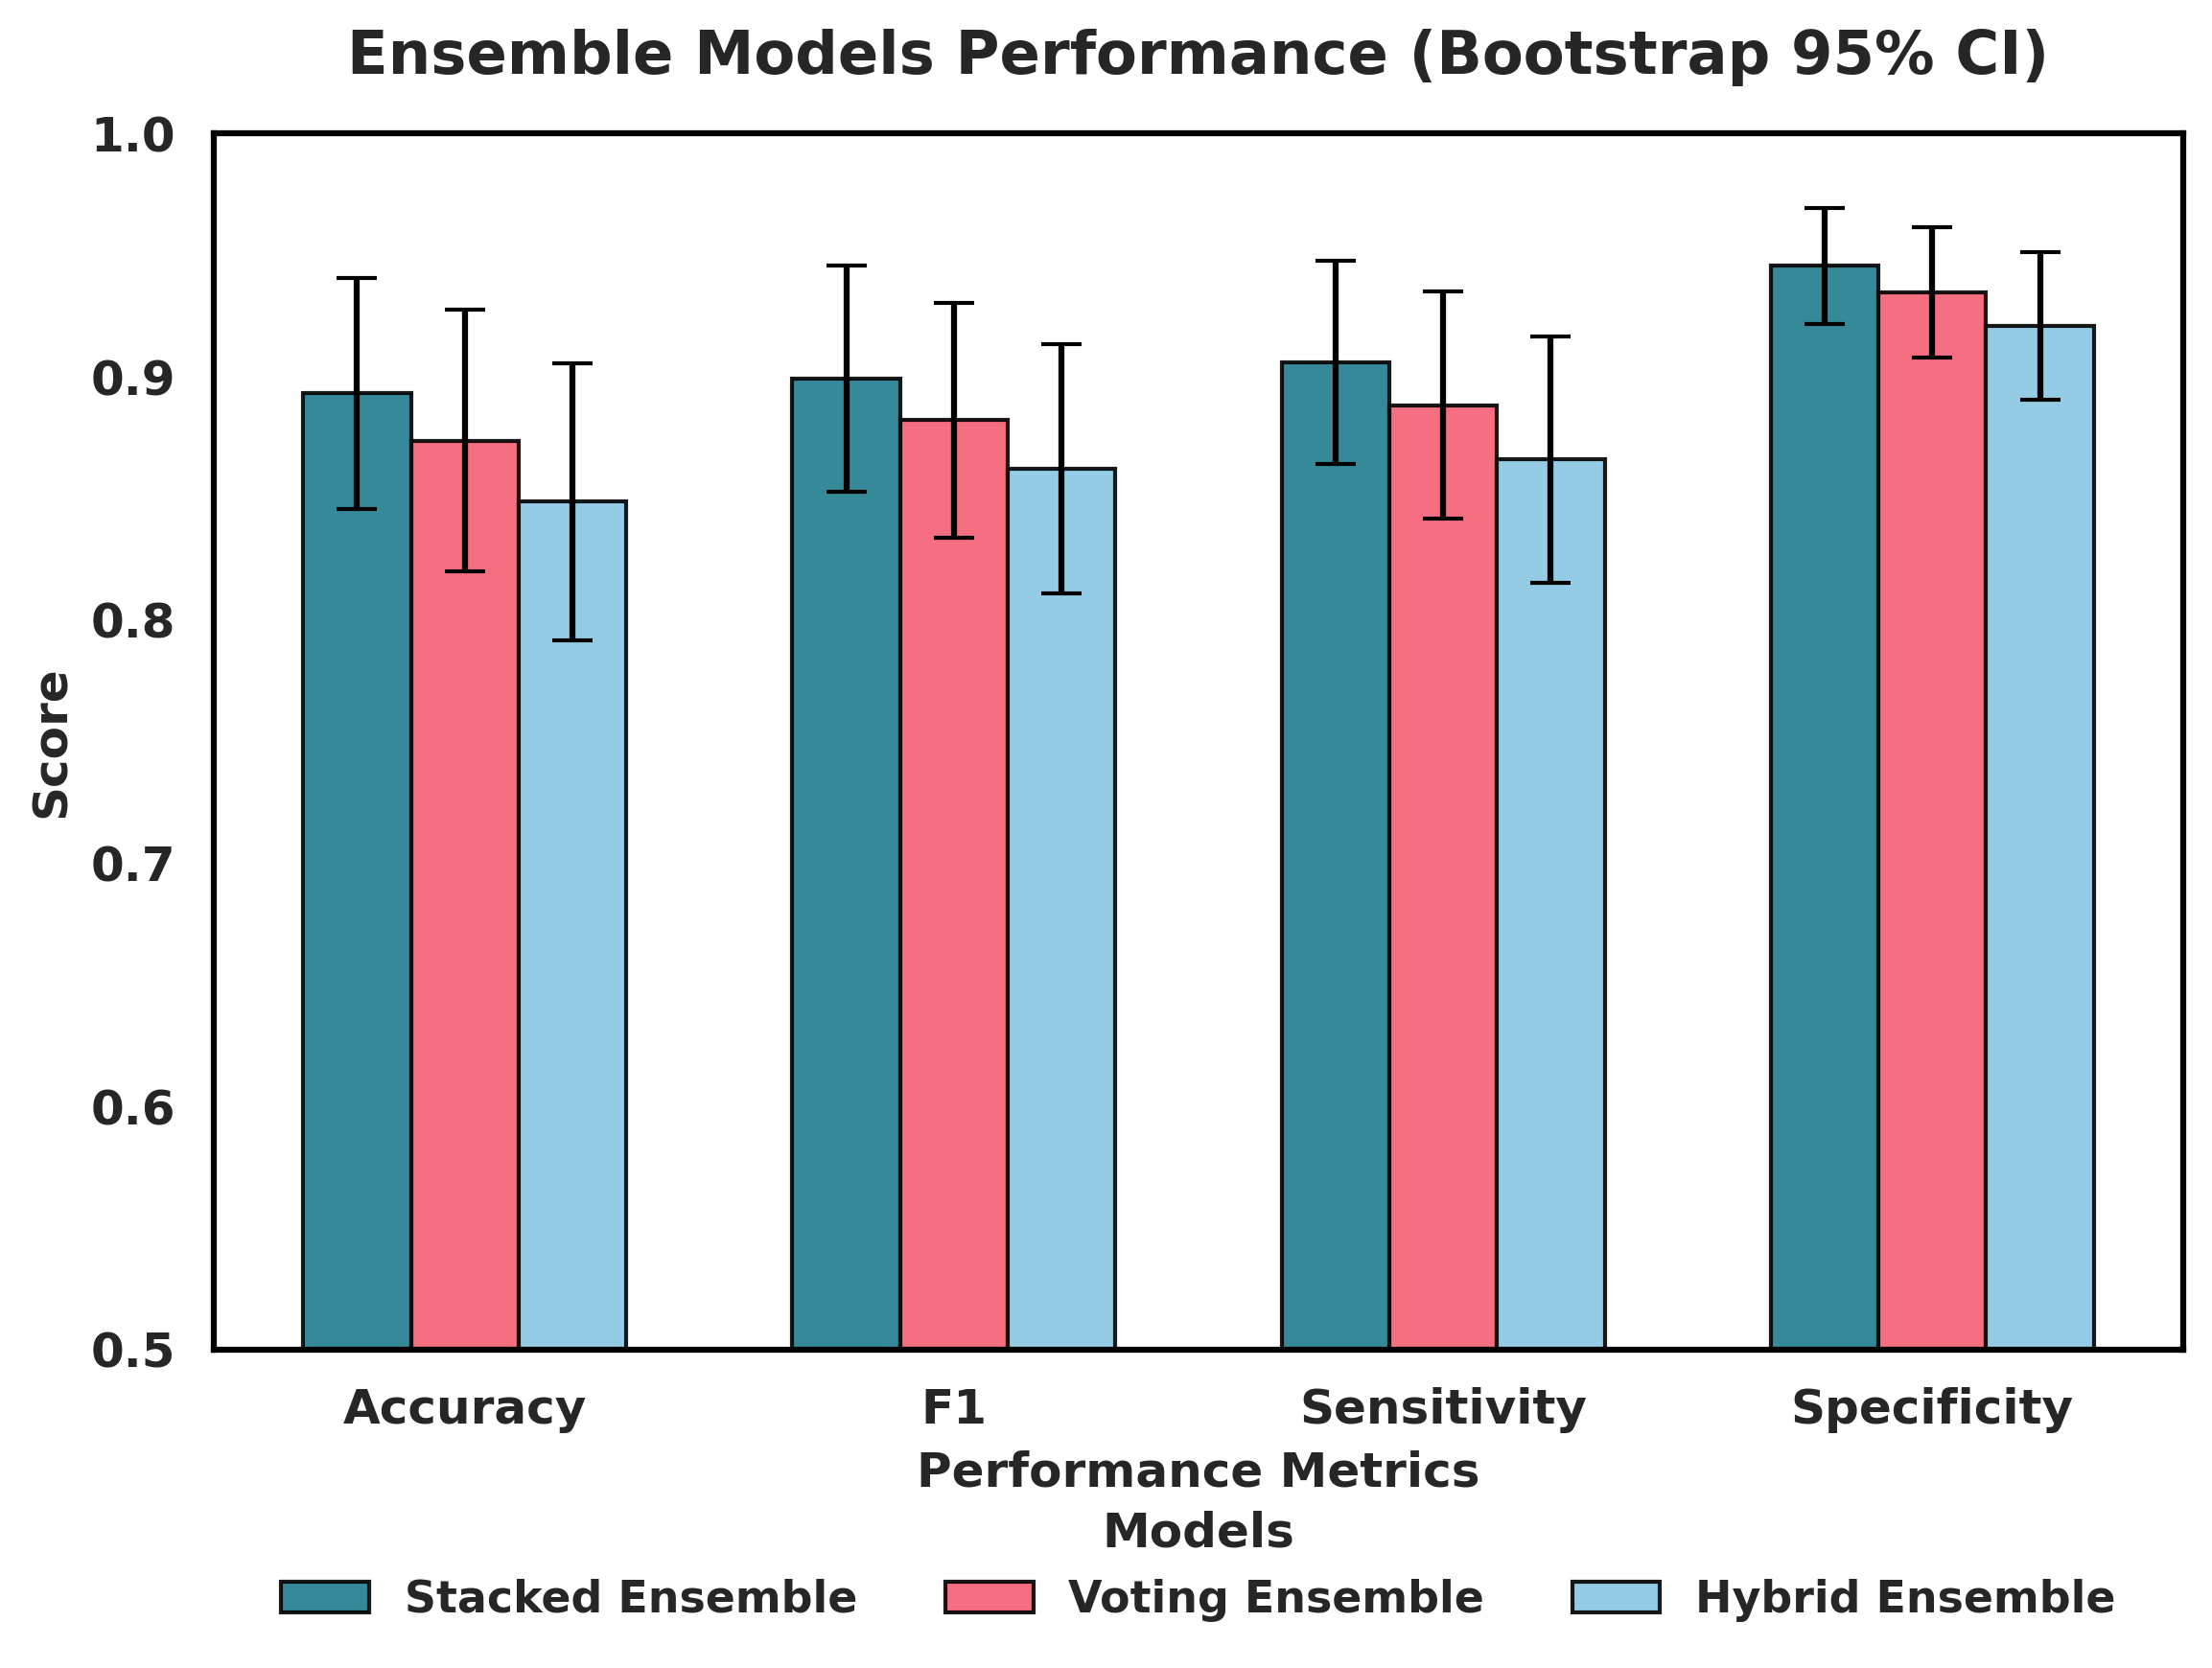

In [ ]:
mean_metrics = {
    "Stacked Ensemble": {"Accuracy": 0.8931, "F1": 0.8992, "Sensitivity": 0.9059, "Specificity": 0.9456},
    "Voting Ensemble":  {"Accuracy": 0.8737, "F1": 0.8821, "Sensitivity": 0.8882, "Specificity": 0.9348},
    "Hybrid Ensemble":  {"Accuracy": 0.8486, "F1": 0.8620, "Sensitivity": 0.8660, "Specificity": 0.9208}
}

ci_metrics = {
    "Stacked Ensemble": {
        "Accuracy": (0.9367 - 0.8418) / 2,
        "F1": (0.9420 - 0.8490) / 2,
        "Sensitivity": (0.9455 - 0.8623) / 2,
        "Specificity": (0.9684 - 0.9206) / 2
    },
    "Voting Ensemble": {
        "Accuracy": (0.9241 - 0.8165) / 2,
        "F1": (0.9285 - 0.8321) / 2,
        "Sensitivity": (0.9318 - 0.8383) / 2,
        "Specificity": (0.9599 - 0.9063) / 2
    },
    "Hybrid Ensemble": {
        "Accuracy": (0.8987 - 0.7848) / 2,
        "F1": (0.9089 - 0.8065) / 2,
        "Sensitivity": (0.9124 - 0.8110) / 2,
        "Specificity": (0.9487 - 0.8882) / 2
    }
}

df_mean = pd.DataFrame(mean_metrics).T
df_ci   = pd.DataFrame(ci_metrics).T

metrics_list = ["Accuracy", "F1", "Sensitivity", "Specificity"]
df_mean = df_mean[metrics_list]
df_ci   = df_ci[metrics_list]

sns.set_theme(style="white")
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'axes.titlesize': 15,
    'axes.labelsize': 12,
    'legend.fontsize': 11,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (8, 5)
})

x = np.arange(len(metrics_list))
bar_width = 0.22
colors = ['#1f7c8e', '#f45f73', '#87c7e2']

fig, ax = plt.subplots(figsize=(8, 6))

for i, (model, color) in enumerate(zip(df_mean.index, colors)):
    ax.bar(
        x + i * bar_width,
        df_mean.loc[model],
        width=bar_width,
        yerr=df_ci.loc[model],
        capsize=5,
        label=model,
        alpha=0.9,
        color=color,
        edgecolor='black',
        ecolor='black',
        error_kw={'elinewidth': 1.5}
    )

ax.set_xticks(x + bar_width)
ax.set_xticklabels(metrics_list, fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_xlabel('Performance Metrics', fontweight='bold')
ax.set_title('Ensemble Models Performance (Bootstrap 95% CI)', pad=15)
ax.set_ylim(0.5, 1.0)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

ax.legend(
    title='Models',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.10),
    ncol=3,
    frameon=False
)

plt.tight_layout()
plt.show()


ROC curve for ensemble

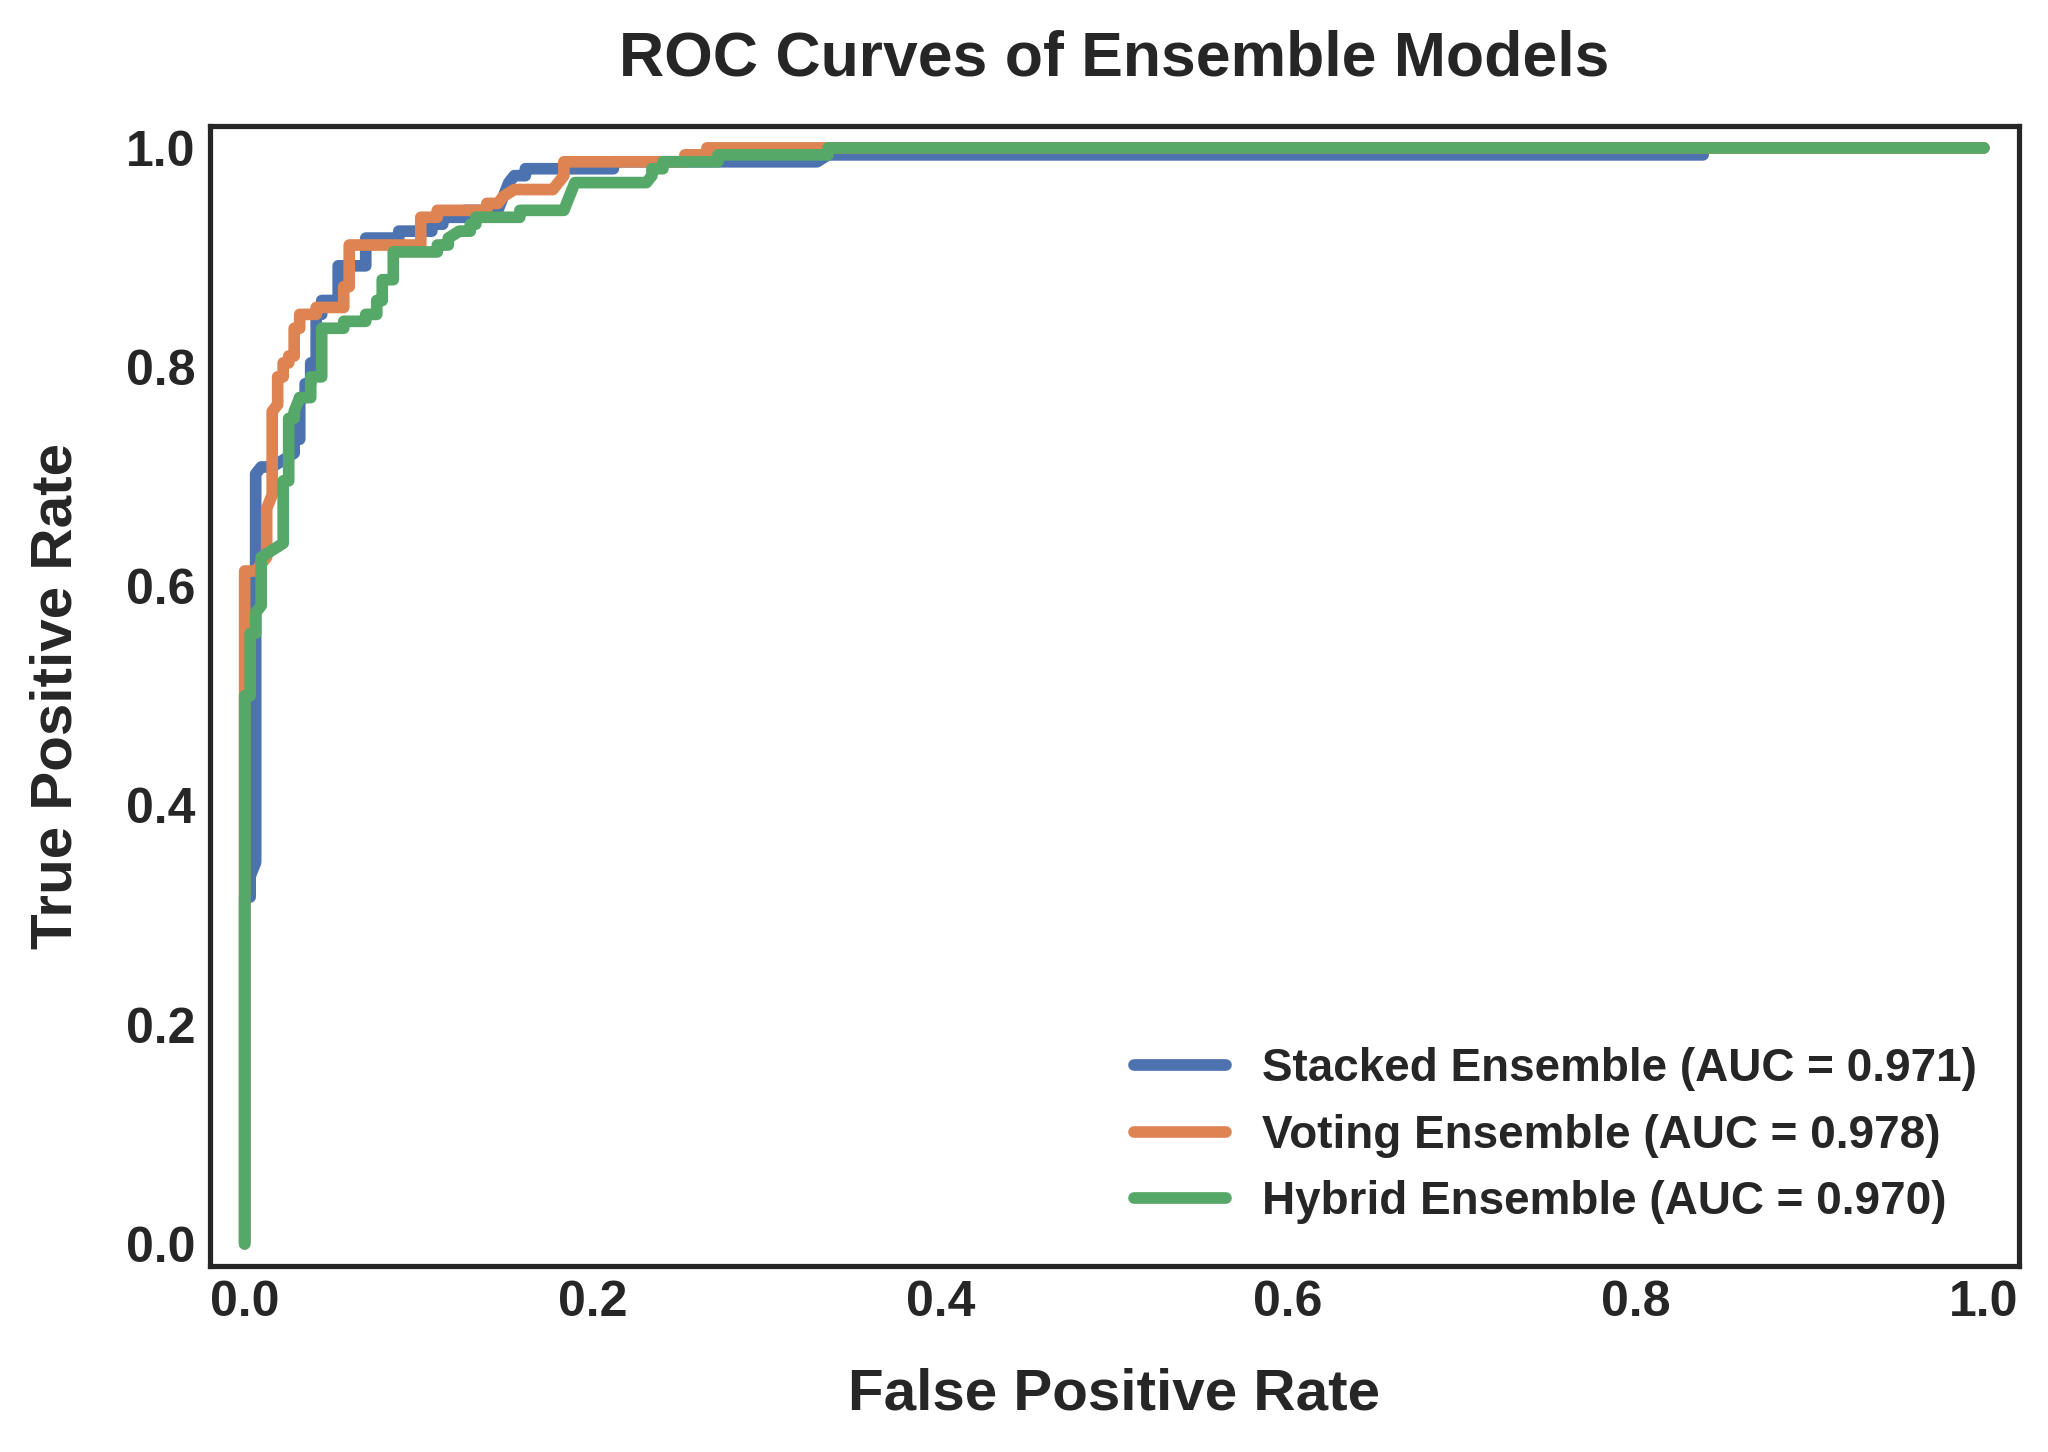

In [ ]:
from matplotlib import rcParams
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

rcParams.update({
    'font.family': 'Arial',
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titlesize': 15,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 11,
    'lines.linewidth': 2.8,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 1.3,
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

def get_micro_roc(model, X_test, y_test, classes):
    y_test_bin = label_binarize(y_test, classes=classes)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_test)
        if scores.ndim == 1:
            from scipy.special import expit
            s = expit(scores)
            y_score = np.vstack([1 - s, s]).T
        else:
            y_score = scores
    else:
        raise ValueError("Model must implement predict_proba or decision_function.")
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    micro_auc_value = auc(fpr, tpr)
    return fpr, tpr, micro_auc_value

classes = np.unique(y_train)

fpr_stack, tpr_stack, auc_stack = get_micro_roc(stacked_model, X_test, y_test, classes)
fpr_vote, tpr_vote, auc_vote = get_micro_roc(voting_model, X_test, y_test, classes)
fpr_hybrid, tpr_hybrid, auc_hybrid = get_micro_roc(hybrid_model, X_test, y_test, classes)

plt.figure(figsize=(7, 5))
plt.style.use('seaborn-v0_8-white')

plt.plot(fpr_stack, tpr_stack, label=f'Stacked Ensemble (AUC = {auc_stack:.3f})')
plt.plot(fpr_vote, tpr_vote, label=f'Voting Ensemble (AUC = {auc_vote:.3f})')
plt.plot(fpr_hybrid, tpr_hybrid, label=f'Hybrid Ensemble (AUC = {auc_hybrid:.3f})')

plt.xlabel('False Positive Rate', labelpad=10)
plt.ylabel('True Positive Rate', labelpad=10)
plt.title('ROC Curves of Ensemble Models', pad=12)

plt.legend(loc="lower right", frameon=False)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.tick_params(width=1.2)
plt.grid(False)
plt.box(True)
plt.tight_layout()
plt.show()


In [ ]:
from matplotlib import rcParams
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.utils import resample

rcParams.update({
    'font.family': 'Arial',
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titlesize': 15,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 11,
    'lines.linewidth': 2.8,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.linewidth': 1.3,
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

def get_macro_roc(model, X_test, y_test, classes):
    y_test_bin = label_binarize(y_test, classes=classes)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_test)
        if scores.ndim == 1:
            from scipy.special import expit
            s = expit(scores)
            y_score = np.vstack([1 - s, s]).T
        else:
            y_score = scores
    else:
        raise ValueError("Model must implement predict_proba or decision_function.")
    fpr_dict, tpr_dict = {}, {}
    for i in range(len(classes)):
        fpr_dict[i], tpr_dict[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    all_fpr = np.linspace(0, 1, 1000)
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += np.interp(all_fpr, fpr_dict[i], tpr_dict[i])
    mean_tpr /= len(classes)
    macro_auc_value = auc(all_fpr, mean_tpr)
    return all_fpr, mean_tpr, macro_auc_value

def auc_with_ci(model, X_test, y_test, classes, n_bootstraps=1000, ci=95, random_state=42):
    rng = np.random.default_rng(random_state)
    aucs = []
    n_samples = len(y_test)
    for _ in range(n_bootstraps):
        indices = rng.choice(n_samples, n_samples, replace=True)
        X_resampled = X_test[indices]
        y_resampled = y_test.values[indices]
        _, _, auc_val = get_macro_roc(model, X_resampled, y_resampled, classes)
        aucs.append(auc_val)
    aucs = np.array(aucs)
    lower = np.percentile(aucs, (100 - ci) / 2)
    upper = np.percentile(aucs, 100 - (100 - ci) / 2)
    mean_auc = np.mean(aucs)
    return mean_auc, lower, upper

classes = np.unique(y_train)
fpr_stack, tpr_stack, auc_stack = get_macro_roc(stacked_model, X_test, y_test, classes)
fpr_vote, tpr_vote, auc_vote = get_macro_roc(voting_model, X_test, y_test, classes)
fpr_hybrid, tpr_hybrid, auc_hybrid = get_macro_roc(hybrid_model, X_test, y_test, classes)

auc_stack_mean, auc_stack_low, auc_stack_high = auc_with_ci(stacked_model, X_test, y_test, classes)
auc_vote_mean, auc_vote_low, auc_vote_high = auc_with_ci(voting_model, X_test, y_test, classes)
auc_hybrid_mean, auc_hybrid_low, auc_hybrid_high = auc_with_ci(hybrid_model, X_test, y_test, classes)

print(f"Stacked Ensemble AUC: {auc_stack_mean:.3f} (95% CI: {auc_stack_low:.3f}-{auc_stack_high:.3f})")
print(f"Voting Ensemble AUC: {auc_vote_mean:.3f} (95% CI: {auc_vote_low:.3f}-{auc_vote_high:.3f})")
print(f"Hybrid Ensemble AUC: {auc_hybrid_mean:.3f} (95% CI: {auc_hybrid_low:.3f}-{auc_hybrid_high:.3f})")

plt.figure(figsize=(7, 5))
plt.style.use('seaborn-v0_8-white')

plt.plot(fpr_stack, tpr_stack, label=f'Stacked Ensemble (AUC = {auc_stack_mean:.3f})')
plt.plot(fpr_vote, tpr_vote, label=f'Voting Ensemble (AUC = {auc_vote_mean:.3f})')
plt.plot(fpr_hybrid, tpr_hybrid, label=f'Hybrid Ensemble (AUC = {auc_hybrid_mean:.3f})')

plt.xlabel('False Positive Rate', labelpad=10)
plt.ylabel('True Positive Rate', labelpad=10)
plt.title('ROC Curves of Ensemble Models', pad=12)
plt.legend(loc="lower right", frameon=False)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.tick_params(width=1.2)
plt.grid(False)
plt.box(True)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

##Final Model Performance Evaluation After Tuning


=== Tuned Models Performance Metrics (Ordered) ===

                  Accuracy  Sensitivity  Specificity  Precision  F1-score
DECISION TREE     0.860759     0.879781     0.925511   0.862461  0.865423
RANDOM FOREST     0.873418     0.888197     0.932441   0.883841  0.882838
MLP CLASSIFIER    0.721519     0.730427     0.835842   0.730866  0.726931
XG BOOST          0.873418     0.888197     0.932441   0.883841  0.882838
EXTRA TREES       0.873418     0.889585     0.932558   0.877904  0.879539
SVC               0.658228     0.682960     0.811898   0.719550  0.692080
ADA BOOST         0.664557     0.671269     0.802427   0.689751  0.679298
GRADIENT BOOSTER  0.803797     0.806694     0.889558   0.833680  0.818054
CATBOOST          0.841772     0.860913     0.915084   0.853940  0.853226
LIGHTGBM          0.879747     0.894487     0.936246   0.890210  0.888386
TABPFN            0.879747     0.891712     0.935302   0.878456  0.883788


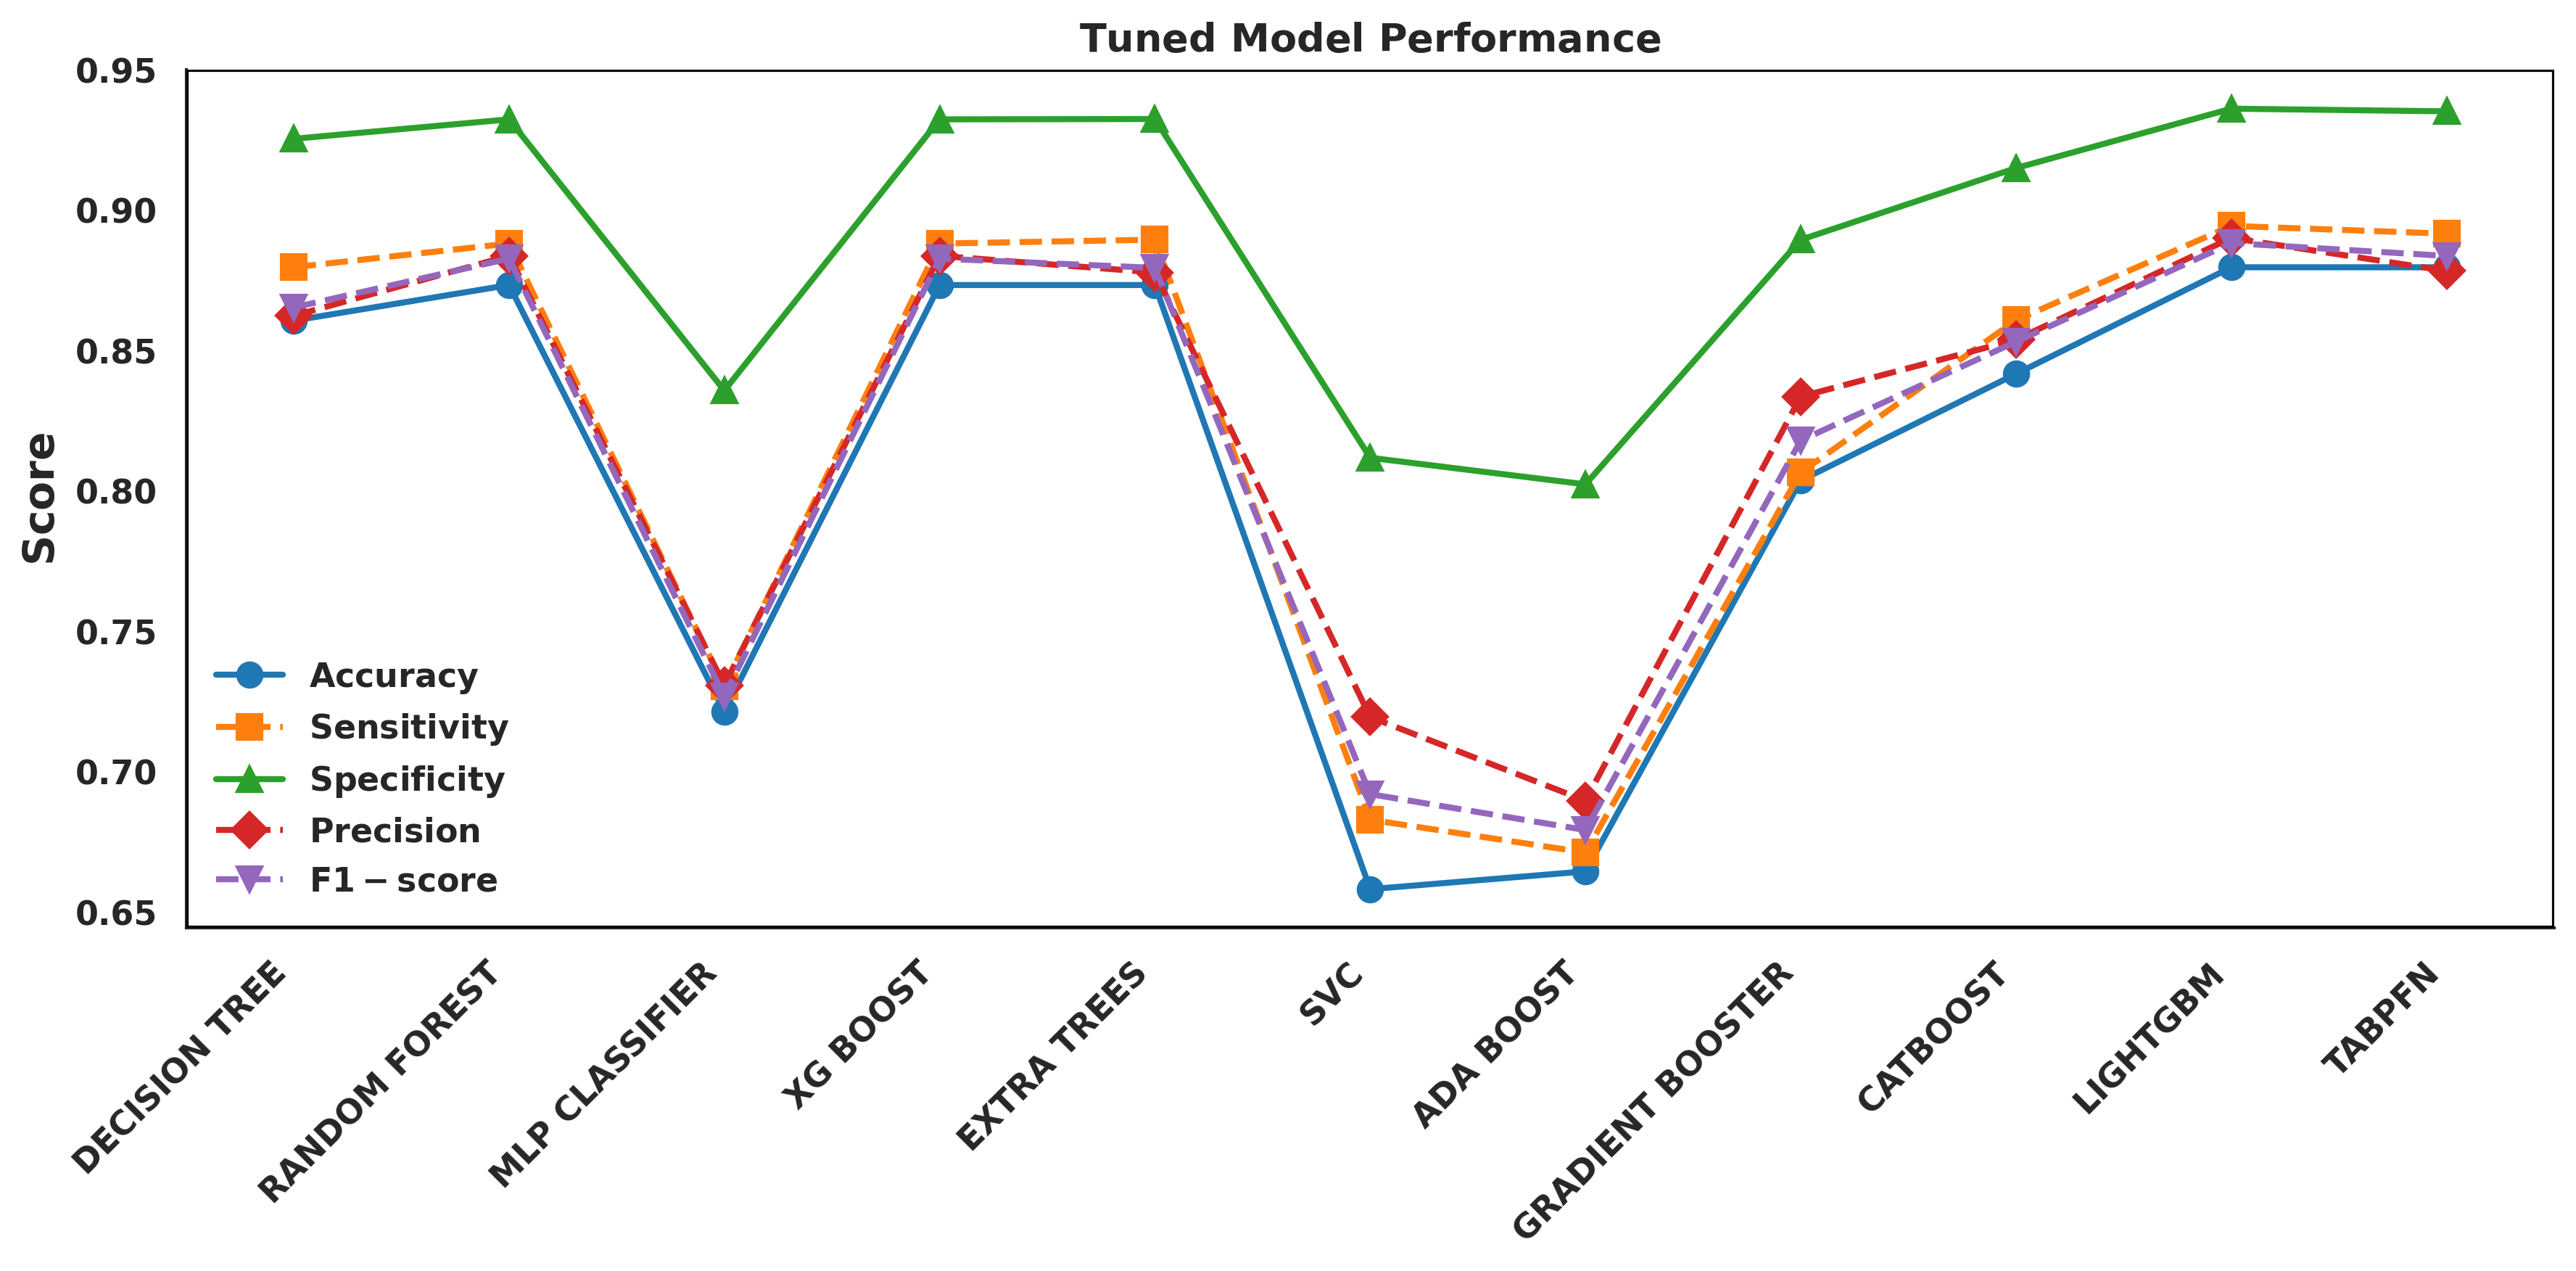

In [ ]:
model_order = list(results.keys())

sns.set_theme(style="white")
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'font.weight': 'bold',
    'font.family': 'Arial',
    'axes.linewidth': 1.0
})

all_metrics_combined = {}
for name, metrics in tuned_results.items():
    all_metrics_combined[name] = {
        'Accuracy': metrics['accuracy'],
        'Sensitivity': metrics['sensitivity'],
        'Specificity': metrics['specificity'],
        'Precision': metrics['precision'],
        'F1-score': metrics['f1_score']
    }

metrics_df = pd.DataFrame(all_metrics_combined).T
metrics_df = metrics_df.reindex(model_order)

print("\n=== Tuned Models Performance Metrics (Ordered) ===\n")
print(metrics_df)

plt.figure(figsize=(12, 6))
metrics_to_plot = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-score']
markers = ['o', 's', '^', 'D', 'v']
linestyles = ['-', '--', '-', '--', '--']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

x = np.arange(len(metrics_df))

for metric, marker, ls, color in zip(metrics_to_plot, markers, linestyles, colors):
    plt.plot(
        x,
        metrics_df[metric],
        label=rf'$\mathbf{{{metric}}}$',
        marker=marker,
        markersize=8,
        linestyle=ls,
        color=color,
        linewidth=2
    )

plt.xticks(x, metrics_df.index, rotation=45, ha="right", fontsize=11, fontweight='bold', family='Arial')
plt.yticks(fontsize=11, fontweight='bold', family='Arial')
plt.ylabel(r'$\mathbf{Score}$', fontsize=14, fontweight='bold')
plt.title(r'$\mathbf{Tuned\ Model\ Performance}$', fontsize=13, fontweight='bold')
plt.legend(fontsize=11, frameon=False)

x0, x1 = plt.xlim()
y0, y1 = plt.ylim()
rect = plt.Rectangle(
    (x0, y0),
    x1 - x0,
    y1 - y0,
    fill=False,
    color='black',
    linewidth=1.5,
    zorder=10
)
plt.gca().add_patch(rect)

sns.despine()
plt.gca().set_facecolor('white')
plt.grid(False)
plt.tight_layout()
plt.show()


ROC curve after tuning

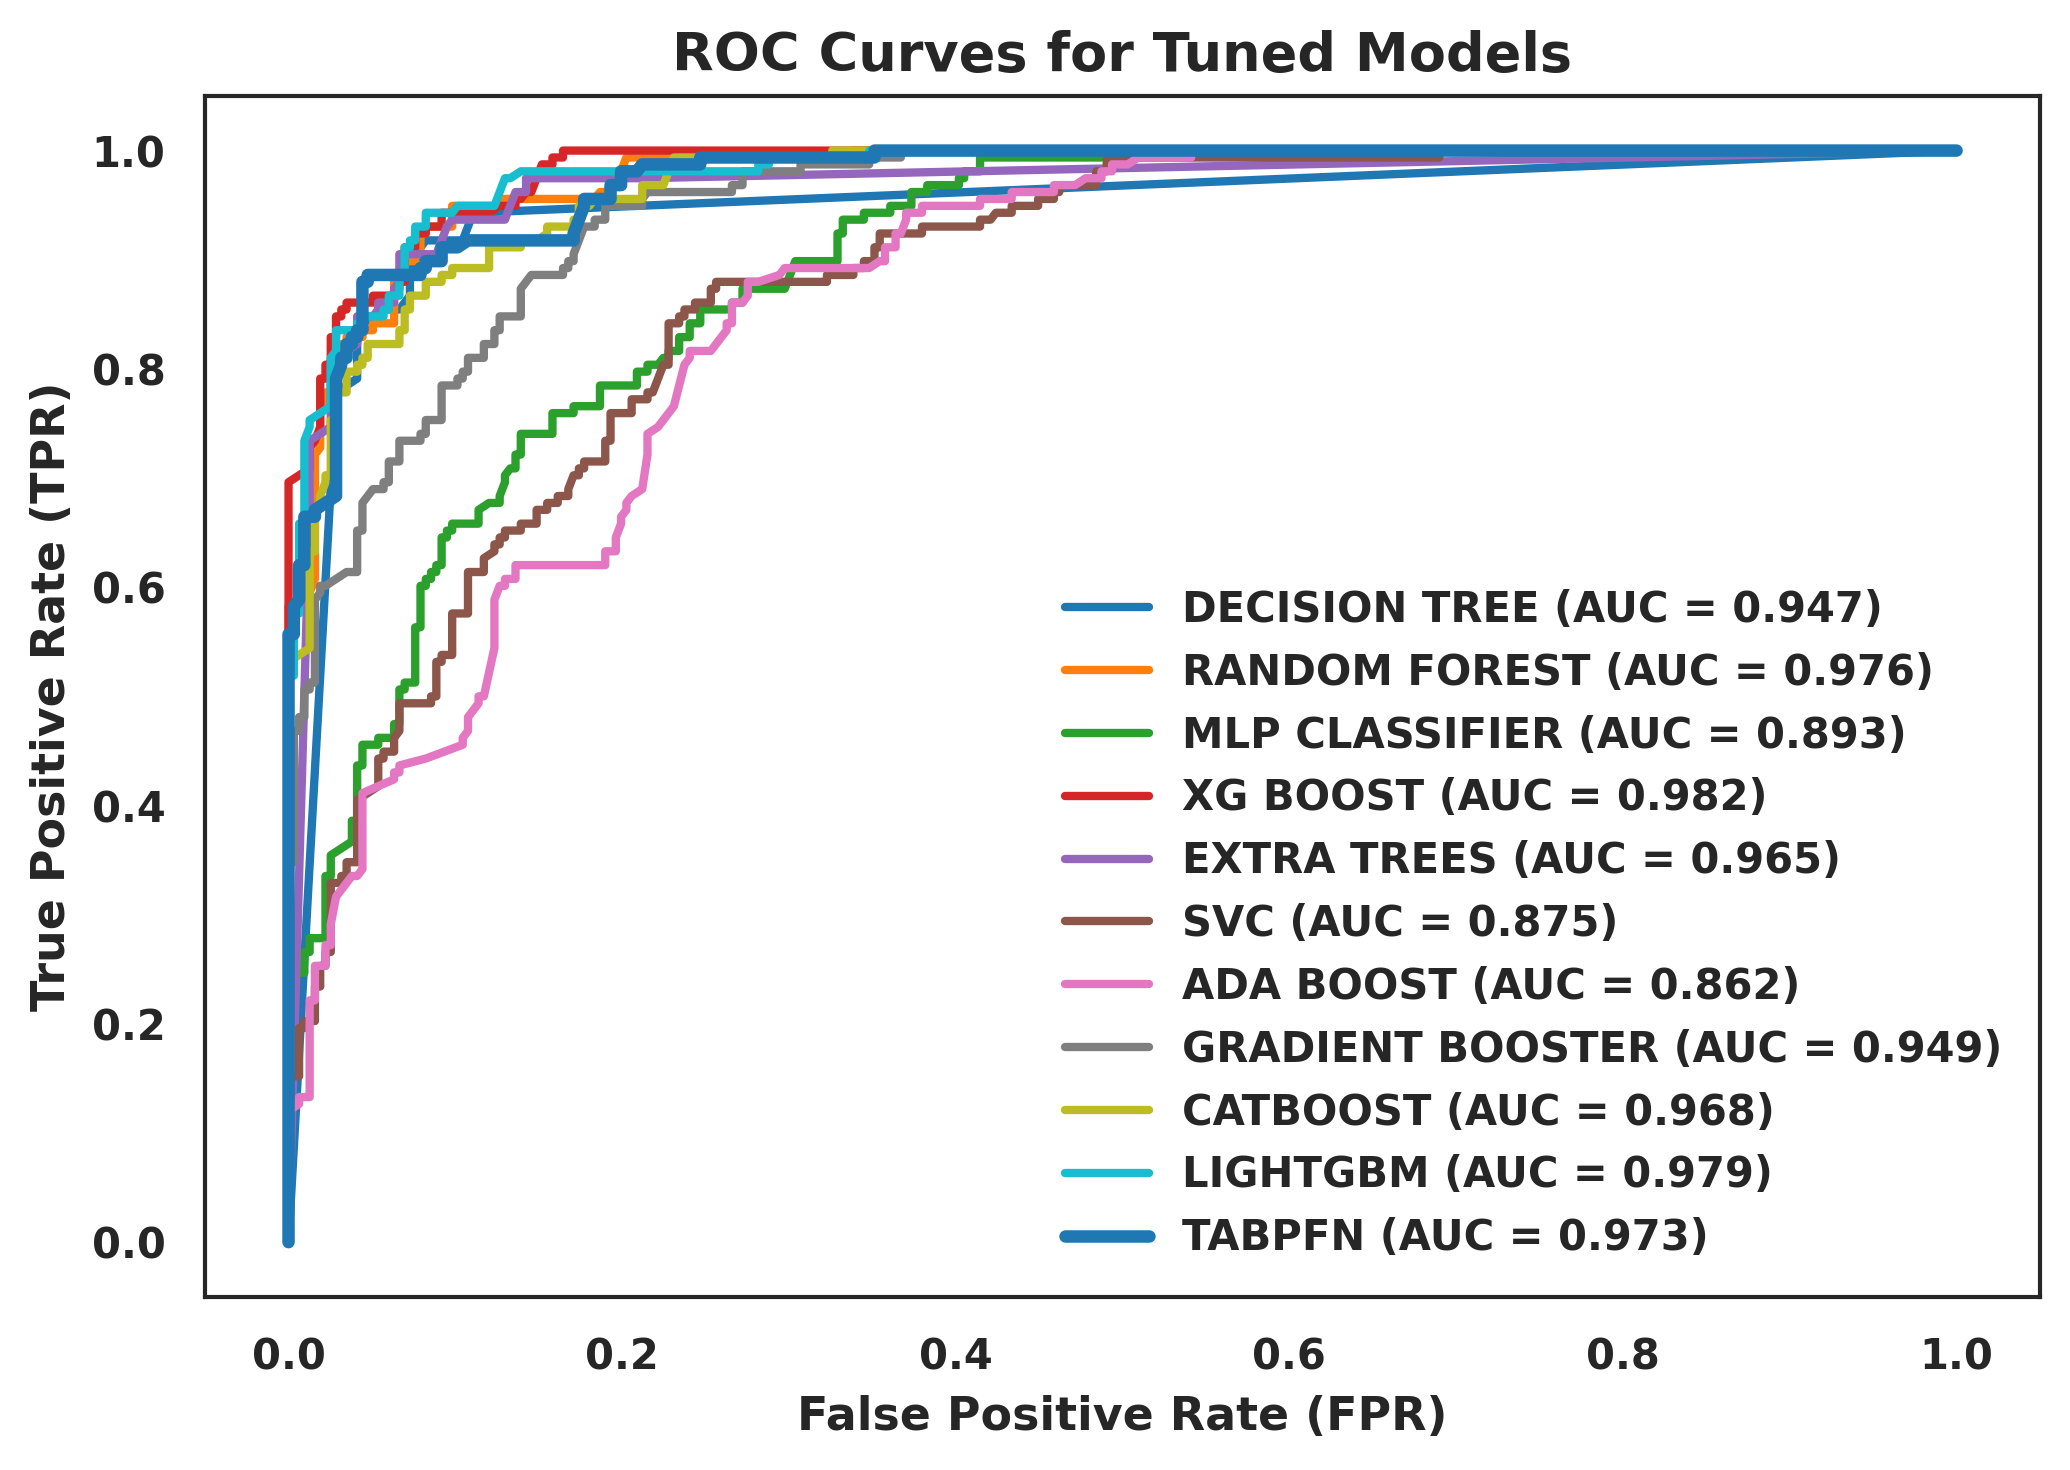

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

sns.set_style("white")
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,
    'font.weight': 'bold'
})

roc_data = {}

for name, model in tuned_models.items():
    try:
        if name == "TABPFN":
            if hasattr(model, "predict_proba"):
                y_proba = model.predict_proba(X_test)
            else:
                y_proba = model.predict(X_test, return_probabilities=True)[1]
        else:
            if not hasattr(model, "predict_proba"):
                print(f"Skipping {name}: no predict_proba")
                continue
            y_proba = model.predict_proba(X_test)

        unique_classes = np.unique(y_test)

        if len(unique_classes) == 2:
            y_test_binary = (y_test == unique_classes[1]).astype(int)
            if y_proba.ndim == 2 and y_proba.shape[1] > 1:
                y_proba_pos = y_proba[:, 1]
            else:
                y_proba_pos = y_proba.ravel()
            fpr, tpr, _ = roc_curve(y_test_binary, y_proba_pos)
        else:
            lb = LabelBinarizer()
            y_test_binarized = lb.fit_transform(y_test)
            if y_test_binarized.shape[1] == 1:
                print(f"Skipping {name}: only one class present in test set")
                continue
            fpr, tpr, _ = roc_curve(
                y_test_binarized.ravel(),
                y_proba.ravel()
            )

        roc_auc = auc(fpr, tpr)
        roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

    except Exception as e:
        print(f"Skipping {name} for ROC: {e}")

plt.figure(figsize=(7, 5))

if len(roc_data) == 0:
    print("No ROC curves to plot.")
else:
    colors = sns.color_palette("tab10", len(roc_data))
    for i, (name, data) in enumerate(roc_data.items()):
        lw = 3 if name == 'TABPFN' else 2
        plt.plot(
            data['fpr'],
            data['tpr'],
            label=f"{name} (AUC = {data['auc']:.3f})",
            color=colors[i],
            linewidth=lw
        )

    plt.xlabel('False Positive Rate (FPR)', fontsize=11, fontweight='bold', family='Arial')
    plt.ylabel('True Positive Rate (TPR)', fontsize=11, fontweight='bold', family='Arial')
    plt.title('ROC Curves for Tuned Models', fontsize=13, fontweight='bold', family='Arial')
    plt.xticks(fontsize=10, fontweight='bold', family='Arial')
    plt.yticks(fontsize=10, fontweight='bold', family='Arial')
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(False)
    plt.gca().set_facecolor('white')
    plt.tight_layout()

    filename = "ROC_plot_all_models_with_tabpfn.tif"
    plt.savefig(filename, dpi=600, format='tiff', bbox_inches='tight', facecolor='white')

plt.show()


Bootstrap and CI

In [ ]:
def bootstrap_ci(y_true, y_pred, y_prob=None, n_boot=1000, random_state=42):
    rng = np.random.RandomState(random_state)
    metrics = {
        'accuracy': [], 'sensitivity': [], 'specificity': [],
        'precision': [], 'f1': [], 'auc_macro': []
    }

    n = len(y_true)
    classes = np.unique(y_true)
    binary_case = len(classes) == 2

    for _ in range(n_boot):
        idx = rng.randint(0, n, n)
        y_s = np.array(y_true)[idx]
        y_p = np.array(y_pred)[idx]

        if y_prob is not None:
            y_proba = np.array(y_prob)[idx]

        report = classification_report(y_s, y_p, output_dict=True, zero_division=0)

        if binary_case:
            sens = report['1']['recall']
            prec = report['1']['precision']
            f1v = report['1']['f1-score']
        else:
            class_keys = [k for k in report.keys() if k.isdigit()]
            sens = np.mean([report[k]['recall'] for k in class_keys])
            prec = np.mean([report[k]['precision'] for k in class_keys])
            f1v = np.mean([report[k]['f1-score'] for k in class_keys])

        cm = confusion_matrix(y_s, y_p, labels=classes)

        spec_list = []
        for i, cls in enumerate(classes):
            TN = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
            FP = np.sum(np.delete(cm, i, axis=0)[:, i])
            specificity_k = TN / (TN + FP) if (TN + FP) > 0 else np.nan
            spec_list.append(specificity_k)

        spec = np.nanmean(spec_list)

        metrics['accuracy'].append(accuracy_score(y_s, y_p))
        metrics['sensitivity'].append(sens)
        metrics['specificity'].append(spec)
        metrics['precision'].append(prec)
        metrics['f1'].append(f1v)

        if y_prob is not None:
            try:
                auc_val = roc_auc_score(
                    y_s, y_proba,
                    multi_class='ovr',
                    average='macro'
                )
                metrics['auc_macro'].append(auc_val)
            except:
                pass

    def ci(vals):
        vals = np.array([v for v in vals if not np.isnan(v)])
        if len(vals) == 0:
            return (np.nan, np.nan, np.nan)
        return (
            float(np.mean(vals)),
            float(np.percentile(vals, 2.5)),
            float(np.percentile(vals, 97.5))
        )

    out = {k: ci(v) for k, v in metrics.items() if len(v) > 0}
    return out

tuned_results_ci = {}

for name, model in tuned_models.items():
    try:
        y_pred = model.predict(X_test)
    except Exception as e:
        print(f"Skipping {name} prediction: {e}")
        continue

    try:
        y_prob = model.predict_proba(X_test)
    except:
        y_prob = None

    ci_res = bootstrap_ci(y_test, y_pred, y_prob, n_boot=1000)
    tuned_results_ci[name] = ci_res

df_tuned_ci = []
for name, metrics in tuned_results_ci.items():
    row = {'Model': name}
    for k, (mean, lo, hi) in metrics.items():
        if np.isnan(mean):
            continue
        row[f"{k}_mean"] = round(mean, 4)
        row[f"{k}_95%CI"] = f"[{lo:.4f}, {hi:.4f}]"
    df_tuned_ci.append(row)

df_tuned_ci = pd.DataFrame(df_tuned_ci)

print("\n=== TUNED MODEL PERFORMANCE WITH 95% CI ===")
display(df_tuned_ci)



=== TUNED MODEL PERFORMANCE WITH 95% CI ===


Model  accuracy_mean    accuracy_95%CI  sensitivity_mean  \
0      DECISION TREE         0.8618  [0.8038, 0.9114]            0.8803   
1      RANDOM FOREST         0.8740  [0.8228, 0.9241]            0.8883   
2     MLP CLASSIFIER         0.7212  [0.6456, 0.7848]            0.7304   
3           XG BOOST         0.8734  [0.8226, 0.9177]            0.8879   
4        EXTRA TREES         0.8740  [0.8228, 0.9241]            0.8897   
5                SVC         0.6566  [0.5823, 0.7278]            0.6812   
6          ADA BOOST         0.6651  [0.5886, 0.7342]            0.6719   
7   GRADIENT BOOSTER         0.8045  [0.7403, 0.8671]            0.8073   
8           CATBOOST         0.8418  [0.7848, 0.8987]            0.8608   
9           LIGHTGBM         0.8810  [0.8291, 0.9241]            0.8952   
10            TABPFN         0.8809  [0.8291, 0.9304]            0.8924   

   sensitivity_95%CI  specificity_mean specificity_95%CI  precision_mean  \
0   [0.8300, 0.9215]            0.9311  [0.9025, 0.9554]          0.8638   
1   [0.8399, 0.9322]            0.9350  [0.9072, 0.9607]          0.8844   
2   [0.6648, 0.7915]            0.8502  [0.8103, 0.8858]          0.7311   
3   [0.8384, 0.9316]            0.9347  [0.9069, 0.9588]          0.8839   
4   [0.8417, 0.9305]            0.9363  [0.9091, 0.9597]          0.8786   
5   [0.6086, 0.7507]            0.8191  [0.7778, 0.8600]          0.7183   
6   [0.5948, 0.7417]            0.8211  [0.7811, 0.8604]          0.6902   
7   [0.7374, 0.8649]            0.8930  [0.8535, 0.9256]          0.8344   
8   [0.8069, 0.9097]            0.9187  [0.8889, 0.9476]          0.8542   
9   [0.8476, 0.9360]            0.9390  [0.9108, 0.9621]          0.8913   
10  [0.8436, 0.9367]            0.9392  [0.9124, 0.9633]          0.8798   

     precision_95%CI  f1_mean          f1_95%CI  auc_macro_mean  \
0   [0.8071, 0.9140]   0.8654  [0.8113, 0.9131]          0.9491   
1   [0.8333, 0.9301]   0.8823  [0.8311, 0.9269]          0.9743   
2   [0.6581, 0.7968]   0.7250  [0.6576, 0.7871]          0.8694   
3   [0.8362, 0.9291]   0.8818  [0.8321, 0.9261]          0.9811   
4   [0.8271, 0.9251]   0.8790  [0.8288, 0.9253]          0.9655   
5   [0.6553, 0.7786]   0.6887  [0.6206, 0.7530]          0.8491   
6   [0.6174, 0.7560]   0.6777  [0.6045, 0.7435]          0.8387   
7   [0.7785, 0.8822]   0.8173  [0.7531, 0.8713]          0.9372   
8   [0.7997, 0.9049]   0.8522  [0.7985, 0.9047]          0.9651   
9   [0.8419, 0.9362]   0.8885  [0.8395, 0.9328]          0.9809   
10  [0.8261, 0.9280]   0.8839  [0.8328, 0.9296]          0.9696   

     auc_macro_95%CI  
0   [0.9201, 0.9735]  
1   [0.9570, 0.9882]  
2   [0.8247, 0.9107]  
3   [0.9678, 0.9917]  
4   [0.9408, 0.9856]  
5   [0.8016, 0.8956]  
6   [0.8010, 0.8765]  
7   [0.9074, 0.9623]  
8   [0.9435, 0.9821]  
9   [0.9684, 0.9916]  
10  [0.9508, 0.9847]

## Confusion Matrix for the best performing model

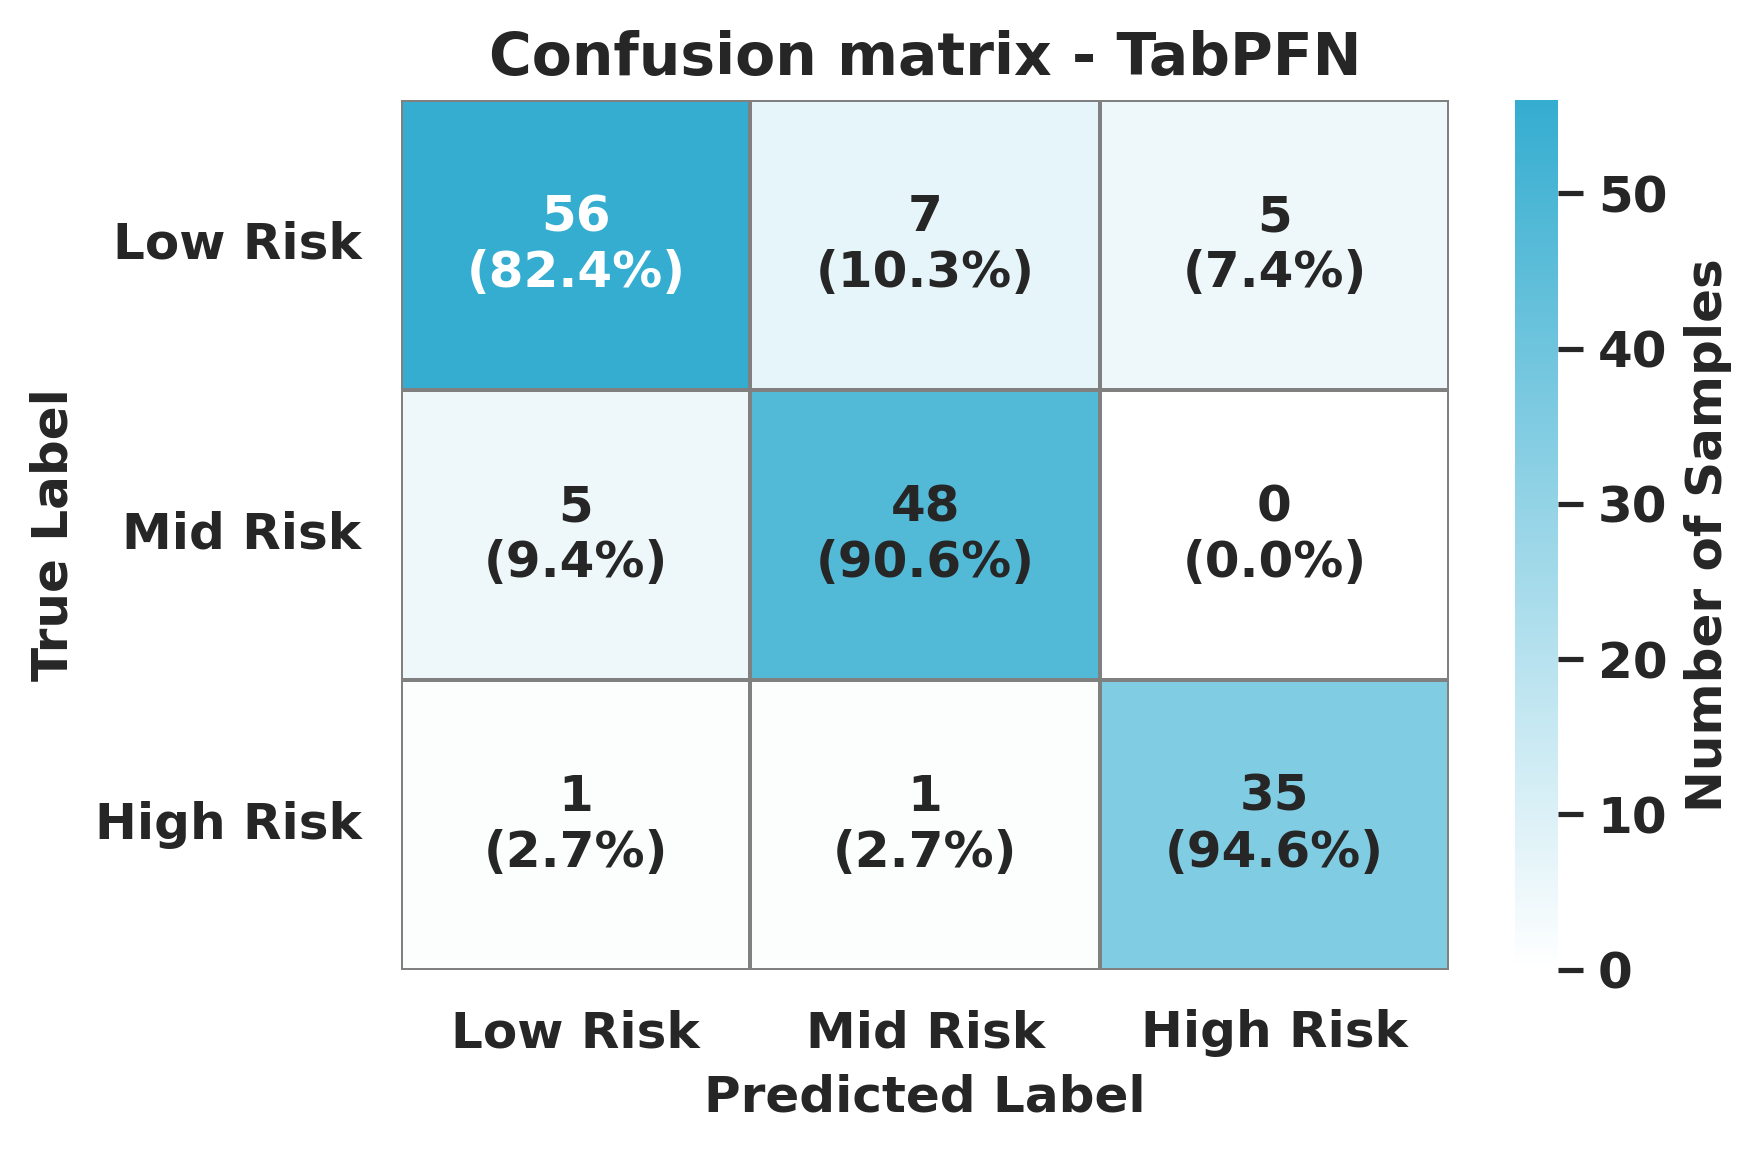

In [ ]:
risk_labels = ['Low Risk', 'Mid Risk', 'High Risk']
custom_cmap = LinearSegmentedColormap.from_list("custom_blue", ['#ffffff', '#35add0'])

sns.set_theme(style="white")
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'font.weight': 'bold',
    'axes.labelweight': 'bold'
})

def plot_conf_matrix(cm, model_name, class_labels, cmap=custom_cmap):
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)
    annot = np.empty_like(cm).astype(str)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annot[i, j] = f'{cm[i, j]}\n({cm_normalized[i, j]*100:.1f}%)'

    plt.figure(figsize=(6, 4), facecolor='white')
    sns.heatmap(
        cm, annot=annot, fmt='',
        xticklabels=class_labels,
        yticklabels=class_labels,
        cmap=cmap,
        linewidths=0.5, linecolor='gray',
        cbar_kws={'label': 'Number of Samples'}
    )

    plt.title(f'{model_name}', fontsize=14, fontweight='bold', family='DejaVu Sans')
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold', family='DejaVu Sans')
    plt.ylabel('True Label', fontsize=12, fontweight='bold', family='DejaVu Sans')
    plt.xticks(fontsize=12, fontweight='bold', family='DejaVu Sans')
    plt.yticks(fontsize=12, fontweight='bold', family='DejaVu Sans', rotation=0)

    cbar = plt.gcf().axes[-1]
    cbar.set_ylabel('Number of Samples', fontsize=12, fontweight='bold', family='Arial')
    cbar.tick_params(labelsize=12)

    plt.gca().set_facecolor('white')
    plt.tight_layout()

    filename = f'confusion_matrix_{model_name.replace(" ", "_")}.tif'
    plt.savefig(filename, dpi=600, format='tiff', bbox_inches='tight', facecolor='white')
    plt.show()

if 'TABPFN' in tuned_models:
    tabpfn_model = tuned_models['TABPFN']
    X_input = X_test if isinstance(X_test, pd.DataFrame) else pd.DataFrame(X_test)
    y_pred_tabpfn = tabpfn_model.predict(X_input)
    cm = confusion_matrix(y_test, y_pred_tabpfn)
    plot_conf_matrix(cm, 'Confusion matrix - TabPFN', risk_labels)
else:
    print("TABPFN model not found in tuned_models.")


##Evaluating The Statistical Significance of Cross-Validation AUC for Tuning




In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_auc_scores = {}

print("Calculating cross-validation AUC scores for all tuned models...\n")

for name, model in tuned_models.items():
    try:
        if name == 'TABPFN':
            auc_scores = []
            for train_idx, test_idx in cv.split(X, y):
                X_train, X_test = X.iloc[train_idx].values, X.iloc[test_idx].values
                y_train, y_test = y.iloc[train_idx].values, y.iloc[test_idx].values
                model.fit(X_train, y_train)
                y_probs = model.predict_proba(X_test)
                auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
                auc_scores.append(auc)
            auc_scores = np.array(auc_scores)
        else:
            auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc_ovr', n_jobs=-1)

        cv_auc_scores[name] = auc_scores
        print(f"{name}: Mean AUC = {np.mean(auc_scores):.4f}, Std = {np.std(auc_scores):.4f}")
    except Exception as e:
        print(f"Error calculating AUC for {name}: {e}")
        cv_auc_scores[name] = np.array([])

print("\nComparing all models to TABPFN using Wilcoxon signed-rank test:")

tabpfn_scores = cv_auc_scores.get('TABPFN')
wilcoxon_results = {}

for name, scores in cv_auc_scores.items():
    if name != 'TABPFN' and len(scores) == len(tabpfn_scores) and len(scores) > 0:
        stat, p_value = wilcoxon(scores, tabpfn_scores, zero_method='pratt', alternative='two-sided')
        wilcoxon_results[name] = {'Statistic': stat, 'P-value': p_value}
        significance = "Yes" if p_value < 0.05 else "No"
        print(f"{name} vs TABPFN → Statistic = {stat:.4f}, P-value = {p_value:.4f}, Significant: {significance}")
    elif name != 'TABPFN':
        print(f"Skipping Wilcoxon test for {name} due to invalid score array.")

wilcoxon_df = pd.DataFrame.from_dict(wilcoxon_results, orient='index')
wilcoxon_df['Significant (p < 0.05)'] = wilcoxon_df['P-value'] < 0.05

print("\nWilcoxon Signed-Rank Test Summary:\n")
print(wilcoxon_df)


Calculating cross-validation AUC scores for all tuned models...

DECISION TREE: Mean AUC = 0.9540, Std = 0.0292
RANDOM FOREST: Mean AUC = 0.9674, Std = 0.0291
MLP CLASSIFIER: Mean AUC = 0.7752, Std = 0.0392
XG BOOST: Mean AUC = 0.9683, Std = 0.0244
EXTRA TREES: Mean AUC = 0.9718, Std = 0.0176
SVC: Mean AUC = 0.8407, Std = 0.0412
ADA BOOST: Mean AUC = 0.8391, Std = 0.0248
GRADIENT BOOSTER: Mean AUC = 0.9349, Std = 0.0336
CATBOOST: Mean AUC = 0.9602, Std = 0.0272
LIGHTGBM: Mean AUC = 0.9728, Std = 0.0220
TABPFN: Mean AUC = 0.9726, Std = 0.0233

Comparing all models to TABPFN using Wilcoxon signed-rank test:
DECISION TREE vs TABPFN → Statistic = 3.0000, P-value = 0.0098, Significant: Yes
RANDOM FOREST vs TABPFN → Statistic = 7.0000, P-value = 0.0371, Significant: Yes
MLP CLASSIFIER vs TABPFN → Statistic = 0.0000, P-value = 0.0020, Significant: Yes
XG BOOST vs TABPFN → Statistic = 6.0000, P-value = 0.0273, Significant: Yes
EXTRA TREES vs TABPFN → Statistic = 23.0000, P-value = 0.6953, Sign

In [ ]:
cv_auc_df = pd.DataFrame(cv_auc_scores).T
cv_auc_df


0         1         2         3         4         5  \
DECISION TREE     0.880477  0.937415  0.950322  0.980085  0.948613  0.978909   
RANDOM FOREST     0.881288  0.969000  0.969067  0.984719  0.980675  0.978265   
MLP CLASSIFIER    0.743507  0.764604  0.734877  0.785180  0.739824  0.822355   
XG BOOST          0.897990  0.969443  0.961513  0.981967  0.987286  0.974258   
EXTRA TREES       0.924352  0.965205  0.971340  0.989122  0.987559  0.977091   
SVC               0.750595  0.821461  0.839443  0.861367  0.852397  0.846033   
ADA BOOST         0.802359  0.852176  0.801081  0.836255  0.826203  0.832428   
GRADIENT BOOSTER  0.844203  0.950160  0.916126  0.959115  0.933620  0.943084   
CATBOOST          0.884043  0.963512  0.946912  0.981333  0.966187  0.959858   
LIGHTGBM          0.908684  0.975499  0.967879  0.987093  0.986976  0.979920   
TABPFN            0.904829  0.978156  0.968313  0.990023  0.981434  0.976273   

                         6         7         8         9  
DECISION TREE     0.971130  0.962895  0.943352  0.986317  
RANDOM FOREST     0.974768  0.976713  0.978796  0.980998  
MLP CLASSIFIER    0.819631  0.846094  0.730968  0.764519  
XG BOOST          0.978930  0.973998  0.977343  0.980379  
EXTRA TREES       0.969244  0.974271  0.974128  0.986083  
SVC               0.886076  0.910716  0.819971  0.819149  
ADA BOOST         0.879381  0.875001  0.844855  0.840931  
GRADIENT BOOSTER  0.953703  0.970645  0.947680  0.930450  
CATBOOST          0.972388  0.976419  0.980310  0.971028  
LIGHTGBM          0.981087  0.978510  0.980599  0.981612  
TABPFN            0.977014  0.981683  0.987645  0.980673

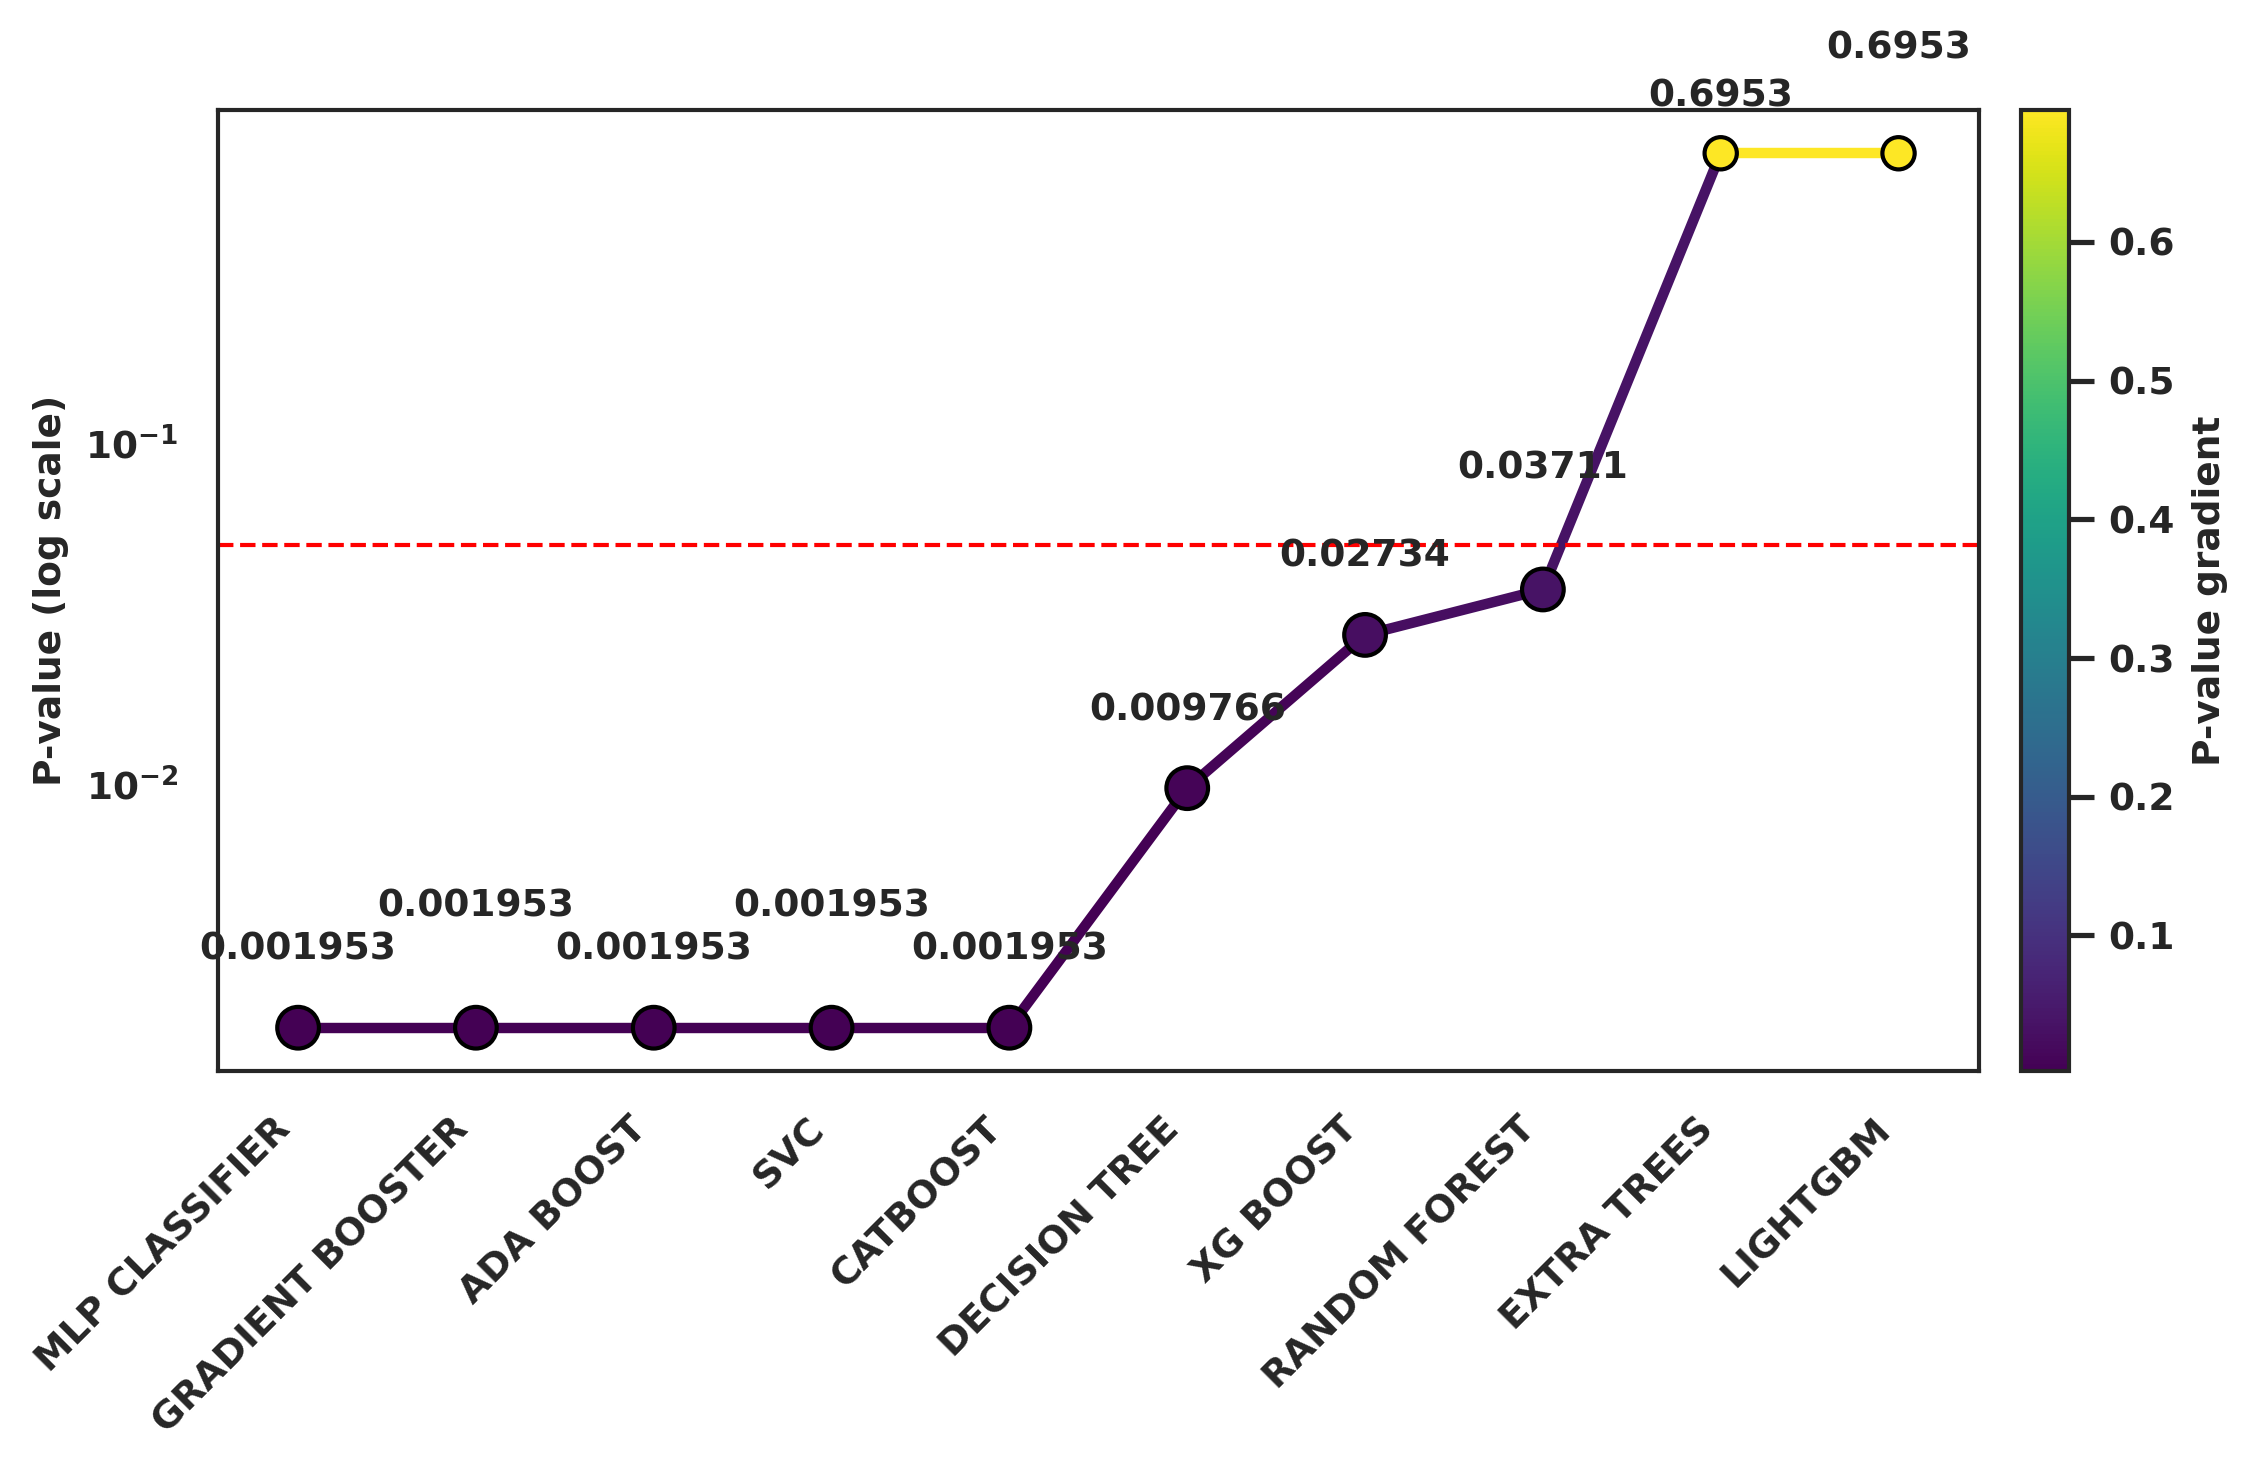

In [ ]:
wilcoxon_plot_df = pd.DataFrame({
    'Model': list(wilcoxon_results.keys()),
    'P_value': [wilcoxon_results[m]['P-value'] for m in wilcoxon_results]
}).sort_values('P_value')

sns.set_theme(style="white")
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'axes.linewidth': 1.0
})

norm = Normalize(vmin=wilcoxon_plot_df['P_value'].min(), vmax=wilcoxon_plot_df['P_value'].max())
cmap = plt.cm.viridis
colors = [cmap(norm(val)) for val in wilcoxon_plot_df['P_value']]

plt.figure(figsize=(8, 5))
ax = plt.gca()

for i in range(len(wilcoxon_plot_df)-1):
    ax.plot(
        [i, i+1],
        wilcoxon_plot_df['P_value'].iloc[i:i+2],
        color=cmap(norm(wilcoxon_plot_df['P_value'].iloc[i])),
        linewidth=2.5
    )

marker_sizes = [100 if val < 0.05 else 60 for val in wilcoxon_plot_df['P_value']]
scatter = ax.scatter(
    range(len(wilcoxon_plot_df)),
    wilcoxon_plot_df['P_value'],
    c=wilcoxon_plot_df['P_value'],
    cmap='viridis',
    s=marker_sizes,
    edgecolor='black',
    zorder=5
)

significance_threshold = 0.05
plt.axhline(y=significance_threshold, color='red', linestyle='--', linewidth=1)

y_positions = []
for i, val in enumerate(wilcoxon_plot_df['P_value']):
    offset = 0.3 * val if val > 0.05 else 0.5 * val
    if y_positions:
        min_distance = 0.5 * val
        if abs(val + offset - y_positions[-1]) < min_distance:
            offset += min_distance
    y_positions.append(val + offset)
    plt.text(i, val + offset, f"{val:.4g}", ha='center', va='bottom',
             fontsize=9, fontweight='bold', family='Arial')

plt.yscale('log')
plt.ylabel('P-value (log scale)', fontsize=9, fontweight='bold')
plt.xticks(range(len(wilcoxon_plot_df)), wilcoxon_plot_df['Model'], rotation=45, ha='right', fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('P-value gradient', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


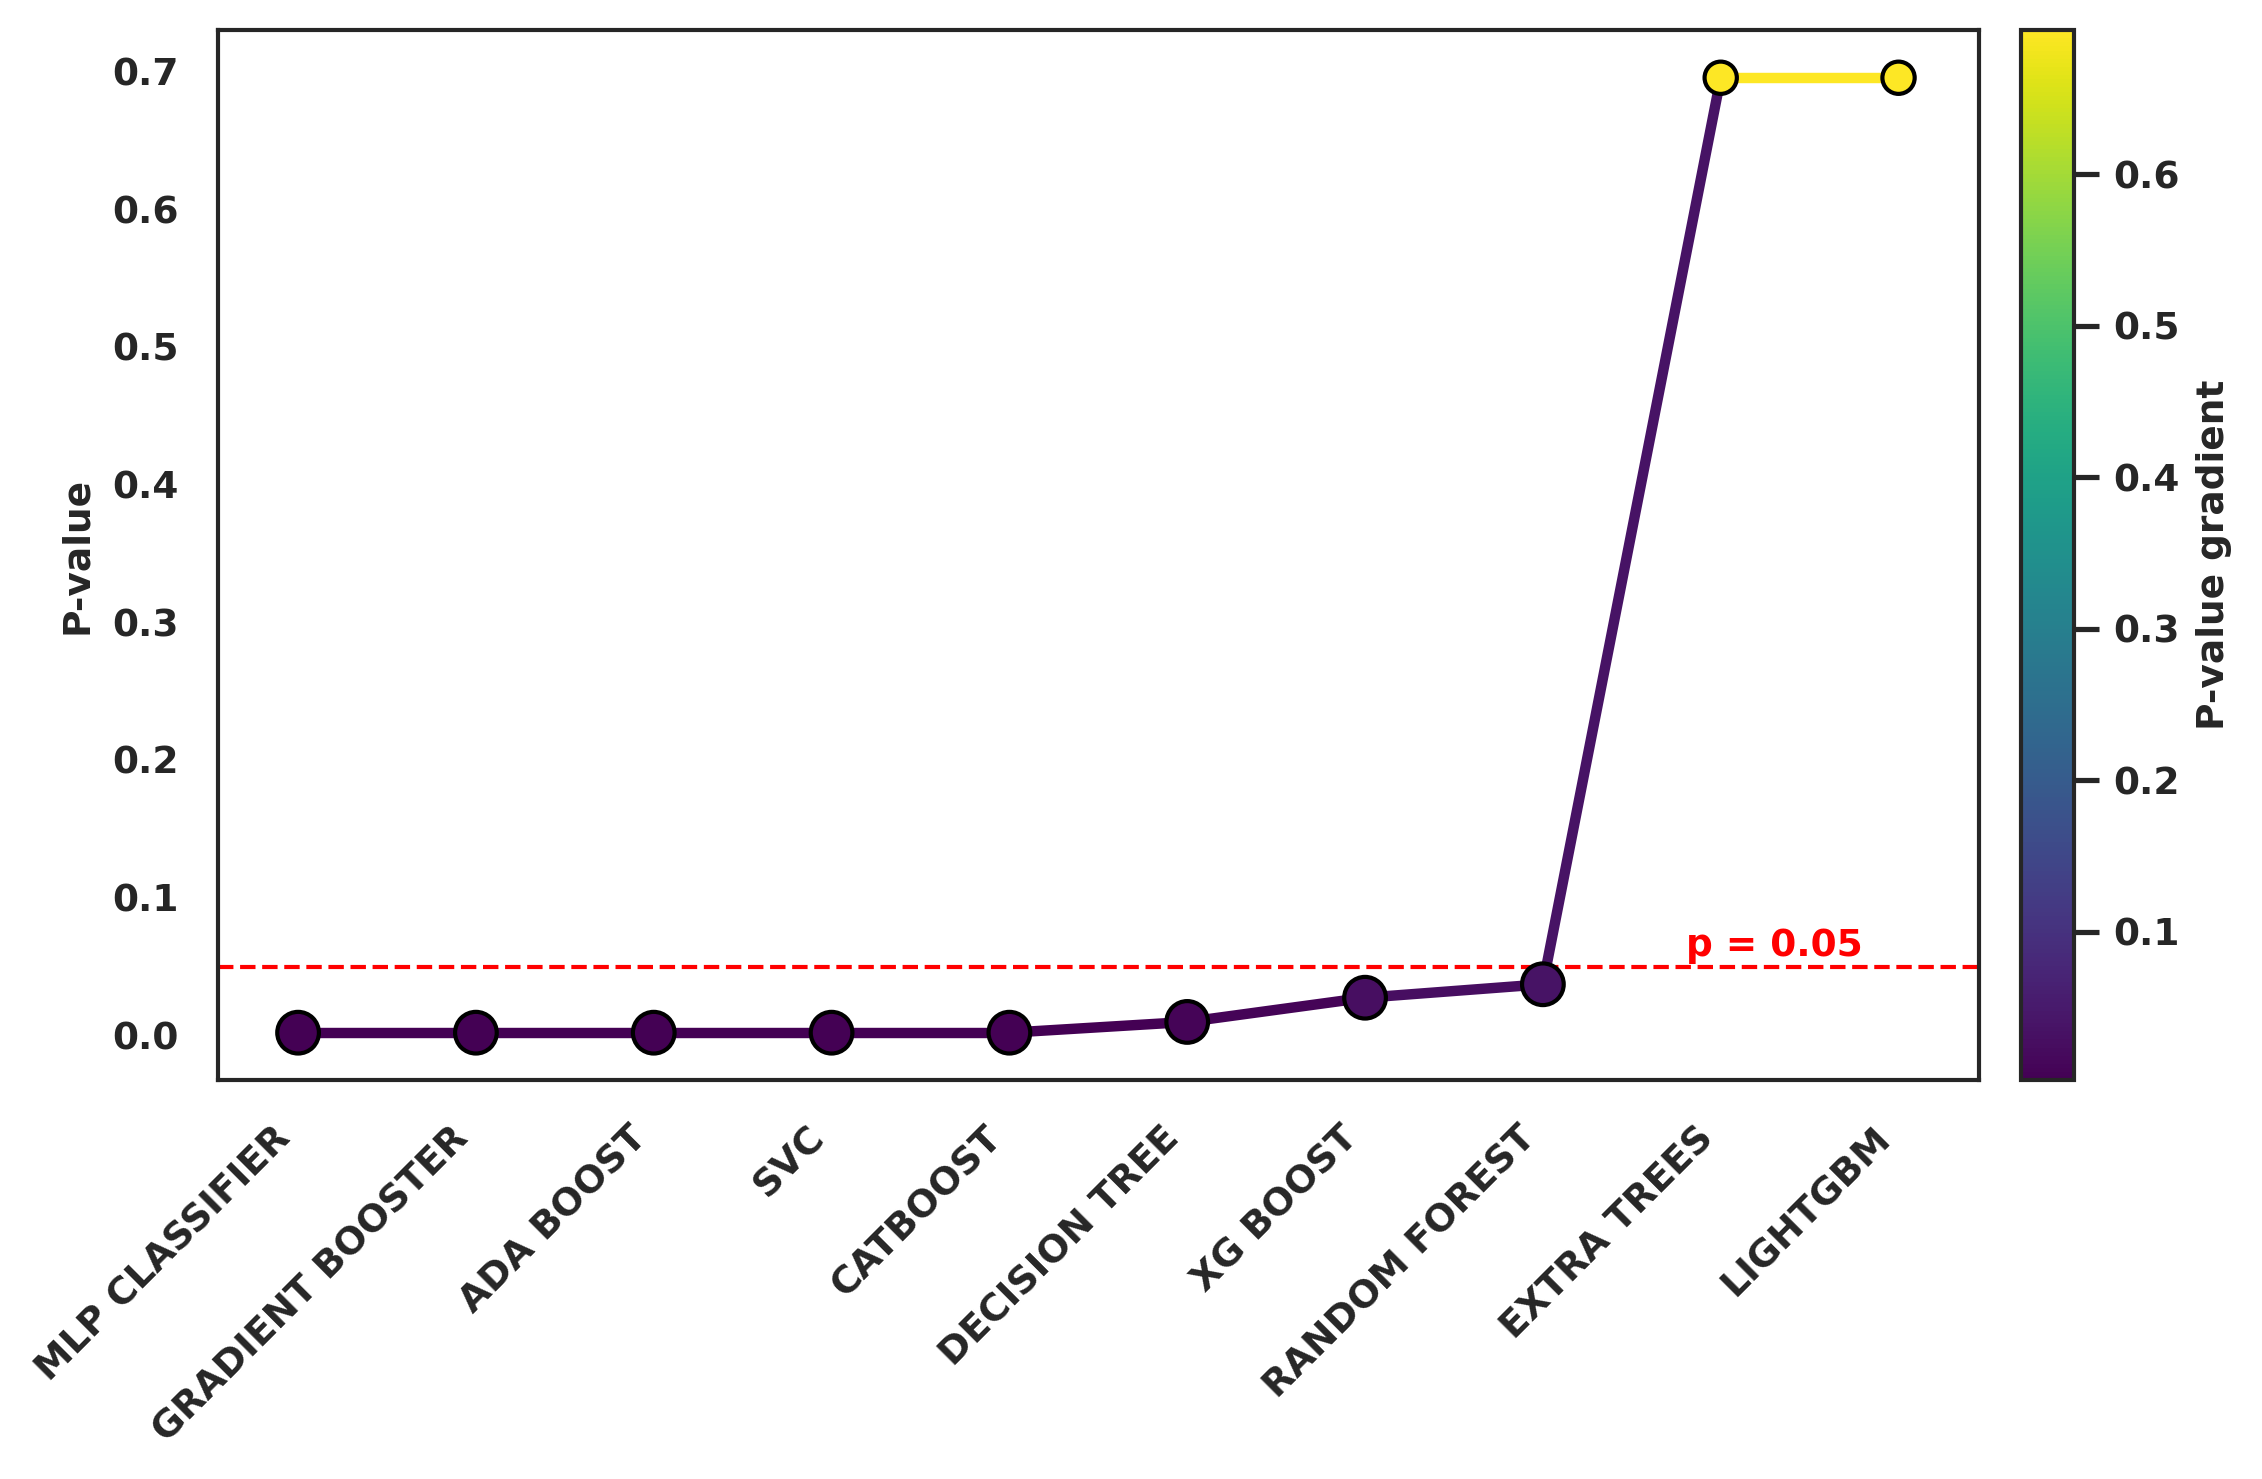

In [ ]:
# Simple Wilcoxon P-value plot

# Prepare DataFrame
wilcoxon_plot_df = pd.DataFrame({
    'Model': list(wilcoxon_results.keys()),
    'P_value': [wilcoxon_results[m]['P-value'] for m in wilcoxon_results]
}).sort_values('P_value')

# Plot setup
sns.set_theme(style="white")
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'axes.linewidth': 1.0
})

# Plot figure
plt.figure(figsize=(8, 5))
ax = plt.gca()

# Scatter plot of P-values
ax.scatter(
    range(len(wilcoxon_plot_df)),
    wilcoxon_plot_df['P_value'],
    color='tab:blue',
    s=70,
    edgecolor='black'
)

# Significance threshold
plt.axhline(y=0.05, color='red', linestyle='--', linewidth=1)
plt.ylabel('P-value', fontsize=9, fontweight='bold')
plt.xticks(
    range(len(wilcoxon_plot_df)),
    wilcoxon_plot_df['Model'],
    rotation=45, ha='right',
    fontsize=9, fontweight='bold'
)
plt.yticks(fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


# Model explanation

##Global explanation using SHAP

Interpret the model's predictions to understand the impact of each feature using SHAP (SHapley Additive exPlanations).

SHAP for TABPFN model

Explaining predictions with SHAP...


  0%|          | 0/25 [00:00<?, ?it/s]

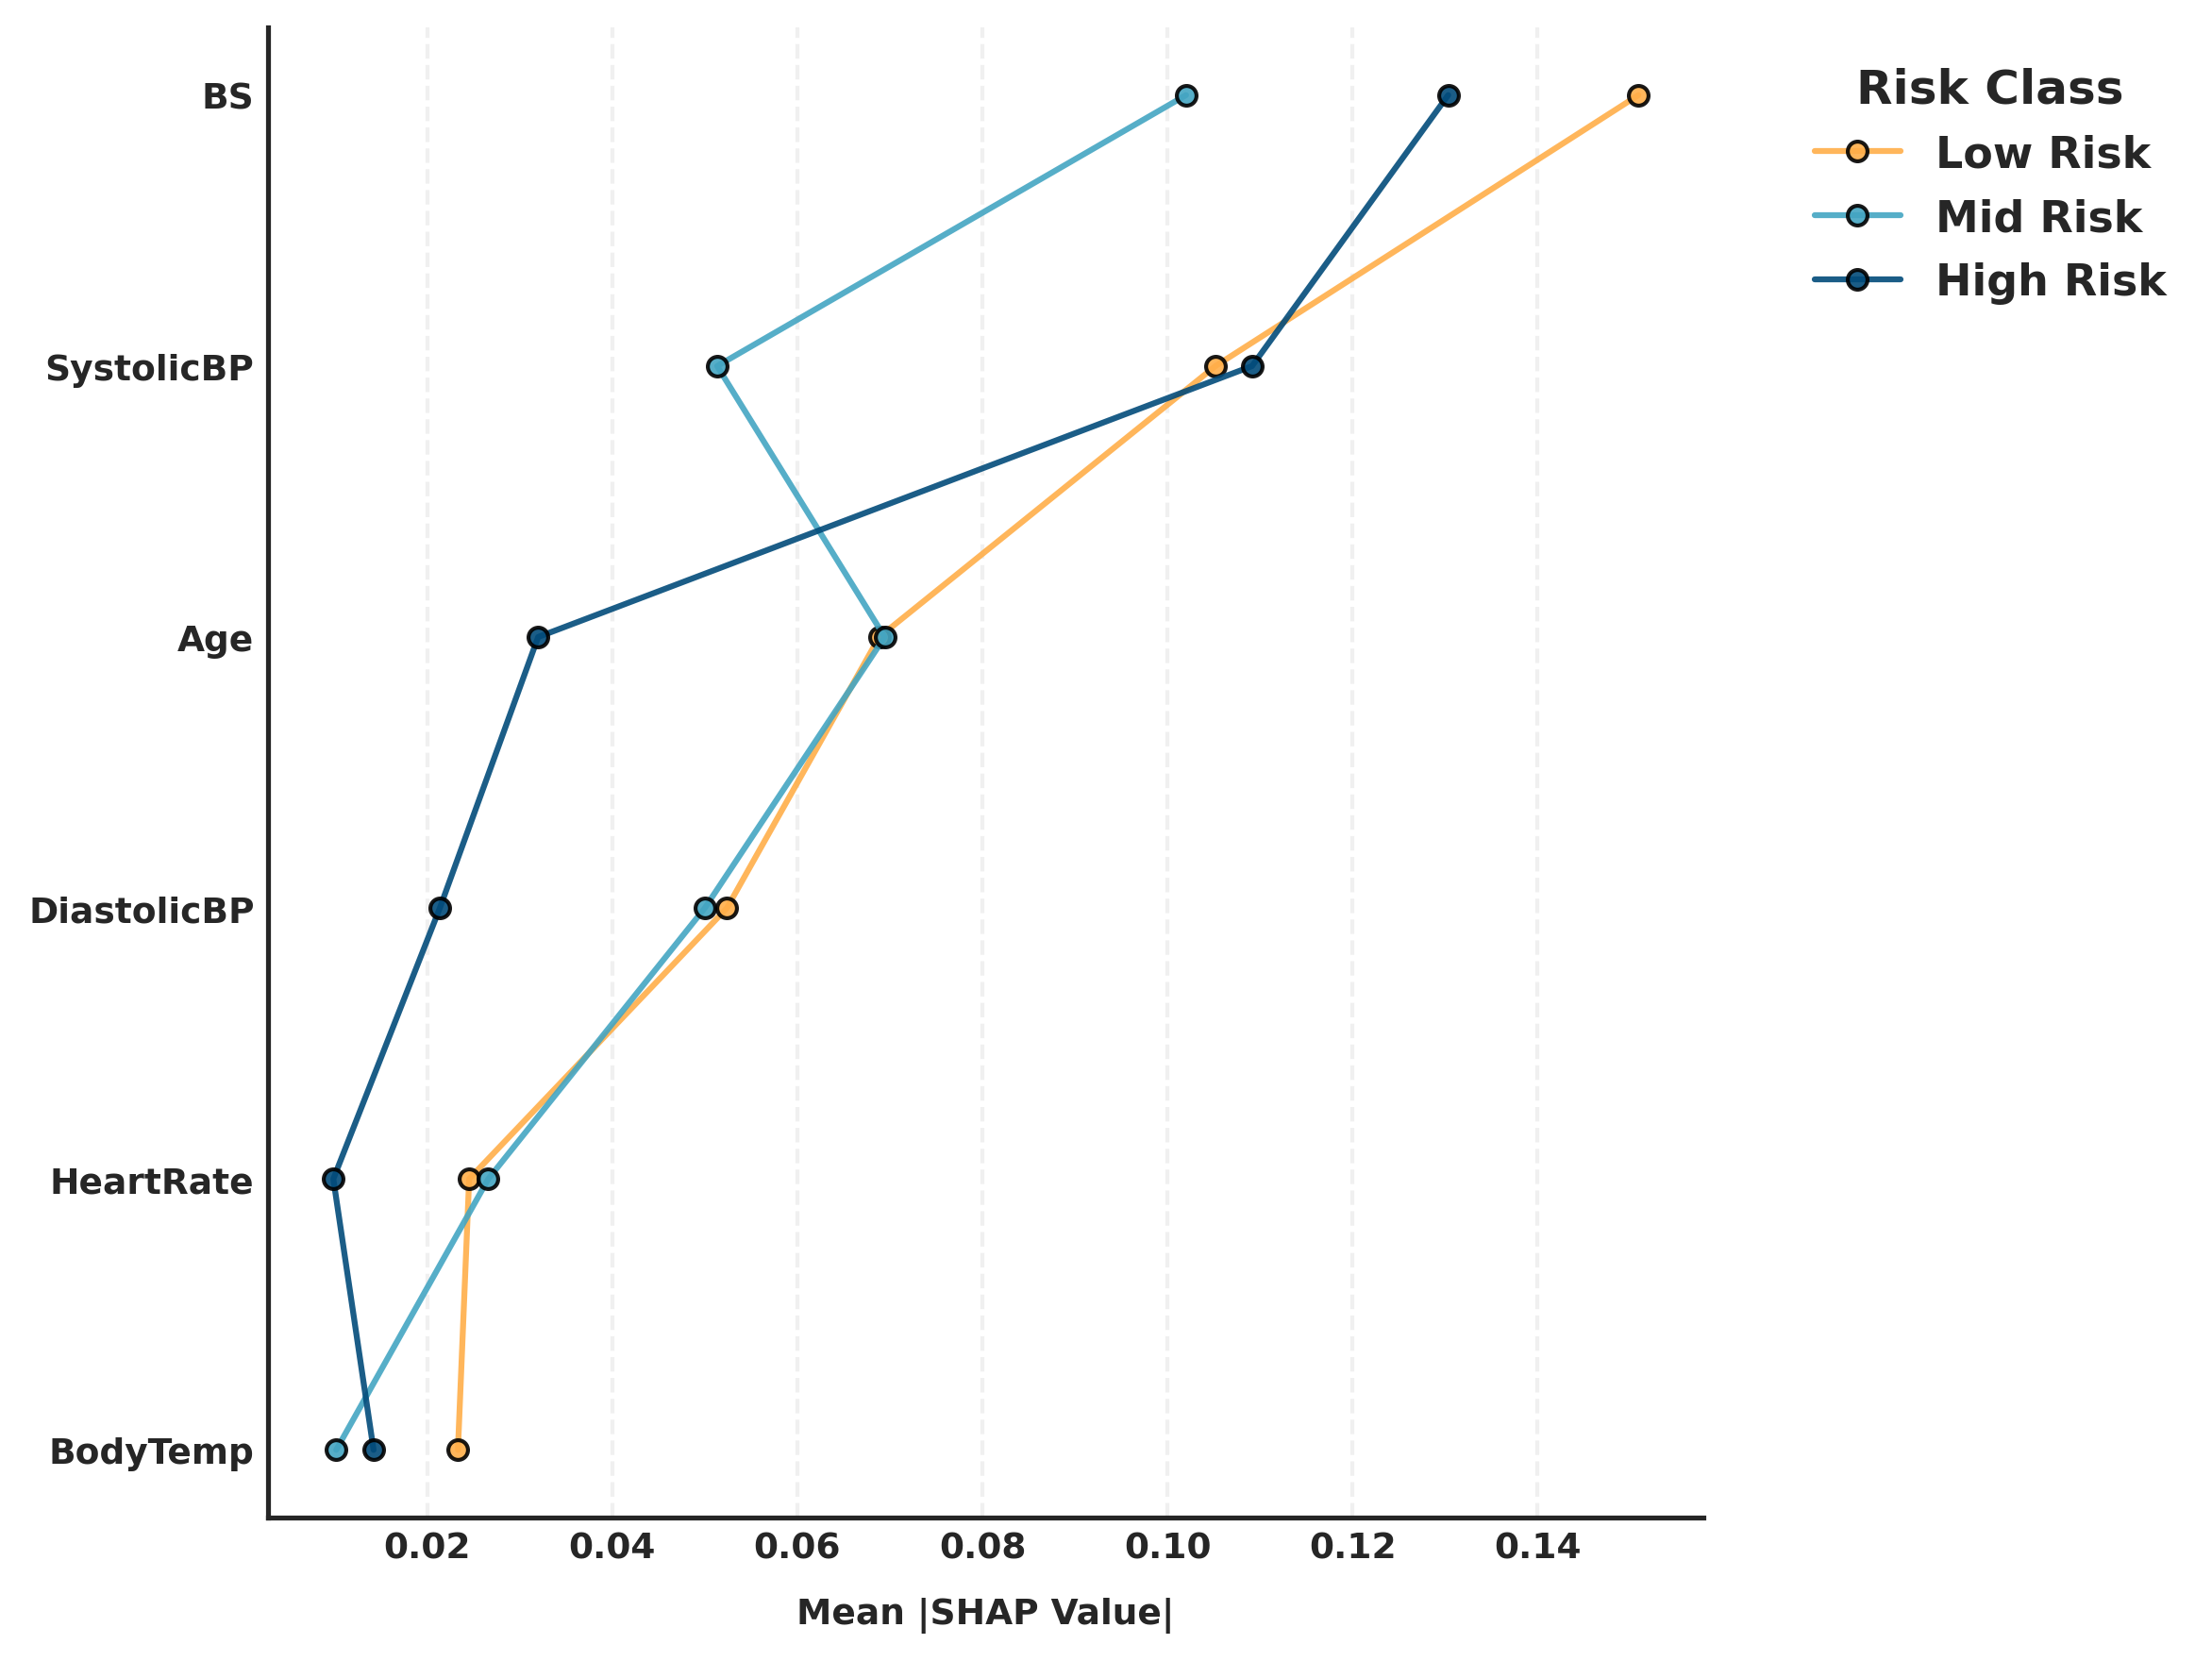

In [ ]:
from tabpfn import TabPFNClassifier

feature_names = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=feature_names)

tabpfn_model = TabPFNClassifier(device='cpu')
tabpfn_model.fit(X_train, y_train)

np.random.seed(42)
n_samples = min(25, X_test.shape[0])
sample_indices = np.random.choice(X_test.shape[0], n_samples, replace=False)
sample_X = X_test.iloc[sample_indices, :]

explainer = shap.KernelExplainer(tabpfn_model.predict_proba, sample_X)
shap_values = explainer.shap_values(sample_X)

if isinstance(shap_values, list):
    processed_shap_values = shap_values
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    processed_shap_values = [shap_values[:, :, i] for i in range(shap_values.shape[2])]
else:
    raise ValueError("Unexpected SHAP value format")

class_names = ['Low Risk', 'Mid Risk', 'High Risk']

mean_shap_per_class = [np.mean(np.abs(sv), axis=0) for sv in processed_shap_values]
total_importance = np.sum(mean_shap_per_class, axis=0)
sorted_idx = np.argsort(-total_importance)
sorted_feature_names = np.array(feature_names)[sorted_idx]
sorted_shap_values_for_plot = [vals[sorted_idx] for vals in mean_shap_per_class]

sns.set_theme(style='white')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 11,
    'axes.labelsize': 11,
    'axes.labelweight': 'bold',
    'axes.titlesize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'axes.linewidth': 1.25,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.figsize': (8, 6),
    'axes.grid': True,
    'grid.color': '#d0d0d0',
    'grid.linestyle': '--',
    'grid.alpha': 0.4,
})

palette = ['#ffae49', '#44a5c2', '#024b7a']
fig, ax = plt.subplots()

for i, class_name in enumerate(class_names):
    ax.plot(
        sorted_shap_values_for_plot[i],
        sorted_feature_names,
        marker='o',
        linestyle='-',
        label=class_name,
        color=palette[i],
        linewidth=1.5,
        markersize=5,
        markerfacecolor=palette[i],
        markeredgecolor='black',
        alpha=0.9
    )

ax.set_xlabel('Mean |SHAP Value|', fontsize=9, fontweight='bold', family='Arial', labelpad=8)
ax.invert_yaxis()
ax.legend(title="Risk Class", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
ax.grid(True, which='major', axis='x', linestyle='--', alpha=0.3)
ax.grid(False, axis='y')

plt.xticks(fontsize=9, fontweight='bold', family='Arial')
plt.yticks(fontsize=9, fontweight='bold', family='Arial')
plt.tight_layout()
plt.show()


SHAP for the stacked ensemble model

Computing SHAP values for stacked model (this may take a while)...


  0%|          | 0/50 [00:00<?, ?it/s]

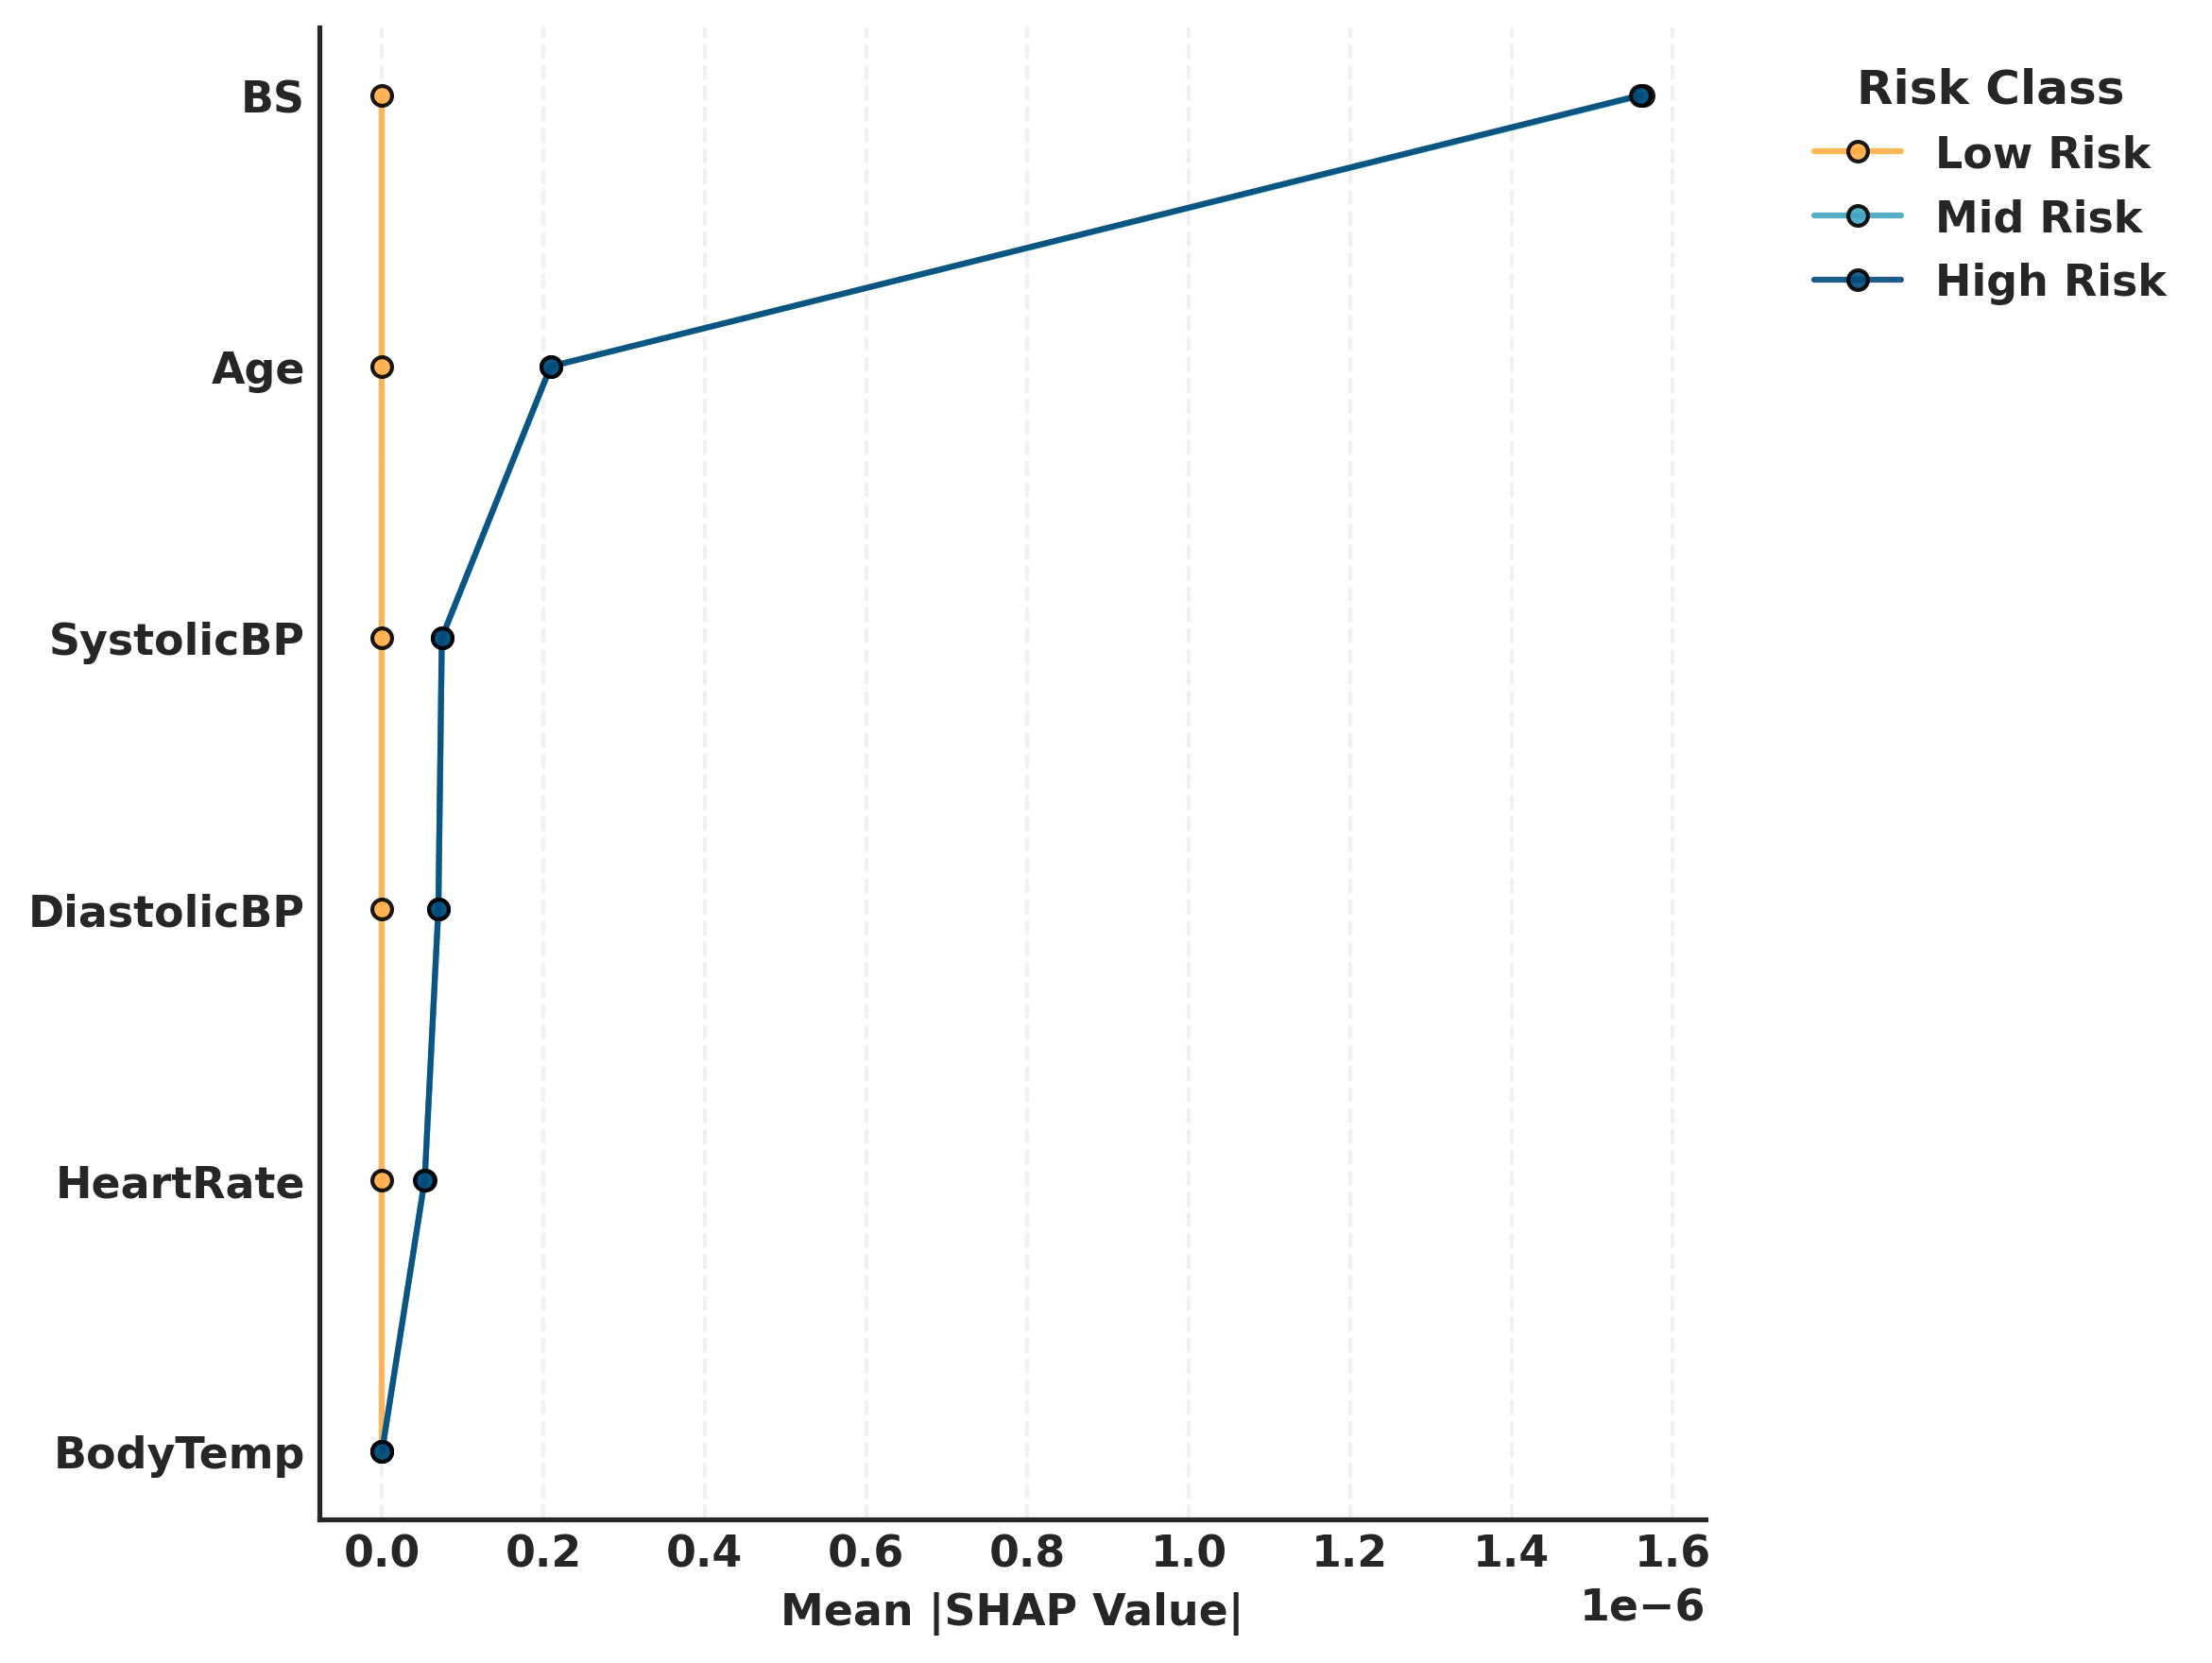

In [ ]:
import shap

feature_names = X_train.columns.tolist() if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=feature_names)

def stacked_predict_proba(X):
    return stacked_model.predict_proba(X)

np.random.seed(42)
n_samples = min(50, X_test.shape[0])
sample_indices = np.random.choice(X_test.shape[0], n_samples, replace=False)
sample_X = X_test.iloc[sample_indices, :]

background = X_train.sample(n=min(100, len(X_train)), replace=False)
explainer = shap.KernelExplainer(stacked_predict_proba, background)

print("Computing SHAP values for stacked model (this may take a while)...")
shap_values = explainer.shap_values(sample_X)

if isinstance(shap_values, list):
    processed_shap_values = shap_values
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    processed_shap_values = [shap_values[:, :, i] for i in range(shap_values.shape[2])]
else:
    raise ValueError(f"Unexpected SHAP value format: {type(shap_values)}, shape={getattr(shap_values, 'shape', None)}")

class_names = ['Low Risk', 'Mid Risk', 'High Risk']
palette = ['#ffae49', '#44a5c2', '#024b7a']

mean_shap_per_class = [np.mean(np.abs(sv), axis=0) for sv in processed_shap_values]
total_importance = np.sum(mean_shap_per_class, axis=0)
sorted_idx = np.argsort(-total_importance)
sorted_feature_names = np.array(feature_names)[sorted_idx]
sorted_shap_values_for_plot = [vals[sorted_idx] for vals in mean_shap_per_class]

sns.set_theme(style='white')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 11,
    'axes.labelsize': 11,
    'axes.labelweight': 'bold',
    'axes.titlesize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'axes.linewidth': 1.25,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.figsize': (8, 6),
    'axes.grid': True,
    'grid.color': '#d0d0d0',
    'grid.linestyle': '--',
    'grid.alpha': 0.4,
})

fig, ax = plt.subplots()

for i in range(len(class_names)):
    ax.plot(
        sorted_shap_values_for_plot[i],
        sorted_feature_names,
        marker='o',
        linestyle='-',
        label=class_names[i],
        color=palette[i],
        linewidth=1.5,
        markersize=5,
        markerfacecolor=palette[i],
        markeredgecolor='black',
        alpha=0.9
    )

ax.set_xlabel('Mean |SHAP Value|', fontsize=11, fontweight='bold', family='Arial')
ax.invert_yaxis()
ax.legend(title="Risk Class", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
ax.grid(True, which='major', axis='x', linestyle='--', alpha=0.3)
ax.grid(False, axis='y')

plt.xticks(fontsize=11, fontweight='bold', family='Arial')
plt.yticks(fontsize=11, fontweight='bold', family='Arial')
plt.tight_layout()
plt.show()


## Local (Individual) level explantion using LIME

Provide instance-level explanations to understand specific predictions using LIME (Local Interpretable Model-agnostic Explanations).

LIME for TabPFN

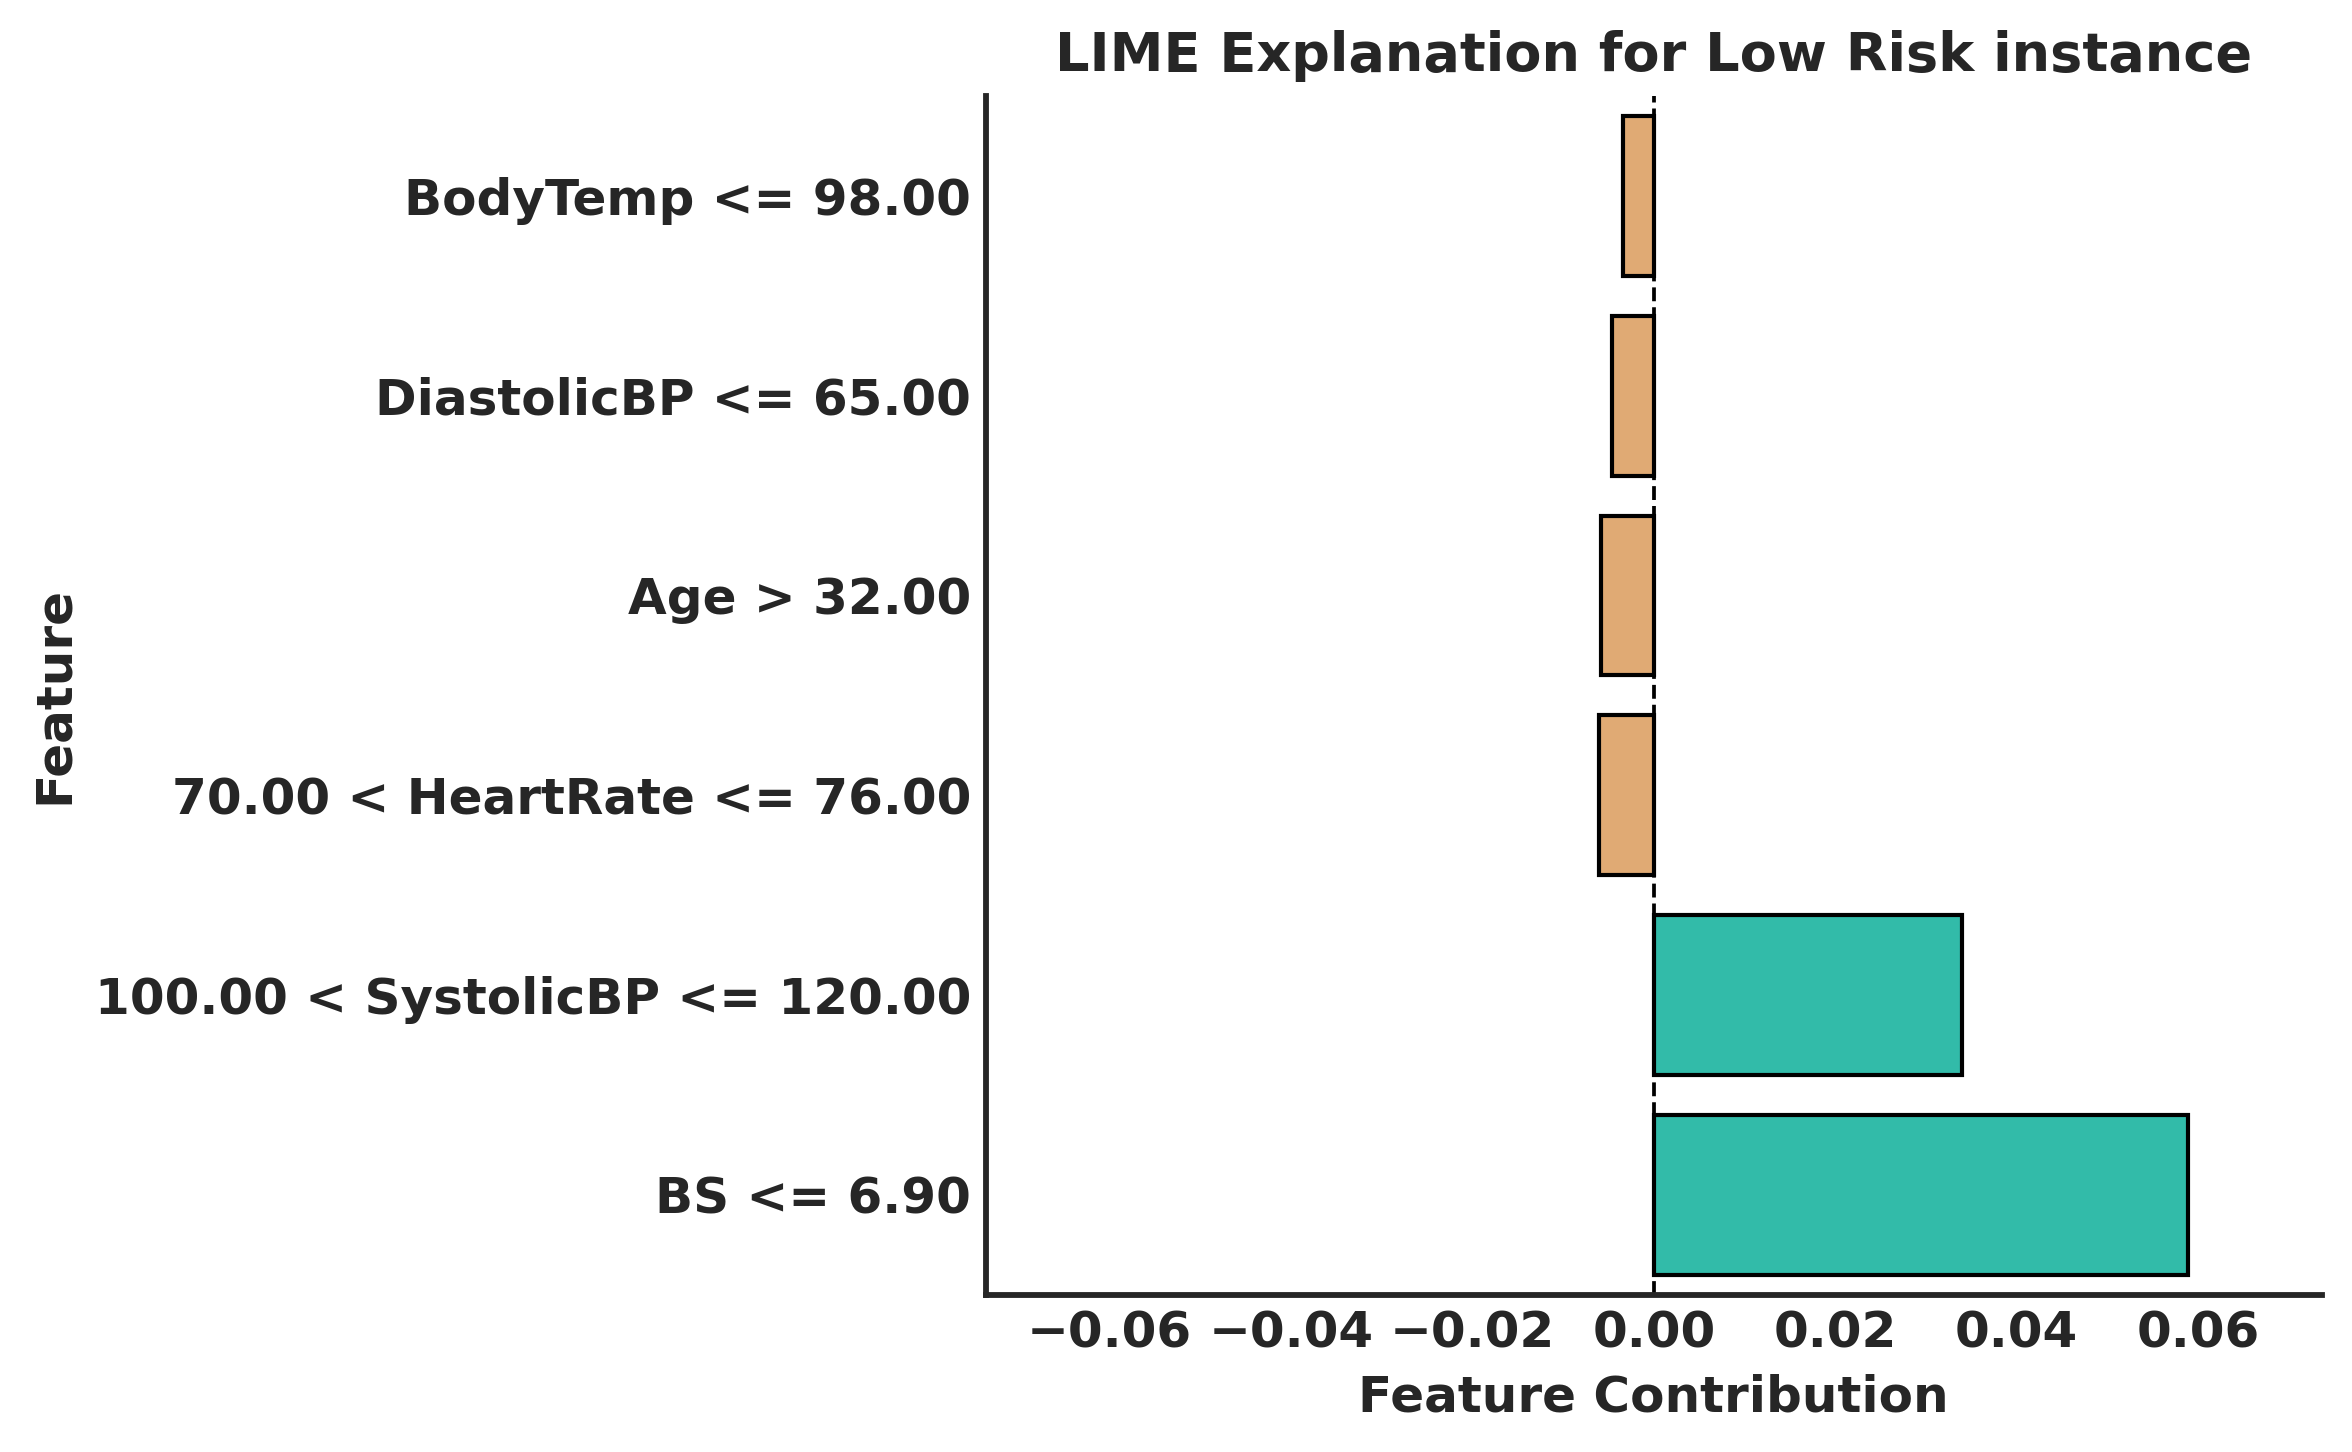

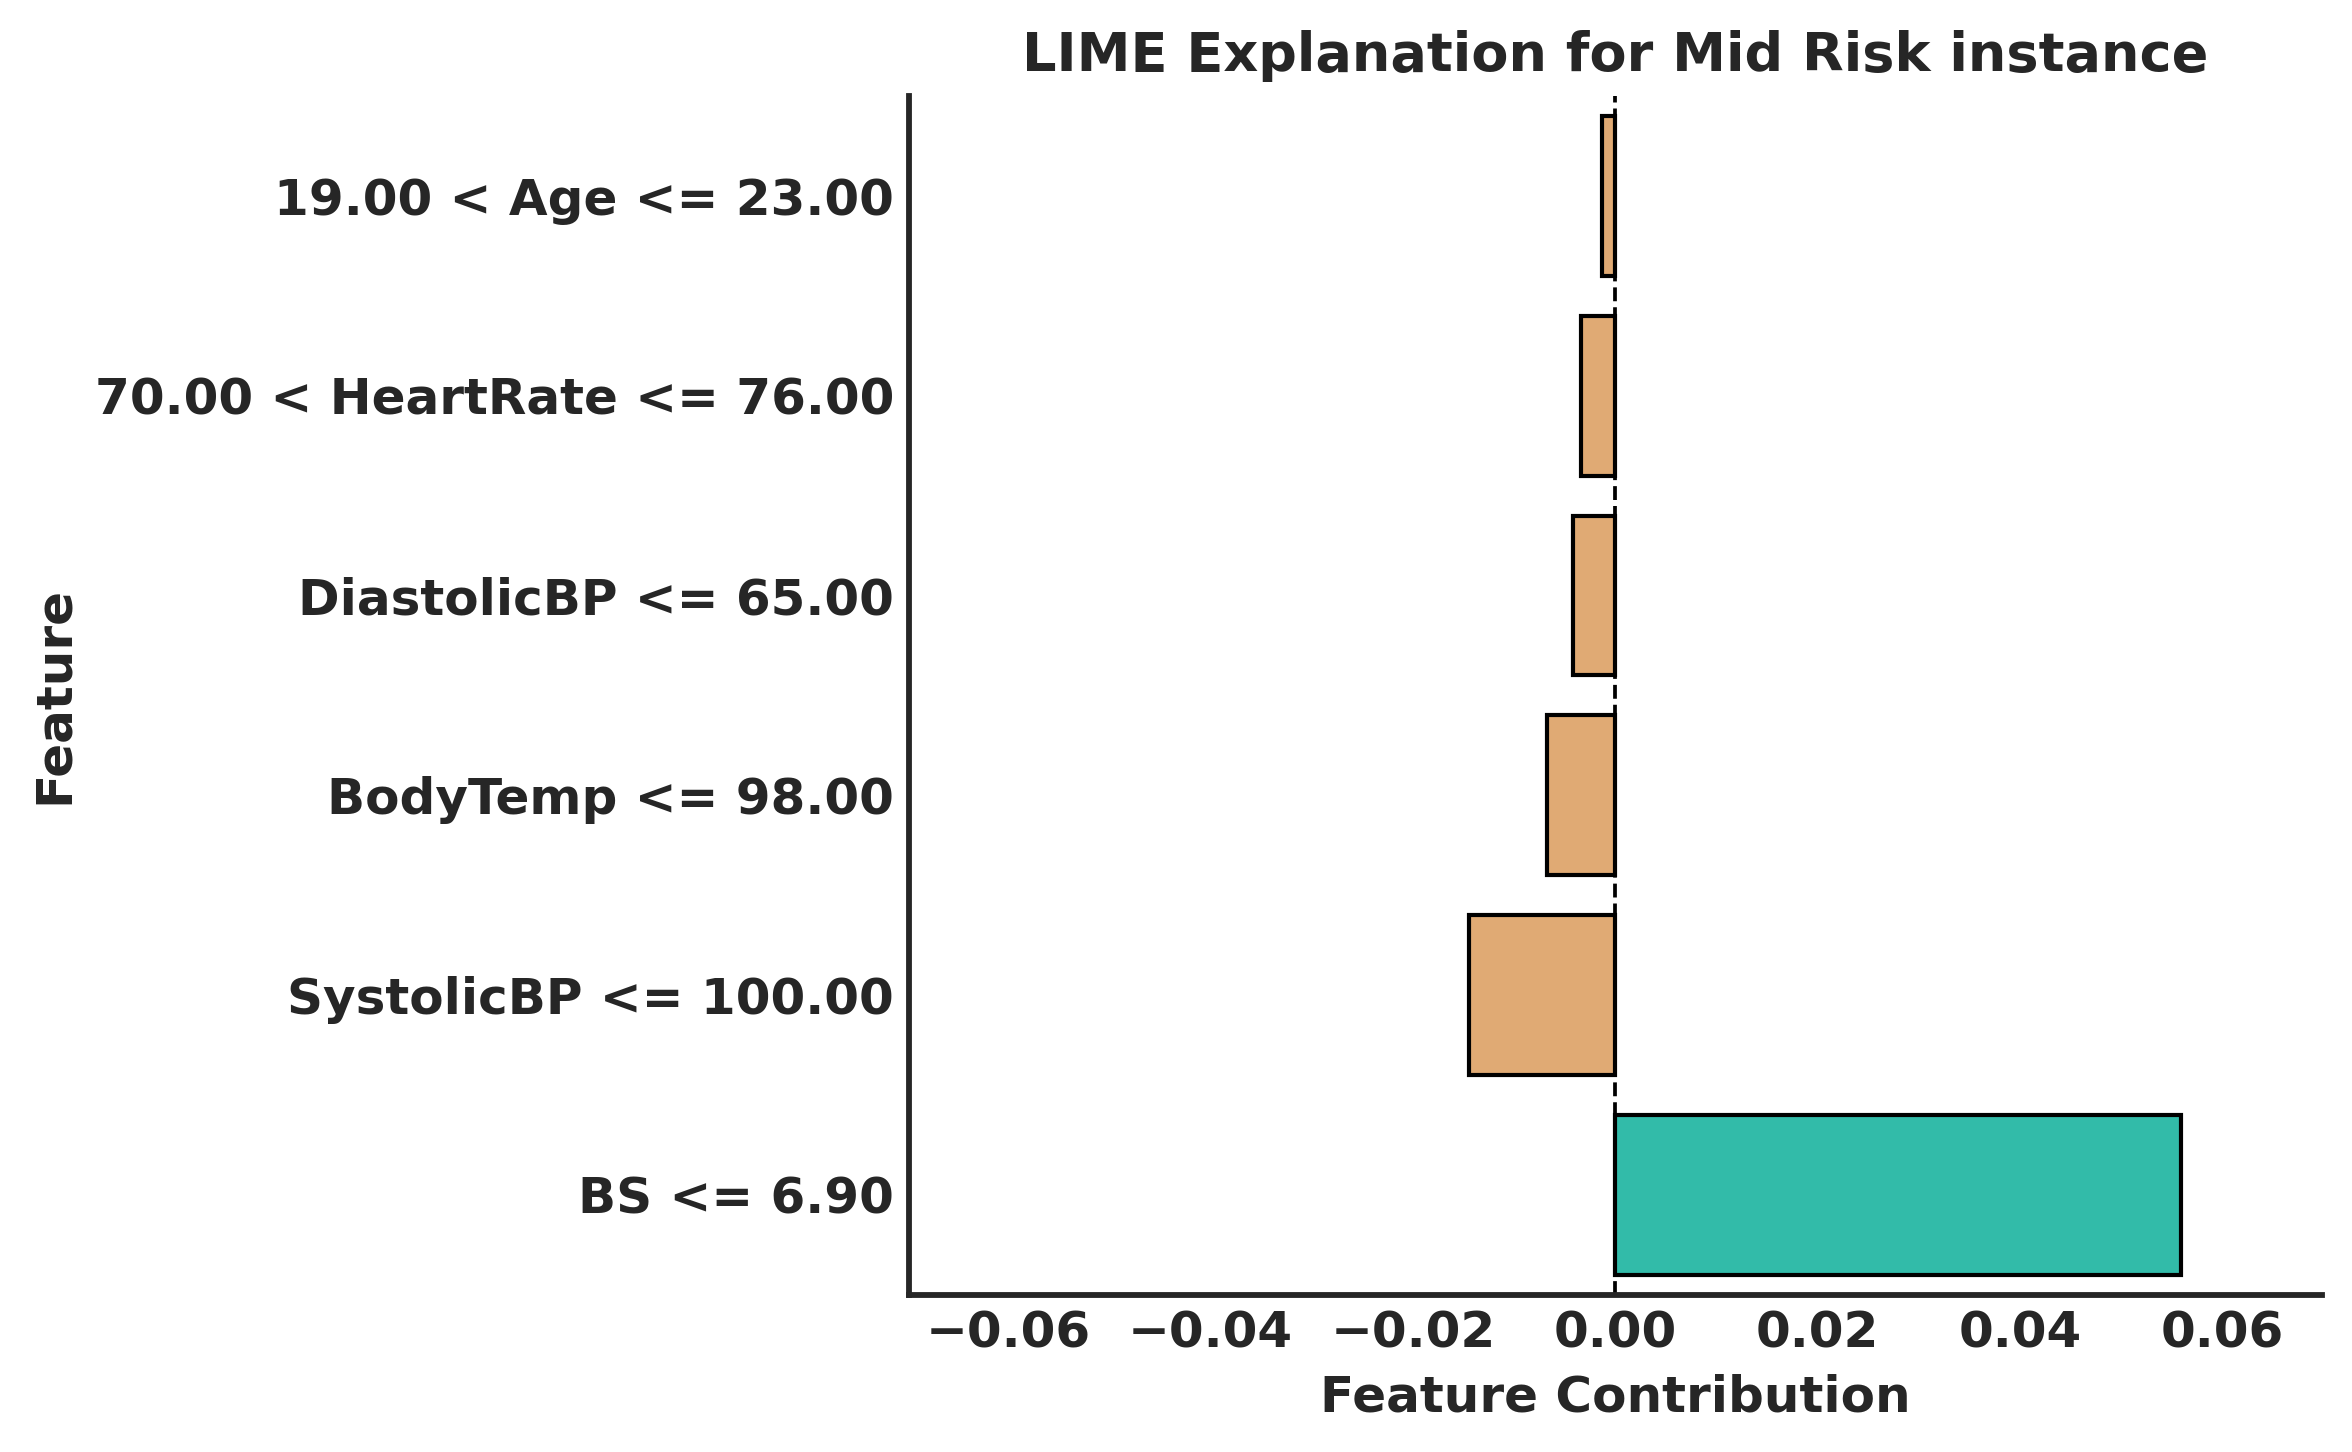

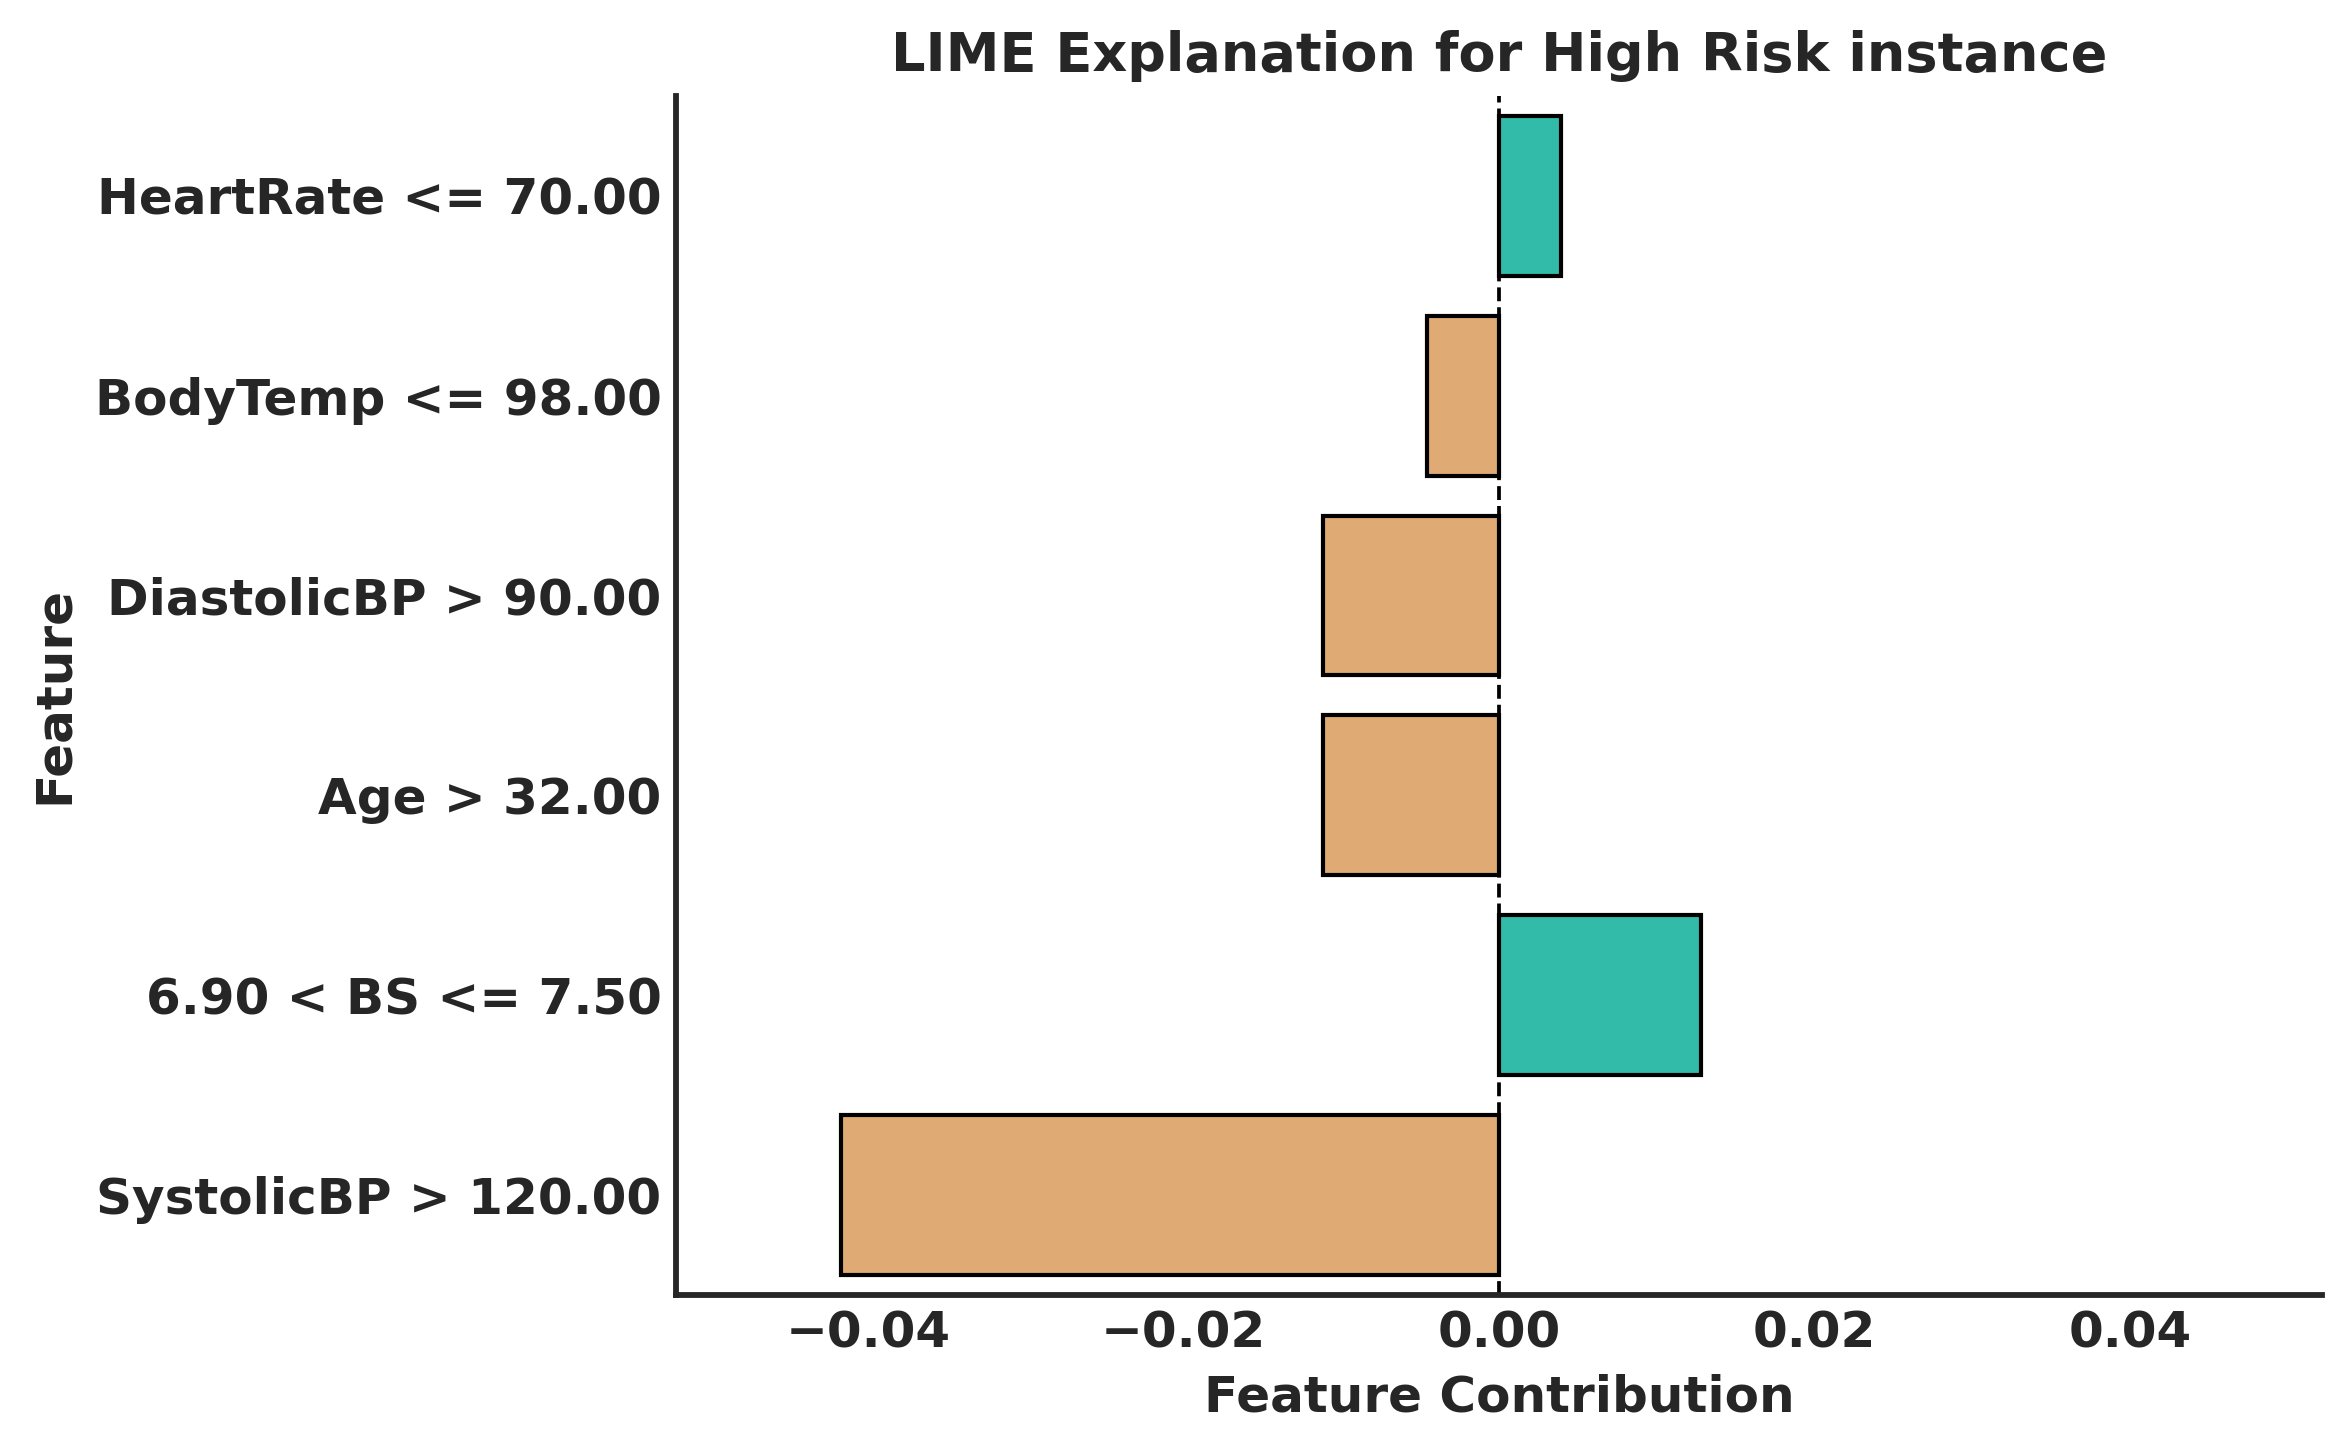

In [ ]:
sns.set_theme(style='white')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 9,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'axes.linewidth': 1.4,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'axes.spines.top': False,
    'axes.spines.right': False
})

feature_names = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=feature_names)

y_test = np.array(y_test)
class_labels = {0: 'Low Risk', 1: 'Mid Risk', 2: 'High Risk'}

tabpfn = TabPFNClassifier(device='cpu')
tabpfn.fit(X_train, y_train)

explainer_tabpfn = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=feature_names,
    class_names=['Low Risk', 'Mid Risk', 'High Risk'],
    discretize_continuous=True
)

selected_indices = [np.where(y_test == cls)[0][0] for cls in np.unique(y_test)]

for instance_index in selected_indices:
    instance = X_test.iloc[instance_index].values
    explanation_tabpfn = explainer_tabpfn.explain_instance(
        data_row=instance,
        predict_fn=tabpfn.predict_proba,
        num_features=len(feature_names)
    )

    exp_list = explanation_tabpfn.as_list()
    features = [f[0] for f in exp_list]
    weights = [f[1] for f in exp_list]
    df_exp = pd.DataFrame({'Feature': features, 'Weight': weights}).sort_values(
        by='Weight', key=abs, ascending=True
    )

    colors = ['#f2aa62' if w < 0 else '#1bd2ba' for w in df_exp['Weight']]

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(
        data=df_exp,
        x='Weight',
        y='Feature',
        palette=colors,
        edgecolor='black',
        ax=ax
    )

    max_val = max(abs(df_exp['Weight'].max()), abs(df_exp['Weight'].min()))
    margin = 0.25 * max_val
    ax.set_xlim(-max_val - margin, max_val + margin)

    ax.set_title(f'LIME Explanation for {class_labels[y_test[instance_index]]} instance',
                 fontweight='bold', fontsize=13, family='Arial')
    ax.set_xlabel('Feature Contribution', fontweight='bold', fontsize=12, family='Arial')
    ax.set_ylabel('Feature', fontweight='bold', fontsize=12, family='Arial')

    for label in ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(12)
        label.set_family('Arial')
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(12)
        label.set_family('Arial')

    ax.axvline(0, color='black', linestyle='--', linewidth=0.9)
    sns.despine()
    plt.tight_layout()
    plt.show()


LIME for Stacked Ensemble

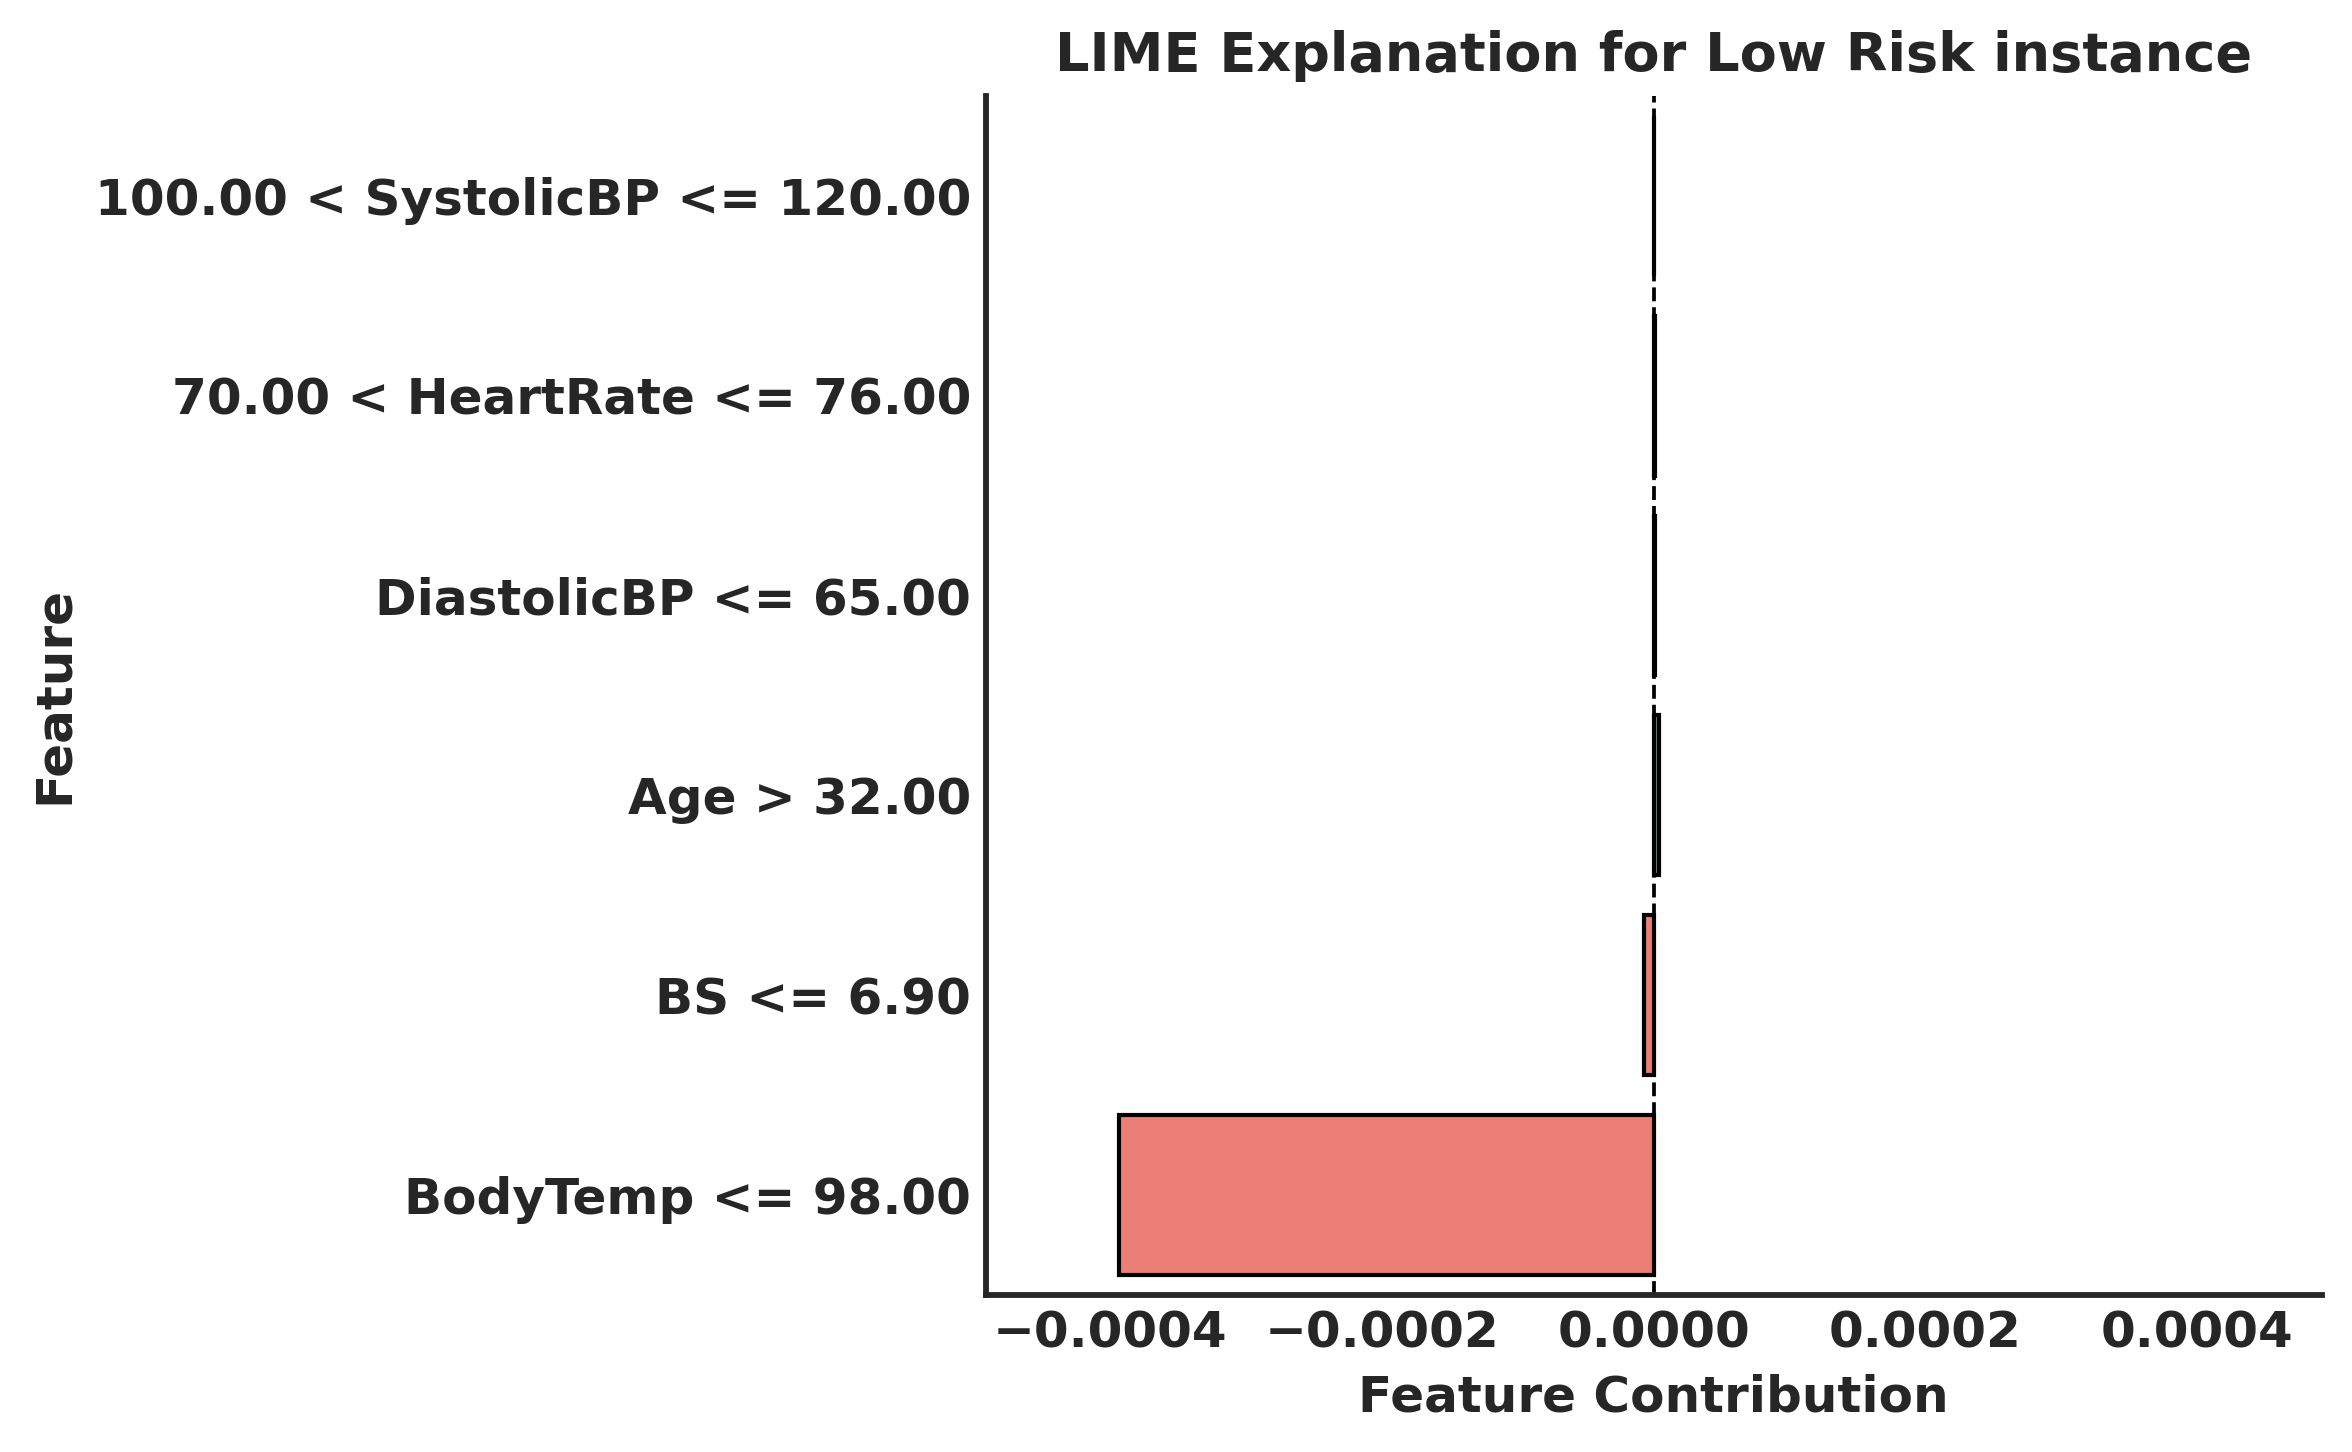

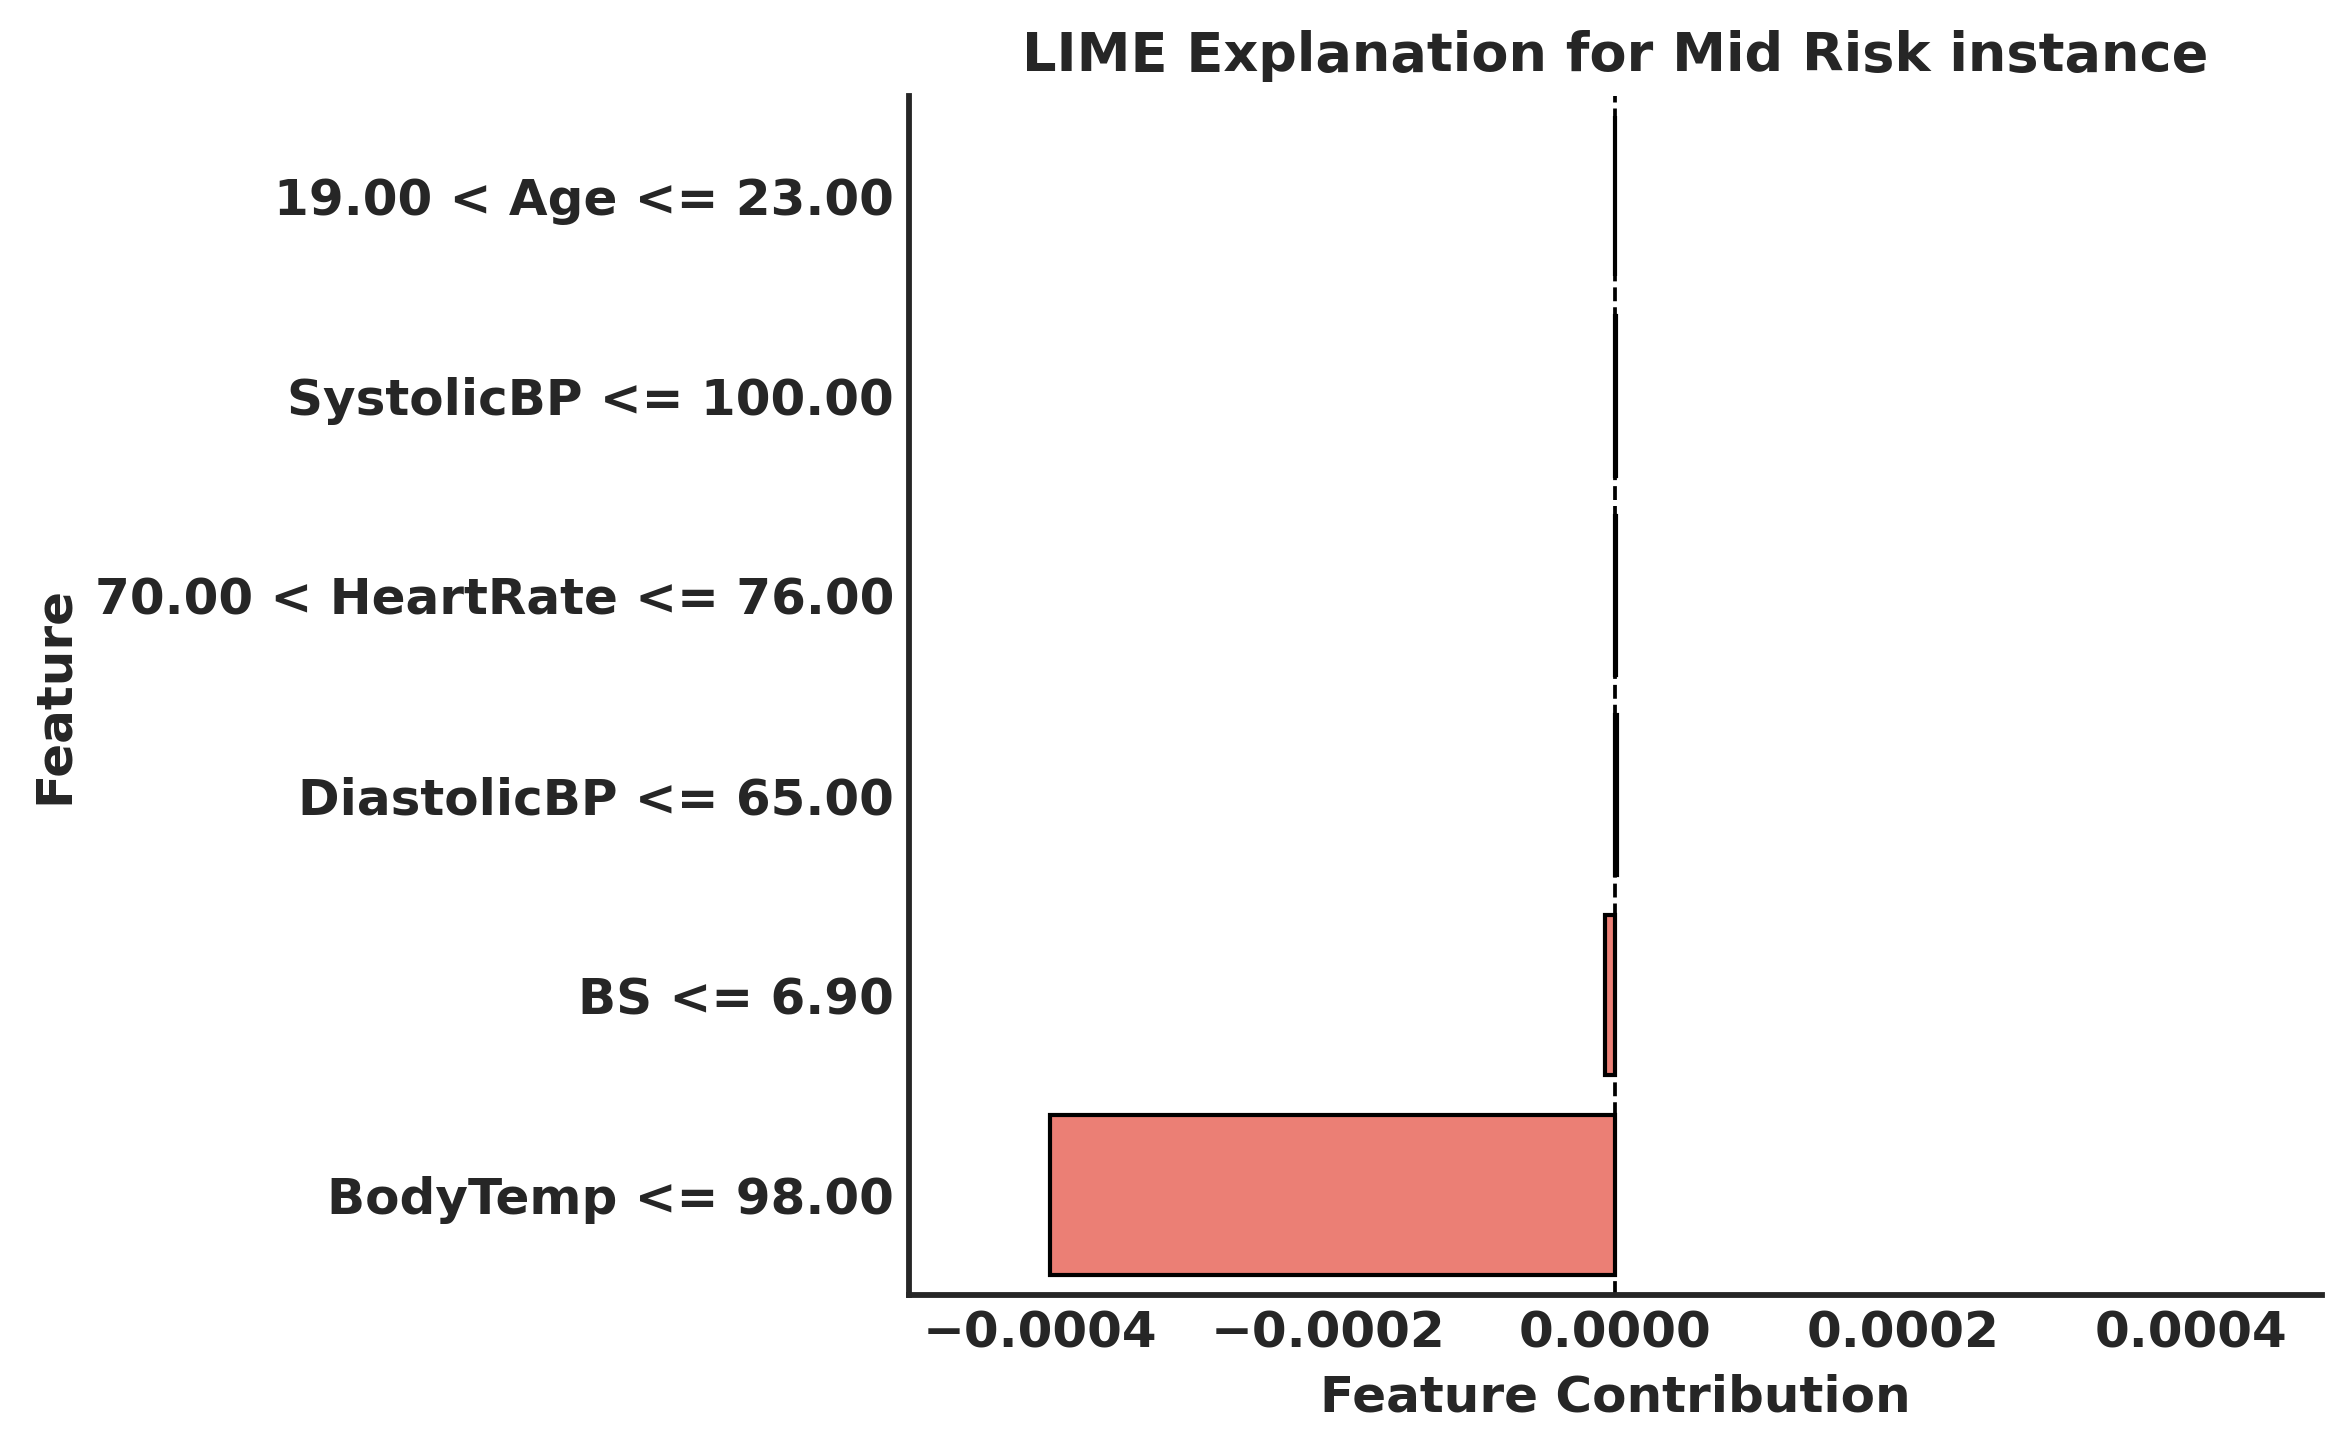

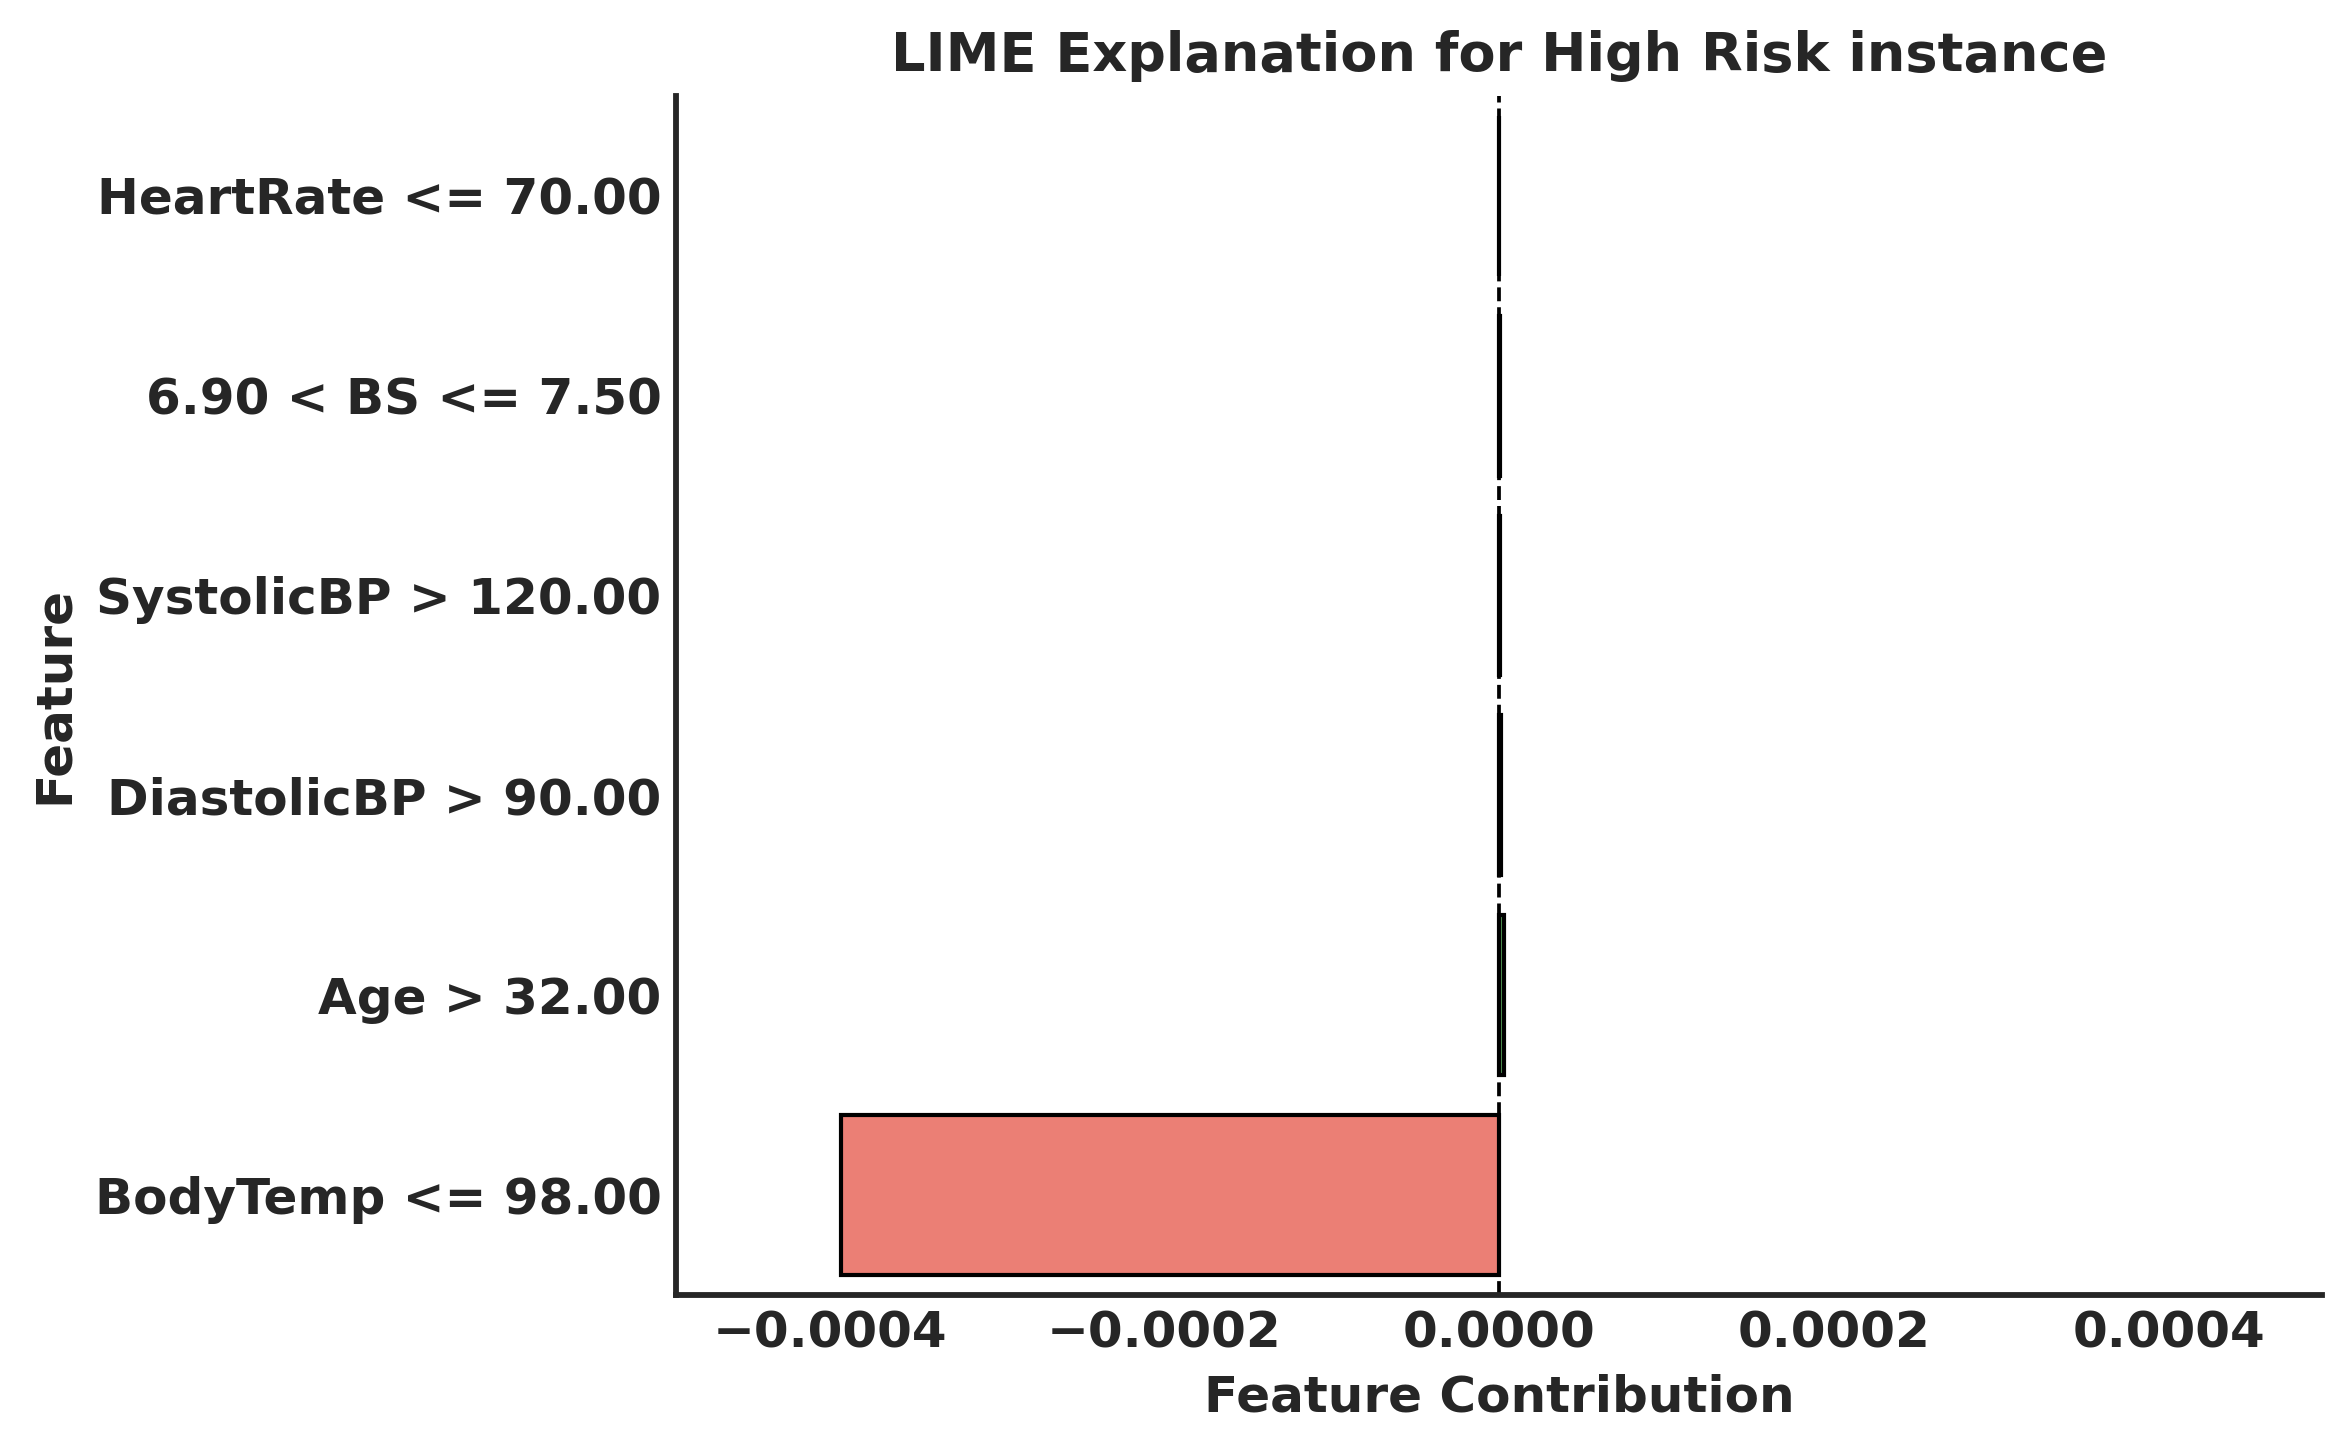

In [ ]:
sns.set_theme(style='white')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'axes.linewidth': 1.4,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'axes.spines.top': False,
    'axes.spines.right': False
})

feature_names = X_train.columns.tolist() if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=feature_names)
y_test = np.array(y_test)

class_labels = {0: 'Low Risk', 1: 'Mid Risk', 2: 'High Risk'}

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=feature_names,
    class_names=list(class_labels.values()),
    discretize_continuous=True
)

selected_indices = [np.where(y_test == cls)[0][0] for cls in np.unique(y_test)]

for instance_index in selected_indices:
    instance = X_test.iloc[instance_index].values
    explanation = explainer.explain_instance(
        data_row=instance,
        predict_fn=stacked_model.predict_proba,
        num_features=len(feature_names)
    )

    exp_list = explanation.as_list()
    features = [f[0] for f in exp_list]
    weights = [f[1] for f in exp_list]
    df_exp = pd.DataFrame({'Feature': features, 'Weight': weights}).sort_values(by='Weight', key=abs, ascending=True)

    colors = ['#FF6F61' if w < 0 else '#4CAF50' for w in df_exp['Weight']]

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(
        data=df_exp,
        x='Weight',
        y='Feature',
        palette=colors,
        edgecolor='black',
        ax=ax
    )

    max_val = max(abs(df_exp['Weight'].max()), abs(df_exp['Weight'].min()))
    margin = 0.25 * max_val
    ax.set_xlim(-max_val - margin, max_val + margin)

    ax.set_title(f'LIME Explanation for {class_labels[y_test[instance_index]]} instance',
                 fontweight='bold', fontsize=13, family='Arial')
    ax.set_xlabel('Feature Contribution', fontweight='bold', fontsize=12, family='Arial')
    ax.set_ylabel('Feature', fontweight='bold', fontsize=12, family='Arial')

    for label in ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(12)
        label.set_family('Arial')
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(12)
        label.set_family('Arial')

    ax.axvline(0, color='black', linestyle='--', linewidth=0.9)
    sns.despine()
    plt.tight_layout()
    plt.show()